# Comparison with Finite Differences Method

Import Packages

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import style
style.use('ggplot')
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from scipy.interpolate import interp1d
from mpl_toolkits.mplot3d import axes3d, Axes3D
from Functions import*
from FiniteDifferences import*

Execute if it should be run on a GPU

In [2]:
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

We set the parameters of the PDE

In [2]:
T = 30 / 365 # Maturity
n = 30 # Trading Dates
a_0 = [0.3,0.7]
a_1 = [0.4,0.6]
b_0 = [-0.2,0.2]
b_1 = [-0.1,0.1]
gamma = [0.5,1.5]
x_0 = 10.

# Call Option

Compute  Hedging Prices

Note that for computing just prices less iterations are needed than for computing optimal hedges.

In [4]:
hedges_call = []

# Define the payoff function
def derivative(path):
     return tf.nn.relu(path[-1]-10.)

# Compute the prices 
for x_0 in np.linspace(5.,15.,20):
    x_0 = x_0.item() # Conversion to python-native float
    p, _ = optimal_hedge(derivative,a_0,a_1,b_0,b_1,gamma,x_0,T,n,
                             depth = 4,nr_neurons = 256,EPOCHS = 500,l_r = 0.005,BATCH_SIZE =256,hedge = "hedge")
    hedges_call.append(p)

  0%|          | 0/500 [00:00<?, ?it/s]


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



  2%|▏         | 11/500 [00:04<03:24,  2.40it/s]

Iteration:10, Price of Hedge: 0.005108747631311417, Loss: 0.002554022241383791


  4%|▍         | 21/500 [00:08<03:03,  2.61it/s]

Iteration:20, Price of Hedge: 0.002593452576547861, Loss: 0.0017736901063472033


  6%|▌         | 31/500 [00:12<03:06,  2.51it/s]

Iteration:30, Price of Hedge: -0.0013994199689477682, Loss: 0.000390444794902578


  8%|▊         | 41/500 [00:16<03:04,  2.48it/s]

Iteration:40, Price of Hedge: -0.001093821949325502, Loss: 9.140328620560467e-05


 10%|█         | 51/500 [00:20<02:58,  2.52it/s]

Iteration:50, Price of Hedge: 0.0008202723111025989, Loss: 3.212059891666286e-05


 12%|█▏        | 61/500 [00:24<02:55,  2.51it/s]

Iteration:60, Price of Hedge: 0.0003347301681060344, Loss: 3.0956709906604374e-06


 14%|█▍        | 71/500 [00:28<02:47,  2.56it/s]

Iteration:70, Price of Hedge: -0.0004607407609000802, Loss: 2.0899124137940817e-06


 16%|█▌        | 81/500 [00:32<02:42,  2.59it/s]

Iteration:80, Price of Hedge: -5.7324614317622036e-06, Loss: 9.136035714618629e-07


 18%|█▊        | 91/500 [00:36<02:40,  2.56it/s]

Iteration:90, Price of Hedge: 0.00016095190949272364, Loss: 6.33886770629033e-07


 20%|██        | 101/500 [00:40<02:53,  2.30it/s]

Iteration:100, Price of Hedge: -7.91288330219686e-05, Loss: 8.675790468259947e-07


 22%|██▏       | 111/500 [00:45<02:54,  2.23it/s]

Iteration:110, Price of Hedge: 1.2730432899843436e-05, Loss: 4.143475678120012e-07


 24%|██▍       | 121/500 [00:49<02:40,  2.36it/s]

Iteration:120, Price of Hedge: -2.012741424550768e-05, Loss: 5.16057298227679e-05


 26%|██▌       | 131/500 [00:53<02:44,  2.24it/s]

Iteration:130, Price of Hedge: -6.211249274201691e-05, Loss: 2.5538133741065394e-07


 28%|██▊       | 141/500 [00:58<02:50,  2.10it/s]

Iteration:140, Price of Hedge: 2.9642937079188414e-05, Loss: 7.301839104911778e-06


 30%|███       | 151/500 [01:02<02:35,  2.24it/s]

Iteration:150, Price of Hedge: 0.0002240418834844604, Loss: 1.645119300519582e-05


 32%|███▏      | 161/500 [01:06<02:15,  2.50it/s]

Iteration:160, Price of Hedge: 0.001950033474713564, Loss: 0.00018290631123818457


 34%|███▍      | 171/500 [01:10<02:20,  2.34it/s]

Iteration:170, Price of Hedge: -0.0022048032842576504, Loss: 8.358966624655295e-06


 36%|███▌      | 181/500 [01:15<02:08,  2.48it/s]

Iteration:180, Price of Hedge: 0.0005810046568512917, Loss: 3.345643199281767e-05


 38%|███▊      | 191/500 [01:19<02:10,  2.36it/s]

Iteration:190, Price of Hedge: 0.00021309930889401585, Loss: 1.1931081644434016e-05


 40%|████      | 201/500 [01:23<02:00,  2.49it/s]

Iteration:200, Price of Hedge: -0.0003055296838283539, Loss: 4.732548404717818e-06


 42%|████▏     | 211/500 [01:27<02:04,  2.32it/s]

Iteration:210, Price of Hedge: 0.000851035350933671, Loss: 1.9432654880802147e-05


 44%|████▍     | 221/500 [01:32<02:06,  2.21it/s]

Iteration:220, Price of Hedge: -0.0002666591899469495, Loss: 4.900290605291957e-06


 46%|████▌     | 231/500 [01:36<01:47,  2.49it/s]

Iteration:230, Price of Hedge: -2.407783904345706e-05, Loss: 4.388562956592068e-06


 48%|████▊     | 241/500 [01:40<01:46,  2.43it/s]

Iteration:240, Price of Hedge: 9.002411388792098e-05, Loss: 1.802476674583886e-07


 50%|█████     | 251/500 [01:44<01:45,  2.36it/s]

Iteration:250, Price of Hedge: -4.4759643060388044e-05, Loss: 5.048817115493875e-07


 52%|█████▏    | 261/500 [01:49<01:41,  2.35it/s]

Iteration:260, Price of Hedge: 0.001631530816666782, Loss: 0.0002853611658792943


 54%|█████▍    | 271/500 [01:53<01:31,  2.51it/s]

Iteration:270, Price of Hedge: -0.0004437900788616389, Loss: 1.806137152016163e-05


 56%|█████▌    | 281/500 [01:57<01:27,  2.51it/s]

Iteration:280, Price of Hedge: -4.37816051999107e-05, Loss: 6.50663082524261e-07


 58%|█████▊    | 291/500 [02:01<01:22,  2.54it/s]

Iteration:290, Price of Hedge: 0.0012101148022338748, Loss: 0.00038698490243405104


 60%|██████    | 301/500 [02:05<01:18,  2.52it/s]

Iteration:300, Price of Hedge: -0.000408610183512792, Loss: 5.095039523439482e-05


 62%|██████▏   | 311/500 [02:09<01:22,  2.30it/s]

Iteration:310, Price of Hedge: 0.0003835462557617575, Loss: 5.909824722039048e-06


 64%|██████▍   | 321/500 [02:13<01:16,  2.33it/s]

Iteration:320, Price of Hedge: -0.00013528366980608553, Loss: 5.208694346947595e-07


 66%|██████▌   | 331/500 [02:17<01:07,  2.50it/s]

Iteration:330, Price of Hedge: 0.0015276619233191013, Loss: 0.00015290651936084032


 68%|██████▊   | 341/500 [02:21<01:07,  2.34it/s]

Iteration:340, Price of Hedge: -0.0006956857978366315, Loss: 3.266983912908472e-05


 70%|███████   | 351/500 [02:25<01:00,  2.48it/s]

Iteration:350, Price of Hedge: 0.0002078834077110514, Loss: 1.364786612612079e-06


 72%|███████▏  | 361/500 [02:29<00:57,  2.42it/s]

Iteration:360, Price of Hedge: -9.339720418211073e-05, Loss: 2.7518440219864715e-06


 74%|███████▍  | 371/500 [02:33<00:52,  2.45it/s]

Iteration:370, Price of Hedge: -1.7303740605711937e-05, Loss: 2.507191538825282e-06


 76%|███████▌  | 381/500 [02:38<00:49,  2.42it/s]

Iteration:380, Price of Hedge: 5.514497752301395e-05, Loss: 6.639303933297924e-07


 78%|███████▊  | 391/500 [02:42<00:51,  2.12it/s]

Iteration:390, Price of Hedge: -8.205465564969927e-05, Loss: 3.544534195043525e-07


 80%|████████  | 401/500 [02:47<00:43,  2.30it/s]

Iteration:400, Price of Hedge: 6.03805310674943e-05, Loss: 3.6504280842564185e-07


 82%|████████▏ | 411/500 [02:51<00:39,  2.28it/s]

Iteration:410, Price of Hedge: -2.0980729459552094e-05, Loss: 1.5838404010537488e-07


 84%|████████▍ | 421/500 [02:55<00:33,  2.39it/s]

Iteration:420, Price of Hedge: 4.350532981334254e-05, Loss: 1.7567846555266442e-07


 86%|████████▌ | 431/500 [03:00<00:29,  2.32it/s]

Iteration:430, Price of Hedge: -7.172116966103204e-06, Loss: 1.8529225087604573e-07


 88%|████████▊ | 441/500 [03:05<00:27,  2.12it/s]

Iteration:440, Price of Hedge: 3.723979534697719e-05, Loss: 1.8768716358863458e-07


 90%|█████████ | 451/500 [03:09<00:19,  2.51it/s]

Iteration:450, Price of Hedge: 0.00015703537792433053, Loss: 5.337858510756632e-07


 92%|█████████▏| 461/500 [03:13<00:15,  2.49it/s]

Iteration:460, Price of Hedge: -9.41338439588435e-05, Loss: 1.0685504321372719e-06


 94%|█████████▍| 471/500 [03:17<00:13,  2.22it/s]

Iteration:470, Price of Hedge: 0.00011654231639113277, Loss: 6.916170036674885e-07


 96%|█████████▌| 481/500 [03:21<00:07,  2.46it/s]

Iteration:480, Price of Hedge: -6.197566108312458e-05, Loss: 5.635062620967801e-07


 98%|█████████▊| 491/500 [03:26<00:04,  2.22it/s]

Iteration:490, Price of Hedge: 5.499717372003943e-05, Loss: 4.594795086632075e-07


  0%|          | 0/500 [00:00<?, ?it/s]


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



  2%|▏         | 11/500 [00:04<03:28,  2.34it/s]

Iteration:10, Price of Hedge: -0.006672353483736515, Loss: 0.0036209800746291876


  4%|▍         | 21/500 [00:08<03:12,  2.48it/s]

Iteration:20, Price of Hedge: 0.006251487415283918, Loss: 0.0007027479587122798


  6%|▌         | 31/500 [00:12<03:17,  2.38it/s]

Iteration:30, Price of Hedge: -0.0016295397654175758, Loss: 4.269061901140958e-05


  8%|▊         | 41/500 [00:17<03:13,  2.38it/s]

Iteration:40, Price of Hedge: 0.0007846414810046554, Loss: 4.823477502213791e-05


 10%|█         | 51/500 [00:21<03:03,  2.45it/s]

Iteration:50, Price of Hedge: 0.0018043064046651125, Loss: 0.0006202827207744122


 12%|█▏        | 61/500 [00:25<02:55,  2.50it/s]

Iteration:60, Price of Hedge: -0.0006042862078174949, Loss: 4.262859147274867e-05


 14%|█▍        | 71/500 [00:29<02:51,  2.50it/s]

Iteration:70, Price of Hedge: 2.3320899344980717e-05, Loss: 3.072525578318164e-05


 16%|█▌        | 81/500 [00:33<02:48,  2.49it/s]

Iteration:80, Price of Hedge: 0.00041230558417737484, Loss: 2.236994987470098e-05


 18%|█▊        | 91/500 [00:37<02:58,  2.29it/s]

Iteration:90, Price of Hedge: 0.002199276117607951, Loss: 0.0009861914440989494


 20%|██        | 101/500 [00:41<02:48,  2.36it/s]

Iteration:100, Price of Hedge: -0.001196569763123989, Loss: 5.12741353304591e-05


 22%|██▏       | 111/500 [00:45<02:44,  2.37it/s]

Iteration:110, Price of Hedge: 0.0006468262290582061, Loss: 2.5152443413389847e-05


 24%|██▍       | 121/500 [00:50<02:53,  2.19it/s]

Iteration:120, Price of Hedge: -0.0003921203897334635, Loss: 2.8408185244188644e-05


 26%|██▌       | 131/500 [00:54<02:39,  2.32it/s]

Iteration:130, Price of Hedge: 0.00046846451004967093, Loss: 1.690612407401204e-05


 28%|██▊       | 141/500 [00:59<03:26,  1.74it/s]

Iteration:140, Price of Hedge: 0.0007164416601881385, Loss: 6.190388376126066e-05


 30%|███       | 151/500 [01:03<02:24,  2.41it/s]

Iteration:150, Price of Hedge: 0.0008599687716923654, Loss: 0.0010996094206348062


 32%|███▏      | 161/500 [01:07<02:21,  2.40it/s]

Iteration:160, Price of Hedge: 0.006242125760763884, Loss: 0.00011266976071055979


 34%|███▍      | 171/500 [01:12<02:19,  2.36it/s]

Iteration:170, Price of Hedge: -0.004279796499758959, Loss: 0.00015079726290423423


 36%|███▌      | 181/500 [01:16<02:10,  2.45it/s]

Iteration:180, Price of Hedge: 0.003021919634193182, Loss: 0.0004203409771434963


 38%|███▊      | 191/500 [01:20<02:05,  2.46it/s]

Iteration:190, Price of Hedge: -0.001721963519230485, Loss: 1.987920404644683e-05


 40%|████      | 201/500 [01:24<02:24,  2.07it/s]

Iteration:200, Price of Hedge: 0.0007713051745668054, Loss: 1.164635887107579e-05


 42%|████▏     | 211/500 [01:30<02:36,  1.85it/s]

Iteration:210, Price of Hedge: 0.0007221859414130449, Loss: 1.0196244147664402e-05


 44%|████▍     | 221/500 [01:35<02:16,  2.05it/s]

Iteration:220, Price of Hedge: -0.00033942420850507915, Loss: 6.384094376699068e-06


 46%|████▌     | 231/500 [01:39<01:58,  2.28it/s]

Iteration:230, Price of Hedge: 0.0002832933096215129, Loss: 5.427159521786962e-06


 48%|████▊     | 241/500 [01:44<01:47,  2.40it/s]

Iteration:240, Price of Hedge: -0.00023097630764823407, Loss: 2.9950429052405525e-06


 50%|█████     | 251/500 [01:48<01:46,  2.33it/s]

Iteration:250, Price of Hedge: 0.0012470267247408628, Loss: 4.9728383601177484e-05


 52%|█████▏    | 261/500 [01:52<01:37,  2.44it/s]

Iteration:260, Price of Hedge: 0.001159387524239719, Loss: 0.0006458422285504639


 54%|█████▍    | 271/500 [01:57<02:09,  1.77it/s]

Iteration:270, Price of Hedge: 0.000531317200511694, Loss: 0.00039032159838825464


 56%|█████▌    | 281/500 [02:01<01:35,  2.30it/s]

Iteration:280, Price of Hedge: 0.0014931841287761927, Loss: 5.098033579997718e-05


 58%|█████▊    | 291/500 [02:05<01:26,  2.42it/s]

Iteration:290, Price of Hedge: -0.0016712353099137545, Loss: 7.241190905915573e-05


 60%|██████    | 301/500 [02:09<01:19,  2.51it/s]

Iteration:300, Price of Hedge: 0.0012362950947135687, Loss: 6.702783139189705e-06


 62%|██████▏   | 311/500 [02:13<01:15,  2.49it/s]

Iteration:310, Price of Hedge: -0.00040297064697369933, Loss: 0.0003236904158256948


 64%|██████▍   | 321/500 [02:17<01:13,  2.44it/s]

Iteration:320, Price of Hedge: 0.0016503443475812674, Loss: 0.00018833231297321618


 66%|██████▌   | 331/500 [02:21<01:06,  2.53it/s]

Iteration:330, Price of Hedge: -0.00020061108807567507, Loss: 2.7259431590209715e-05


 68%|██████▊   | 341/500 [02:25<01:02,  2.53it/s]

Iteration:340, Price of Hedge: 0.0009815397206693888, Loss: 0.00370954186655581


 70%|███████   | 351/500 [02:29<01:00,  2.46it/s]

Iteration:350, Price of Hedge: -0.0007935945759527385, Loss: 0.00035895759356208146


 72%|███████▏  | 361/500 [02:33<00:55,  2.51it/s]

Iteration:360, Price of Hedge: 0.0011116743553429842, Loss: 7.266609463840723e-05


 74%|███████▍  | 371/500 [02:38<01:00,  2.14it/s]

Iteration:370, Price of Hedge: 0.0006212517619132996, Loss: 3.217362973373383e-05


 76%|███████▌  | 381/500 [02:42<00:47,  2.52it/s]

Iteration:380, Price of Hedge: -0.0004404516948852688, Loss: 2.2867994630360045e-05


 78%|███████▊  | 391/500 [02:46<00:44,  2.46it/s]

Iteration:390, Price of Hedge: 0.0008266207296401262, Loss: 1.2506121493061073e-05


 80%|████████  | 401/500 [02:50<00:40,  2.46it/s]

Iteration:400, Price of Hedge: 0.002000069245696068, Loss: 0.00012079575390089303


 82%|████████▏ | 411/500 [02:54<00:36,  2.46it/s]

Iteration:410, Price of Hedge: 0.0003122281632386148, Loss: 0.0013175960630178452


 84%|████████▍ | 421/500 [02:58<00:33,  2.36it/s]

Iteration:420, Price of Hedge: -0.0013227286981418729, Loss: 0.0005928113823756576


 86%|████████▌ | 431/500 [03:02<00:27,  2.52it/s]

Iteration:430, Price of Hedge: 0.0036660493351519108, Loss: 0.00013492106518242508


 88%|████████▊ | 441/500 [03:06<00:23,  2.46it/s]

Iteration:440, Price of Hedge: -0.0009396740351803601, Loss: 2.390222107351292e-05


 90%|█████████ | 451/500 [03:10<00:19,  2.53it/s]

Iteration:450, Price of Hedge: 0.001105388393625617, Loss: 8.539483678760007e-05


 92%|█████████▏| 461/500 [03:14<00:15,  2.52it/s]

Iteration:460, Price of Hedge: 0.00025806381017901003, Loss: 1.260889712284552e-05


 94%|█████████▍| 471/500 [03:18<00:12,  2.35it/s]

Iteration:470, Price of Hedge: 0.0007704542367719114, Loss: 3.7034526030765846e-05


 96%|█████████▌| 481/500 [03:23<00:09,  2.09it/s]

Iteration:480, Price of Hedge: 0.0015840077539905906, Loss: 6.296930951066315e-05


 98%|█████████▊| 491/500 [03:28<00:04,  1.95it/s]

Iteration:490, Price of Hedge: 0.0006536816945299506, Loss: 3.2969513995340094e-05


  0%|          | 0/500 [00:00<?, ?it/s]


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



  2%|▏         | 11/500 [00:04<03:14,  2.51it/s]

Iteration:10, Price of Hedge: -0.006301507353782654, Loss: 0.016774464398622513


  4%|▍         | 21/500 [00:09<04:22,  1.82it/s]

Iteration:20, Price of Hedge: -0.003951485268771648, Loss: 0.001539129065349698


  6%|▌         | 31/500 [00:14<03:42,  2.11it/s]

Iteration:30, Price of Hedge: 0.0033026556484401226, Loss: 0.0008054709178395569


  8%|▊         | 41/500 [00:18<03:05,  2.47it/s]

Iteration:40, Price of Hedge: 0.0046026152558624744, Loss: 0.00016162668180186301


 10%|█         | 51/500 [00:23<03:20,  2.24it/s]

Iteration:50, Price of Hedge: 0.0012192833237349987, Loss: 0.0005334482411853969


 12%|█▏        | 61/500 [00:27<03:13,  2.27it/s]

Iteration:60, Price of Hedge: 0.0014359030174091458, Loss: 0.0016190686728805304


 14%|█▍        | 71/500 [00:31<03:05,  2.32it/s]

Iteration:70, Price of Hedge: 0.0022264732979238033, Loss: 0.0001470901188440621


 16%|█▌        | 81/500 [00:35<02:57,  2.36it/s]

Iteration:80, Price of Hedge: 0.004293120466172695, Loss: 0.002761030336841941


 18%|█▊        | 91/500 [00:40<02:51,  2.38it/s]

Iteration:90, Price of Hedge: 0.004017754923552275, Loss: 0.00012523772602435201


 20%|██        | 101/500 [00:44<02:41,  2.47it/s]

Iteration:100, Price of Hedge: 0.000787117169238627, Loss: 0.0005990464705973864


 22%|██▏       | 111/500 [00:48<02:34,  2.52it/s]

Iteration:110, Price of Hedge: -0.00020236252748873085, Loss: 5.6181794207077473e-05


 24%|██▍       | 121/500 [00:52<02:28,  2.55it/s]

Iteration:120, Price of Hedge: 0.0007473921868950129, Loss: 4.9825390306068584e-05


 26%|██▌       | 131/500 [00:56<02:25,  2.54it/s]

Iteration:130, Price of Hedge: 0.0016483425861224532, Loss: 0.00036551273660734296


 28%|██▊       | 141/500 [01:00<02:21,  2.53it/s]

Iteration:140, Price of Hedge: 0.002218160778284073, Loss: 0.0003040484443772584


 30%|███       | 151/500 [01:04<02:18,  2.52it/s]

Iteration:150, Price of Hedge: 0.0026855962350964546, Loss: 9.479792061029002e-05


 32%|███▏      | 161/500 [01:08<02:13,  2.54it/s]

Iteration:160, Price of Hedge: -0.00046120848855935037, Loss: 0.00012005108874291182


 34%|███▍      | 171/500 [01:12<02:08,  2.56it/s]

Iteration:170, Price of Hedge: 0.002308078110218048, Loss: 0.00010296252730768174


 36%|███▌      | 181/500 [01:16<02:06,  2.53it/s]

Iteration:180, Price of Hedge: 0.002128130290657282, Loss: 9.256355406250805e-05


 38%|███▊      | 191/500 [01:20<02:01,  2.54it/s]

Iteration:190, Price of Hedge: 0.001445936388336122, Loss: 0.004447453655302525


 40%|████      | 201/500 [01:24<01:58,  2.53it/s]

Iteration:200, Price of Hedge: 0.0030320666264742613, Loss: 0.0008995370590128005


 42%|████▏     | 211/500 [01:28<01:53,  2.54it/s]

Iteration:210, Price of Hedge: 0.00013376533752307296, Loss: 9.510115341981873e-05


 44%|████▍     | 221/500 [01:32<01:48,  2.56it/s]

Iteration:220, Price of Hedge: 0.002108875662088394, Loss: 0.008134816773235798


 46%|████▌     | 231/500 [01:36<01:46,  2.53it/s]

Iteration:230, Price of Hedge: 0.007521509658545256, Loss: 0.0004866060335189104


 48%|████▊     | 241/500 [01:40<01:44,  2.48it/s]

Iteration:240, Price of Hedge: -0.0005696429871022701, Loss: 0.0006526940851472318


 50%|█████     | 251/500 [01:44<01:36,  2.57it/s]

Iteration:250, Price of Hedge: 0.002120337914675474, Loss: 0.00013650716573465616


 52%|█████▏    | 261/500 [01:47<01:32,  2.58it/s]

Iteration:260, Price of Hedge: 0.0010481866775080562, Loss: 3.214320167899132e-05


 54%|█████▍    | 271/500 [01:51<01:27,  2.61it/s]

Iteration:270, Price of Hedge: 0.0030018468387424946, Loss: 0.0029355338774621487


 56%|█████▌    | 281/500 [01:55<01:24,  2.59it/s]

Iteration:280, Price of Hedge: 0.004758773371577263, Loss: 0.001779272686690092


 58%|█████▊    | 291/500 [01:59<01:21,  2.57it/s]

Iteration:290, Price of Hedge: 0.0034412245731800795, Loss: 0.002731699962168932


 60%|██████    | 301/500 [02:03<01:16,  2.59it/s]

Iteration:300, Price of Hedge: 0.0019666003063321114, Loss: 0.0005437954096123576


 62%|██████▏   | 311/500 [02:07<01:15,  2.52it/s]

Iteration:310, Price of Hedge: 0.004332421347498894, Loss: 0.008879484608769417


 64%|██████▍   | 321/500 [02:11<01:09,  2.56it/s]

Iteration:320, Price of Hedge: 0.003356101457029581, Loss: 0.003414262318983674


 66%|██████▌   | 331/500 [02:15<01:05,  2.59it/s]

Iteration:330, Price of Hedge: -0.00023359341139439493, Loss: 0.0002468187885824591


 68%|██████▊   | 341/500 [02:18<01:02,  2.55it/s]

Iteration:340, Price of Hedge: 0.0031215064227581024, Loss: 0.003597135888412595


 70%|███████   | 351/500 [02:22<00:57,  2.59it/s]

Iteration:350, Price of Hedge: 0.0009199940832331777, Loss: 7.362466567428783e-05


 72%|███████▏  | 361/500 [02:26<00:56,  2.46it/s]

Iteration:360, Price of Hedge: 0.003379279747605324, Loss: 0.002804281422868371


 74%|███████▍  | 371/500 [02:30<00:50,  2.58it/s]

Iteration:370, Price of Hedge: 0.00026117335073649883, Loss: 0.0007791593088768423


 76%|███████▌  | 381/500 [02:34<00:46,  2.59it/s]

Iteration:380, Price of Hedge: -0.0003065536729991436, Loss: 0.008302025496959686


 78%|███████▊  | 391/500 [02:38<00:42,  2.59it/s]

Iteration:390, Price of Hedge: 0.0033207230735570192, Loss: 0.0024215641897171736


 80%|████████  | 401/500 [02:42<00:38,  2.58it/s]

Iteration:400, Price of Hedge: 0.00037847855128347874, Loss: 6.69039145577699e-05


 82%|████████▏ | 411/500 [02:46<00:34,  2.60it/s]

Iteration:410, Price of Hedge: 0.0024838873650878668, Loss: 0.0010258551919832826


 84%|████████▍ | 421/500 [02:50<00:30,  2.61it/s]

Iteration:420, Price of Hedge: 0.0001944207469932735, Loss: 1.2285992852412164e-05


 86%|████████▌ | 431/500 [02:54<00:26,  2.58it/s]

Iteration:430, Price of Hedge: 0.005248036235570908, Loss: 0.0006500309100374579


 88%|████████▊ | 441/500 [02:57<00:22,  2.61it/s]

Iteration:440, Price of Hedge: 0.0012168862158432603, Loss: 2.7049019990954548e-05


 90%|█████████ | 451/500 [03:01<00:18,  2.60it/s]

Iteration:450, Price of Hedge: 0.0018867922481149435, Loss: 0.0012788918102160096


 92%|█████████▏| 461/500 [03:05<00:15,  2.58it/s]

Iteration:460, Price of Hedge: 0.00024165076320059597, Loss: 0.0012058254797011614


 94%|█████████▍| 471/500 [03:09<00:11,  2.57it/s]

Iteration:470, Price of Hedge: 0.0013854510616511106, Loss: 0.0049202293157577515


 96%|█████████▌| 481/500 [03:13<00:07,  2.61it/s]

Iteration:480, Price of Hedge: 0.003746112110093236, Loss: 0.04048515483736992


 98%|█████████▊| 491/500 [03:17<00:03,  2.59it/s]

Iteration:490, Price of Hedge: 0.0020158851984888315, Loss: 0.0003076341236010194


  0%|          | 0/500 [00:00<?, ?it/s]


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



  2%|▏         | 11/500 [00:04<03:09,  2.59it/s]

Iteration:10, Price of Hedge: 0.0009998796740546823, Loss: 0.01071834098547697


  4%|▍         | 21/500 [00:08<03:03,  2.62it/s]

Iteration:20, Price of Hedge: 0.005633178632706404, Loss: 0.001376871601678431


  6%|▌         | 31/500 [00:11<03:00,  2.60it/s]

Iteration:30, Price of Hedge: 0.010647470131516457, Loss: 0.006530604790896177


  8%|▊         | 41/500 [00:15<02:54,  2.63it/s]

Iteration:40, Price of Hedge: 0.009803707711398602, Loss: 0.02175232209265232


 10%|█         | 51/500 [00:19<02:54,  2.58it/s]

Iteration:50, Price of Hedge: 0.010626089759171009, Loss: 0.02578376606106758


 12%|█▏        | 61/500 [00:23<02:50,  2.58it/s]

Iteration:60, Price of Hedge: 0.00956478901207447, Loss: 0.0036314455792307854


 14%|█▍        | 71/500 [00:27<02:45,  2.59it/s]

Iteration:70, Price of Hedge: 0.00907719973474741, Loss: 0.0009573977440595627


 16%|█▌        | 81/500 [00:31<02:39,  2.63it/s]

Iteration:80, Price of Hedge: 0.008337617851793766, Loss: 0.0013704737648367882


 18%|█▊        | 91/500 [00:34<02:35,  2.63it/s]

Iteration:90, Price of Hedge: 0.011685720644891262, Loss: 0.0015693791210651398


 20%|██        | 101/500 [00:38<02:32,  2.61it/s]

Iteration:100, Price of Hedge: 0.009459606371819973, Loss: 0.026784496381878853


 22%|██▏       | 111/500 [00:42<02:30,  2.59it/s]

Iteration:110, Price of Hedge: 0.00952856708317995, Loss: 0.001957257743924856


 24%|██▍       | 121/500 [00:46<02:22,  2.66it/s]

Iteration:120, Price of Hedge: 0.0036347038112580776, Loss: 0.003030947409570217


 26%|██▌       | 131/500 [00:50<02:25,  2.53it/s]

Iteration:130, Price of Hedge: 0.010364537127315998, Loss: 0.00433566328138113


 28%|██▊       | 141/500 [00:54<02:19,  2.57it/s]

Iteration:140, Price of Hedge: 0.01453410368412733, Loss: 0.003872869536280632


 30%|███       | 151/500 [00:58<02:15,  2.57it/s]

Iteration:150, Price of Hedge: 0.008913383819162846, Loss: 0.012642797082662582


 32%|███▏      | 161/500 [01:02<02:12,  2.56it/s]

Iteration:160, Price of Hedge: 0.005092059262096882, Loss: 0.001999939326196909


 34%|███▍      | 171/500 [01:06<02:09,  2.54it/s]

Iteration:170, Price of Hedge: 0.010327717289328575, Loss: 0.015087638050317764


 36%|███▌      | 181/500 [01:09<02:03,  2.59it/s]

Iteration:180, Price of Hedge: 0.008717803284525871, Loss: 0.0022827135398983955


 38%|███▊      | 191/500 [01:13<02:00,  2.57it/s]

Iteration:190, Price of Hedge: 0.008932005614042282, Loss: 0.0007590404129587114


 40%|████      | 201/500 [01:17<01:53,  2.63it/s]

Iteration:200, Price of Hedge: 0.006535418331623077, Loss: 0.009652539156377316


 42%|████▏     | 211/500 [01:21<01:49,  2.63it/s]

Iteration:210, Price of Hedge: 0.002898432547226548, Loss: 0.009676973335444927


 44%|████▍     | 221/500 [01:25<01:47,  2.59it/s]

Iteration:220, Price of Hedge: 0.008780090138316154, Loss: 0.003551893401890993


 46%|████▌     | 231/500 [01:29<01:43,  2.60it/s]

Iteration:230, Price of Hedge: 0.010000692680478096, Loss: 0.010361870750784874


 48%|████▊     | 241/500 [01:33<01:39,  2.60it/s]

Iteration:240, Price of Hedge: 0.010486295446753502, Loss: 0.0074487910605967045


 50%|█████     | 251/500 [01:36<01:35,  2.60it/s]

Iteration:250, Price of Hedge: 0.00543747004121542, Loss: 0.005242115817964077


 52%|█████▏    | 261/500 [01:40<01:31,  2.63it/s]

Iteration:260, Price of Hedge: 0.005304895341396332, Loss: 0.037277933210134506


 54%|█████▍    | 271/500 [01:44<01:27,  2.61it/s]

Iteration:270, Price of Hedge: 0.012293863110244274, Loss: 0.0022753586526960135


 56%|█████▌    | 281/500 [01:48<01:25,  2.57it/s]

Iteration:280, Price of Hedge: 0.006186637096107006, Loss: 0.01863294094800949


 58%|█████▊    | 291/500 [01:52<01:20,  2.58it/s]

Iteration:290, Price of Hedge: 0.009596891701221466, Loss: 0.014684065245091915


 60%|██████    | 301/500 [01:56<01:19,  2.52it/s]

Iteration:300, Price of Hedge: 0.009501362219452858, Loss: 0.029890138655900955


 62%|██████▏   | 311/500 [02:00<01:12,  2.61it/s]

Iteration:310, Price of Hedge: 0.010613848455250263, Loss: 0.015928417444229126


 64%|██████▍   | 321/500 [02:03<01:09,  2.58it/s]

Iteration:320, Price of Hedge: 0.0075134336948394775, Loss: 0.015131298452615738


 66%|██████▌   | 331/500 [02:07<01:05,  2.59it/s]

Iteration:330, Price of Hedge: 0.008091076277196407, Loss: 0.0019302187720313668


 68%|██████▊   | 341/500 [02:11<01:01,  2.60it/s]

Iteration:340, Price of Hedge: 0.009115433320403099, Loss: 0.0074150399304926395


 70%|███████   | 351/500 [02:15<00:57,  2.60it/s]

Iteration:350, Price of Hedge: 0.008804910816252232, Loss: 0.020199649035930634


 72%|███████▏  | 361/500 [02:19<00:53,  2.61it/s]

Iteration:360, Price of Hedge: 0.008762798272073269, Loss: 0.004603128414601088


 74%|███████▍  | 371/500 [02:23<00:49,  2.59it/s]

Iteration:370, Price of Hedge: 0.008172103203833103, Loss: 0.004838834051042795


 76%|███████▌  | 381/500 [02:27<00:46,  2.54it/s]

Iteration:380, Price of Hedge: 0.008469094522297382, Loss: 0.007695915177464485


 78%|███████▊  | 391/500 [02:31<00:42,  2.57it/s]

Iteration:390, Price of Hedge: 0.009607568383216858, Loss: 0.01036344189196825


 80%|████████  | 401/500 [02:35<00:38,  2.58it/s]

Iteration:400, Price of Hedge: 0.009066514670848846, Loss: 0.03361033275723457


 82%|████████▏ | 411/500 [02:39<00:34,  2.60it/s]

Iteration:410, Price of Hedge: 0.011796205304563046, Loss: 0.0037540809717029333


 84%|████████▍ | 421/500 [02:43<00:30,  2.58it/s]

Iteration:420, Price of Hedge: 0.005895416717976332, Loss: 0.0038060895167291164


 86%|████████▌ | 431/500 [02:46<00:26,  2.59it/s]

Iteration:430, Price of Hedge: 0.013317286968231201, Loss: 0.009159217588603497


 88%|████████▊ | 441/500 [02:50<00:23,  2.56it/s]

Iteration:440, Price of Hedge: 0.006001865956932306, Loss: 0.013450239785015583


 90%|█████████ | 451/500 [02:54<00:19,  2.55it/s]

Iteration:450, Price of Hedge: 0.010994822718203068, Loss: 0.007385061588138342


 92%|█████████▏| 461/500 [02:58<00:15,  2.56it/s]

Iteration:460, Price of Hedge: 0.008609849959611893, Loss: 0.0219658762216568


 94%|█████████▍| 471/500 [03:02<00:11,  2.58it/s]

Iteration:470, Price of Hedge: 0.0076925018802285194, Loss: 0.0070141274482011795


 96%|█████████▌| 481/500 [03:06<00:07,  2.42it/s]

Iteration:480, Price of Hedge: 0.006707802414894104, Loss: 0.0008884408744052052


 98%|█████████▊| 491/500 [03:10<00:03,  2.52it/s]

Iteration:490, Price of Hedge: 0.008989334106445312, Loss: 0.0023666792549192905


  0%|          | 0/500 [00:00<?, ?it/s]


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



  2%|▏         | 11/500 [00:04<03:12,  2.55it/s]

Iteration:10, Price of Hedge: 0.012053271755576134, Loss: 0.03909355029463768


  4%|▍         | 21/500 [00:08<03:10,  2.51it/s]

Iteration:20, Price of Hedge: 0.025490662083029747, Loss: 0.03658977150917053


  6%|▌         | 31/500 [00:12<03:00,  2.60it/s]

Iteration:30, Price of Hedge: 0.03728068247437477, Loss: 0.01083635538816452


  8%|▊         | 41/500 [00:16<02:57,  2.59it/s]

Iteration:40, Price of Hedge: 0.02902054414153099, Loss: 0.005633958149701357


 10%|█         | 51/500 [00:19<02:51,  2.62it/s]

Iteration:50, Price of Hedge: 0.024353506043553352, Loss: 0.022670427337288857


 12%|█▏        | 61/500 [00:23<02:50,  2.58it/s]

Iteration:60, Price of Hedge: 0.025749968364834785, Loss: 0.011019381694495678


 14%|█▍        | 71/500 [00:27<02:44,  2.61it/s]

Iteration:70, Price of Hedge: 0.02196016162633896, Loss: 0.02652471326291561


 16%|█▌        | 81/500 [00:31<02:39,  2.62it/s]

Iteration:80, Price of Hedge: 0.02477787621319294, Loss: 0.016152145341038704


 18%|█▊        | 91/500 [00:35<02:36,  2.61it/s]

Iteration:90, Price of Hedge: 0.025034988299012184, Loss: 0.021244913339614868


 20%|██        | 101/500 [00:39<02:33,  2.60it/s]

Iteration:100, Price of Hedge: 0.021998852491378784, Loss: 0.026760004460811615


 22%|██▏       | 111/500 [00:42<02:29,  2.61it/s]

Iteration:110, Price of Hedge: 0.025140689685940742, Loss: 0.04292112588882446


 24%|██▍       | 121/500 [00:46<02:25,  2.60it/s]

Iteration:120, Price of Hedge: 0.033351119607686996, Loss: 0.01268848218023777


 26%|██▌       | 131/500 [00:50<02:22,  2.60it/s]

Iteration:130, Price of Hedge: 0.022033698856830597, Loss: 0.032155442982912064


 28%|██▊       | 141/500 [00:54<02:15,  2.64it/s]

Iteration:140, Price of Hedge: 0.02552643232047558, Loss: 0.023753060027956963


 30%|███       | 151/500 [00:58<02:15,  2.58it/s]

Iteration:150, Price of Hedge: 0.031582314521074295, Loss: 0.05143394321203232


 32%|███▏      | 161/500 [01:02<02:10,  2.60it/s]

Iteration:160, Price of Hedge: 0.03004104644060135, Loss: 0.05494682490825653


 34%|███▍      | 171/500 [01:05<02:06,  2.60it/s]

Iteration:170, Price of Hedge: 0.029345519840717316, Loss: 0.03565310314297676


 36%|███▌      | 181/500 [01:09<02:02,  2.61it/s]

Iteration:180, Price of Hedge: 0.02562800981104374, Loss: 0.006256294436752796


 38%|███▊      | 191/500 [01:13<01:58,  2.61it/s]

Iteration:190, Price of Hedge: 0.020656675100326538, Loss: 0.006965734995901585


 40%|████      | 201/500 [01:17<01:54,  2.60it/s]

Iteration:200, Price of Hedge: 0.02394215203821659, Loss: 0.01764795556664467


 42%|████▏     | 211/500 [01:21<01:51,  2.58it/s]

Iteration:210, Price of Hedge: 0.028489865362644196, Loss: 0.0232632365077734


 44%|████▍     | 221/500 [01:25<01:48,  2.58it/s]

Iteration:220, Price of Hedge: 0.02516210824251175, Loss: 0.01928163878619671


 46%|████▌     | 231/500 [01:29<01:43,  2.60it/s]

Iteration:230, Price of Hedge: 0.026548773050308228, Loss: 0.01762046106159687


 48%|████▊     | 241/500 [01:32<01:39,  2.61it/s]

Iteration:240, Price of Hedge: 0.030288079753518105, Loss: 0.05182869732379913


 50%|█████     | 251/500 [01:36<01:36,  2.59it/s]

Iteration:250, Price of Hedge: 0.029782019555568695, Loss: 0.005762111861258745


 52%|█████▏    | 261/500 [01:40<01:30,  2.63it/s]

Iteration:260, Price of Hedge: 0.02805951051414013, Loss: 0.015036171302199364


 54%|█████▍    | 271/500 [01:44<01:29,  2.56it/s]

Iteration:270, Price of Hedge: 0.032310470938682556, Loss: 0.019576461985707283


 56%|█████▌    | 281/500 [01:48<01:23,  2.63it/s]

Iteration:280, Price of Hedge: 0.02733982354402542, Loss: 0.00981237180531025


 58%|█████▊    | 291/500 [01:52<01:28,  2.37it/s]

Iteration:290, Price of Hedge: 0.02822253666818142, Loss: 0.039632827043533325


 60%|██████    | 301/500 [01:56<01:16,  2.60it/s]

Iteration:300, Price of Hedge: 0.019007638096809387, Loss: 0.022489627823233604


 62%|██████▏   | 311/500 [02:00<01:13,  2.56it/s]

Iteration:310, Price of Hedge: 0.030262647196650505, Loss: 0.014006800018250942


 64%|██████▍   | 321/500 [02:03<01:07,  2.64it/s]

Iteration:320, Price of Hedge: 0.02359410934150219, Loss: 0.009606828913092613


 66%|██████▌   | 331/500 [02:07<01:04,  2.62it/s]

Iteration:330, Price of Hedge: 0.016965486109256744, Loss: 0.030420662835240364


 68%|██████▊   | 341/500 [02:11<01:00,  2.62it/s]

Iteration:340, Price of Hedge: 0.035600751638412476, Loss: 0.01551935262978077


 70%|███████   | 351/500 [02:15<00:57,  2.58it/s]

Iteration:350, Price of Hedge: 0.02400047518312931, Loss: 0.006412343122065067


 72%|███████▏  | 361/500 [02:19<00:53,  2.59it/s]

Iteration:360, Price of Hedge: 0.01647092029452324, Loss: 0.0068087163381278515


 74%|███████▍  | 371/500 [02:23<00:48,  2.63it/s]

Iteration:370, Price of Hedge: 0.029723338782787323, Loss: 0.025862159207463264


 76%|███████▌  | 381/500 [02:26<00:45,  2.61it/s]

Iteration:380, Price of Hedge: 0.029688911512494087, Loss: 0.020686618983745575


 78%|███████▊  | 391/500 [02:31<01:14,  1.46it/s]

Iteration:390, Price of Hedge: 0.023739226162433624, Loss: 0.025094982236623764


 80%|████████  | 401/500 [02:37<00:40,  2.46it/s]

Iteration:400, Price of Hedge: 0.02529781498014927, Loss: 0.010542548261582851


 82%|████████▏ | 411/500 [02:41<00:33,  2.64it/s]

Iteration:410, Price of Hedge: 0.026406191289424896, Loss: 0.006943393964320421


 84%|████████▍ | 421/500 [02:44<00:29,  2.64it/s]

Iteration:420, Price of Hedge: 0.028800247237086296, Loss: 0.01356825977563858


 86%|████████▌ | 431/500 [02:48<00:26,  2.60it/s]

Iteration:430, Price of Hedge: 0.027128368616104126, Loss: 0.012743390165269375


 88%|████████▊ | 441/500 [02:52<00:22,  2.61it/s]

Iteration:440, Price of Hedge: 0.020423410460352898, Loss: 0.013195022940635681


 90%|█████████ | 451/500 [02:56<00:18,  2.61it/s]

Iteration:450, Price of Hedge: 0.02929067425429821, Loss: 0.007655642926692963


 92%|█████████▏| 461/500 [03:00<00:14,  2.61it/s]

Iteration:460, Price of Hedge: 0.024467315524816513, Loss: 0.014202043414115906


 94%|█████████▍| 471/500 [03:04<00:11,  2.55it/s]

Iteration:470, Price of Hedge: 0.01982560008764267, Loss: 0.011224325746297836


 96%|█████████▌| 481/500 [03:07<00:07,  2.62it/s]

Iteration:480, Price of Hedge: 0.025575073435902596, Loss: 0.00877438671886921


 98%|█████████▊| 491/500 [03:11<00:03,  2.61it/s]

Iteration:490, Price of Hedge: 0.01944243721663952, Loss: 0.020882854238152504


  0%|          | 0/500 [00:00<?, ?it/s]


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



  2%|▏         | 11/500 [00:04<03:05,  2.63it/s]

Iteration:10, Price of Hedge: 0.06064079701900482, Loss: 0.045549727976322174


  4%|▍         | 21/500 [00:08<03:03,  2.61it/s]

Iteration:20, Price of Hedge: 0.05284087359905243, Loss: 0.0673787072300911


  6%|▌         | 31/500 [00:11<02:58,  2.63it/s]

Iteration:30, Price of Hedge: 0.06694637984037399, Loss: 0.11407020688056946


  8%|▊         | 41/500 [00:15<02:56,  2.61it/s]

Iteration:40, Price of Hedge: 0.07199034839868546, Loss: 0.043462853878736496


 10%|█         | 51/500 [00:19<02:52,  2.60it/s]

Iteration:50, Price of Hedge: 0.05766436085104942, Loss: 0.1746903657913208


 12%|█▏        | 61/500 [00:23<02:47,  2.61it/s]

Iteration:60, Price of Hedge: 0.06747887283563614, Loss: 0.12297657877206802


 14%|█▍        | 71/500 [00:27<02:44,  2.61it/s]

Iteration:70, Price of Hedge: 0.06919829547405243, Loss: 0.07117632776498795


 16%|█▌        | 81/500 [00:31<02:39,  2.62it/s]

Iteration:80, Price of Hedge: 0.06191127747297287, Loss: 0.07051436603069305


 18%|█▊        | 91/500 [00:34<02:38,  2.59it/s]

Iteration:90, Price of Hedge: 0.05177541449666023, Loss: 0.11281963437795639


 20%|██        | 101/500 [00:38<02:35,  2.57it/s]

Iteration:100, Price of Hedge: 0.06016048789024353, Loss: 0.03253363072872162


 22%|██▏       | 111/500 [00:42<02:29,  2.61it/s]

Iteration:110, Price of Hedge: 0.0657401829957962, Loss: 0.06056593731045723


 24%|██▍       | 121/500 [00:46<02:27,  2.57it/s]

Iteration:120, Price of Hedge: 0.0610232949256897, Loss: 0.04422041401267052


 26%|██▌       | 131/500 [00:50<02:20,  2.63it/s]

Iteration:130, Price of Hedge: 0.06746377050876617, Loss: 0.0709792897105217


 28%|██▊       | 141/500 [00:54<02:17,  2.62it/s]

Iteration:140, Price of Hedge: 0.06946547329425812, Loss: 0.058721065521240234


 30%|███       | 151/500 [00:58<02:14,  2.60it/s]

Iteration:150, Price of Hedge: 0.06813430786132812, Loss: 0.04633178561925888


 32%|███▏      | 161/500 [01:01<02:12,  2.57it/s]

Iteration:160, Price of Hedge: 0.06617482006549835, Loss: 0.03953752666711807


 34%|███▍      | 171/500 [01:05<02:06,  2.59it/s]

Iteration:170, Price of Hedge: 0.06625869870185852, Loss: 0.03319115936756134


 36%|███▌      | 181/500 [01:09<02:04,  2.57it/s]

Iteration:180, Price of Hedge: 0.06100631132721901, Loss: 0.01975894346833229


 38%|███▊      | 191/500 [01:13<01:59,  2.59it/s]

Iteration:190, Price of Hedge: 0.06572164595127106, Loss: 0.025054357945919037


 40%|████      | 201/500 [01:17<01:54,  2.61it/s]

Iteration:200, Price of Hedge: 0.0696050226688385, Loss: 0.02720222994685173


 42%|████▏     | 211/500 [01:21<01:50,  2.61it/s]

Iteration:210, Price of Hedge: 0.06469497829675674, Loss: 0.04406646639108658


 44%|████▍     | 221/500 [01:25<01:49,  2.56it/s]

Iteration:220, Price of Hedge: 0.06398972868919373, Loss: 0.06310522556304932


 46%|████▌     | 231/500 [01:29<01:45,  2.55it/s]

Iteration:230, Price of Hedge: 0.07019613683223724, Loss: 0.026775114238262177


 48%|████▊     | 241/500 [01:32<01:41,  2.55it/s]

Iteration:240, Price of Hedge: 0.0612124465405941, Loss: 0.014435342513024807


 50%|█████     | 251/500 [01:36<01:37,  2.55it/s]

Iteration:250, Price of Hedge: 0.06935626268386841, Loss: 0.035174477845430374


 52%|█████▏    | 261/500 [01:40<01:34,  2.54it/s]

Iteration:260, Price of Hedge: 0.07629026472568512, Loss: 0.019729772582650185


 54%|█████▍    | 271/500 [01:44<01:29,  2.55it/s]

Iteration:270, Price of Hedge: 0.055463630706071854, Loss: 0.023040730506181717


 56%|█████▌    | 281/500 [01:48<01:25,  2.56it/s]

Iteration:280, Price of Hedge: 0.06353463232517242, Loss: 0.024361303076148033


 58%|█████▊    | 291/500 [01:52<01:22,  2.55it/s]

Iteration:290, Price of Hedge: 0.06321628391742706, Loss: 0.032675277441740036


 60%|██████    | 301/500 [01:56<01:17,  2.56it/s]

Iteration:300, Price of Hedge: 0.06836780160665512, Loss: 0.042954348027706146


 62%|██████▏   | 311/500 [02:00<01:12,  2.62it/s]

Iteration:310, Price of Hedge: 0.06739228963851929, Loss: 0.02419610507786274


 64%|██████▍   | 321/500 [02:04<01:08,  2.63it/s]

Iteration:320, Price of Hedge: 0.05687566101551056, Loss: 0.020860079675912857


 66%|██████▌   | 331/500 [02:07<01:04,  2.60it/s]

Iteration:330, Price of Hedge: 0.0672374814748764, Loss: 0.020321587100625038


 68%|██████▊   | 341/500 [02:11<01:00,  2.64it/s]

Iteration:340, Price of Hedge: 0.06393201649188995, Loss: 0.01818123832345009


 70%|███████   | 351/500 [02:15<00:57,  2.60it/s]

Iteration:350, Price of Hedge: 0.06910515576601028, Loss: 0.016659434884786606


 72%|███████▏  | 361/500 [02:19<00:53,  2.62it/s]

Iteration:360, Price of Hedge: 0.06731365621089935, Loss: 0.03081793151795864


 74%|███████▍  | 371/500 [02:23<00:49,  2.58it/s]

Iteration:370, Price of Hedge: 0.061291538178920746, Loss: 0.009395750239491463


 76%|███████▌  | 381/500 [02:27<00:45,  2.60it/s]

Iteration:380, Price of Hedge: 0.06422887742519379, Loss: 0.01508247945457697


 78%|███████▊  | 391/500 [02:30<00:41,  2.63it/s]

Iteration:390, Price of Hedge: 0.06253037601709366, Loss: 0.011410842649638653


 80%|████████  | 401/500 [02:34<00:38,  2.58it/s]

Iteration:400, Price of Hedge: 0.06326104700565338, Loss: 0.016650671139359474


 82%|████████▏ | 411/500 [02:38<00:34,  2.55it/s]

Iteration:410, Price of Hedge: 0.06309919059276581, Loss: 0.018361324444413185


 84%|████████▍ | 421/500 [02:42<00:30,  2.61it/s]

Iteration:420, Price of Hedge: 0.060717448592185974, Loss: 0.020877141505479813


 86%|████████▌ | 431/500 [02:46<00:26,  2.59it/s]

Iteration:430, Price of Hedge: 0.05968133732676506, Loss: 0.011108916252851486


 88%|████████▊ | 441/500 [02:50<00:22,  2.58it/s]

Iteration:440, Price of Hedge: 0.0671181008219719, Loss: 0.01642470620572567


 90%|█████████ | 451/500 [02:54<00:18,  2.62it/s]

Iteration:450, Price of Hedge: 0.06399428844451904, Loss: 0.012023084796965122


 92%|█████████▏| 461/500 [02:58<00:15,  2.59it/s]

Iteration:460, Price of Hedge: 0.06299198418855667, Loss: 0.030641766265034676


 94%|█████████▍| 471/500 [03:01<00:11,  2.63it/s]

Iteration:470, Price of Hedge: 0.06895937770605087, Loss: 0.020773982629179955


 96%|█████████▌| 481/500 [03:05<00:07,  2.63it/s]

Iteration:480, Price of Hedge: 0.06541092693805695, Loss: 0.038374289870262146


 98%|█████████▊| 491/500 [03:09<00:03,  2.63it/s]

Iteration:490, Price of Hedge: 0.06750509142875671, Loss: 0.026813097298145294


  0%|          | 0/500 [00:00<?, ?it/s]


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



  2%|▏         | 11/500 [00:04<03:10,  2.57it/s]

Iteration:10, Price of Hedge: 0.12344837933778763, Loss: 0.16510239243507385


  4%|▍         | 21/500 [00:08<03:00,  2.66it/s]

Iteration:20, Price of Hedge: 0.12809546291828156, Loss: 0.14502562582492828


  6%|▌         | 31/500 [00:11<02:59,  2.61it/s]

Iteration:30, Price of Hedge: 0.13107620179653168, Loss: 0.10266055911779404


  8%|▊         | 41/500 [00:15<02:56,  2.60it/s]

Iteration:40, Price of Hedge: 0.13502530753612518, Loss: 0.08609846234321594


 10%|█         | 51/500 [00:19<02:53,  2.58it/s]

Iteration:50, Price of Hedge: 0.13178347051143646, Loss: 0.05284837260842323


 12%|█▏        | 61/500 [00:23<02:46,  2.63it/s]

Iteration:60, Price of Hedge: 0.13346578180789948, Loss: 0.059557028114795685


 14%|█▍        | 71/500 [00:27<02:44,  2.60it/s]

Iteration:70, Price of Hedge: 0.13570527732372284, Loss: 0.05689282342791557


 16%|█▌        | 81/500 [00:31<02:39,  2.62it/s]

Iteration:80, Price of Hedge: 0.1354355812072754, Loss: 0.04242708906531334


 18%|█▊        | 91/500 [00:34<02:40,  2.55it/s]

Iteration:90, Price of Hedge: 0.13737739622592926, Loss: 0.0859474316239357


 20%|██        | 101/500 [00:38<02:32,  2.62it/s]

Iteration:100, Price of Hedge: 0.1377810686826706, Loss: 0.02906358242034912


 22%|██▏       | 111/500 [00:42<02:29,  2.60it/s]

Iteration:110, Price of Hedge: 0.1366383135318756, Loss: 0.07823236286640167


 24%|██▍       | 121/500 [00:46<02:26,  2.59it/s]

Iteration:120, Price of Hedge: 0.13921146094799042, Loss: 0.03964180499315262


 26%|██▌       | 131/500 [00:50<02:21,  2.61it/s]

Iteration:130, Price of Hedge: 0.1377227008342743, Loss: 0.0749484971165657


 28%|██▊       | 141/500 [00:54<02:17,  2.61it/s]

Iteration:140, Price of Hedge: 0.13508188724517822, Loss: 0.039720576256513596


 30%|███       | 151/500 [00:57<02:13,  2.62it/s]

Iteration:150, Price of Hedge: 0.1323024183511734, Loss: 0.03606850281357765


 32%|███▏      | 161/500 [01:01<02:10,  2.60it/s]

Iteration:160, Price of Hedge: 0.13498078286647797, Loss: 0.023673491552472115


 34%|███▍      | 171/500 [01:05<02:07,  2.58it/s]

Iteration:170, Price of Hedge: 0.13405181467533112, Loss: 0.04687412828207016


 36%|███▌      | 181/500 [01:09<02:03,  2.59it/s]

Iteration:180, Price of Hedge: 0.13413214683532715, Loss: 0.03639195114374161


 38%|███▊      | 191/500 [01:13<01:58,  2.60it/s]

Iteration:190, Price of Hedge: 0.13643591105937958, Loss: 0.03176972270011902


 40%|████      | 201/500 [01:17<01:54,  2.60it/s]

Iteration:200, Price of Hedge: 0.13625934720039368, Loss: 0.03195435181260109


 42%|████▏     | 211/500 [01:21<01:50,  2.62it/s]

Iteration:210, Price of Hedge: 0.13311831653118134, Loss: 0.026867209002375603


 44%|████▍     | 221/500 [01:25<01:52,  2.47it/s]

Iteration:220, Price of Hedge: 0.13169334828853607, Loss: 0.04118609428405762


 46%|████▌     | 231/500 [01:28<01:45,  2.56it/s]

Iteration:230, Price of Hedge: 0.1371411383152008, Loss: 0.029147136956453323


 48%|████▊     | 241/500 [01:32<01:39,  2.60it/s]

Iteration:240, Price of Hedge: 0.14149650931358337, Loss: 0.044500209391117096


 50%|█████     | 251/500 [01:36<01:34,  2.63it/s]

Iteration:250, Price of Hedge: 0.13882409036159515, Loss: 0.02449755184352398


 52%|█████▏    | 261/500 [01:40<01:32,  2.58it/s]

Iteration:260, Price of Hedge: 0.13595013320446014, Loss: 0.023048533126711845


 54%|█████▍    | 271/500 [01:44<01:28,  2.60it/s]

Iteration:270, Price of Hedge: 0.13259024918079376, Loss: 0.02353311888873577


 56%|█████▌    | 281/500 [01:48<01:24,  2.58it/s]

Iteration:280, Price of Hedge: 0.13372623920440674, Loss: 0.04941536858677864


 58%|█████▊    | 291/500 [01:52<01:21,  2.57it/s]

Iteration:290, Price of Hedge: 0.14059454202651978, Loss: 0.04129520431160927


 60%|██████    | 301/500 [01:56<01:17,  2.58it/s]

Iteration:300, Price of Hedge: 0.14299139380455017, Loss: 0.019931603223085403


 62%|██████▏   | 311/500 [01:59<01:12,  2.59it/s]

Iteration:310, Price of Hedge: 0.13428814709186554, Loss: 0.0236139465123415


 64%|██████▍   | 321/500 [02:03<01:09,  2.58it/s]

Iteration:320, Price of Hedge: 0.13799983263015747, Loss: 0.030292782932519913


 66%|██████▌   | 331/500 [02:07<01:05,  2.57it/s]

Iteration:330, Price of Hedge: 0.13527598977088928, Loss: 0.026853125542402267


 68%|██████▊   | 341/500 [02:11<01:02,  2.56it/s]

Iteration:340, Price of Hedge: 0.13200992345809937, Loss: 0.02307908609509468


 70%|███████   | 351/500 [02:15<00:56,  2.63it/s]

Iteration:350, Price of Hedge: 0.13664476573467255, Loss: 0.02121935598552227


 72%|███████▏  | 361/500 [02:19<00:52,  2.63it/s]

Iteration:360, Price of Hedge: 0.1423010379076004, Loss: 0.03127520531415939


 74%|███████▍  | 371/500 [02:23<00:49,  2.63it/s]

Iteration:370, Price of Hedge: 0.14171011745929718, Loss: 0.0239948071539402


 76%|███████▌  | 381/500 [02:26<00:46,  2.58it/s]

Iteration:380, Price of Hedge: 0.13668173551559448, Loss: 0.027893995866179466


 78%|███████▊  | 391/500 [02:30<00:41,  2.60it/s]

Iteration:390, Price of Hedge: 0.1372491419315338, Loss: 0.027329247444868088


 80%|████████  | 401/500 [02:34<00:37,  2.63it/s]

Iteration:400, Price of Hedge: 0.13421562314033508, Loss: 0.026416348293423653


 82%|████████▏ | 411/500 [02:38<00:34,  2.61it/s]

Iteration:410, Price of Hedge: 0.1299714297056198, Loss: 0.027423545718193054


 84%|████████▍ | 421/500 [02:42<00:30,  2.61it/s]

Iteration:420, Price of Hedge: 0.13697558641433716, Loss: 0.020280634984374046


 86%|████████▌ | 431/500 [02:45<00:26,  2.64it/s]

Iteration:430, Price of Hedge: 0.1372002363204956, Loss: 0.02497672289609909


 88%|████████▊ | 441/500 [02:49<00:22,  2.63it/s]

Iteration:440, Price of Hedge: 0.13972696661949158, Loss: 0.035431429743766785


 90%|█████████ | 451/500 [02:53<00:19,  2.52it/s]

Iteration:450, Price of Hedge: 0.1393537074327469, Loss: 0.02433653734624386


 92%|█████████▏| 461/500 [02:57<00:14,  2.63it/s]

Iteration:460, Price of Hedge: 0.1370704472064972, Loss: 0.03649859130382538


 94%|█████████▍| 471/500 [03:01<00:11,  2.60it/s]

Iteration:470, Price of Hedge: 0.13046526908874512, Loss: 0.032089363783597946


 96%|█████████▌| 481/500 [03:05<00:07,  2.61it/s]

Iteration:480, Price of Hedge: 0.13446363806724548, Loss: 0.053908102214336395


 98%|█████████▊| 491/500 [03:08<00:03,  2.60it/s]

Iteration:490, Price of Hedge: 0.1412445455789566, Loss: 0.02305060811340809


  0%|          | 0/500 [00:00<?, ?it/s]


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



  2%|▏         | 11/500 [00:04<03:08,  2.60it/s]

Iteration:10, Price of Hedge: 0.27774959802627563, Loss: 0.2319757044315338


  4%|▍         | 21/500 [00:08<03:04,  2.59it/s]

Iteration:20, Price of Hedge: 0.26645317673683167, Loss: 0.23506571352481842


  6%|▌         | 31/500 [00:12<03:10,  2.47it/s]

Iteration:30, Price of Hedge: 0.2612985074520111, Loss: 0.15134191513061523


  8%|▊         | 41/500 [00:16<03:01,  2.53it/s]

Iteration:40, Price of Hedge: 0.2532190978527069, Loss: 0.14048229157924652


 10%|█         | 51/500 [00:19<02:53,  2.59it/s]

Iteration:50, Price of Hedge: 0.24107319116592407, Loss: 0.14362815022468567


 12%|█▏        | 61/500 [00:23<02:50,  2.57it/s]

Iteration:60, Price of Hedge: 0.23678763210773468, Loss: 0.1553613692522049


 14%|█▍        | 71/500 [00:27<02:48,  2.55it/s]

Iteration:70, Price of Hedge: 0.2415120154619217, Loss: 0.1333756148815155


 16%|█▌        | 81/500 [00:31<02:41,  2.59it/s]

Iteration:80, Price of Hedge: 0.2516838312149048, Loss: 0.12200560420751572


 18%|█▊        | 91/500 [00:35<02:33,  2.67it/s]

Iteration:90, Price of Hedge: 0.24864055216312408, Loss: 0.149419903755188


 20%|██        | 101/500 [00:39<02:32,  2.61it/s]

Iteration:100, Price of Hedge: 0.25204524397850037, Loss: 0.11689811944961548


 22%|██▏       | 111/500 [00:43<02:30,  2.59it/s]

Iteration:110, Price of Hedge: 0.25224781036376953, Loss: 0.12588748335838318


 24%|██▍       | 121/500 [00:46<02:24,  2.63it/s]

Iteration:120, Price of Hedge: 0.24965019524097443, Loss: 0.11921670287847519


 26%|██▌       | 131/500 [00:50<02:23,  2.56it/s]

Iteration:130, Price of Hedge: 0.2517823576927185, Loss: 0.08127833157777786


 28%|██▊       | 141/500 [00:54<02:18,  2.58it/s]

Iteration:140, Price of Hedge: 0.2602923512458801, Loss: 0.09883464872837067


 30%|███       | 151/500 [00:58<02:13,  2.61it/s]

Iteration:150, Price of Hedge: 0.2596437335014343, Loss: 0.1007317304611206


 32%|███▏      | 161/500 [01:02<02:10,  2.60it/s]

Iteration:160, Price of Hedge: 0.2580963969230652, Loss: 0.0615556575357914


 34%|███▍      | 171/500 [01:06<02:07,  2.58it/s]

Iteration:170, Price of Hedge: 0.2595864236354828, Loss: 0.08358390629291534


 36%|███▌      | 181/500 [01:09<02:01,  2.62it/s]

Iteration:180, Price of Hedge: 0.25146400928497314, Loss: 0.057478174567222595


 38%|███▊      | 191/500 [01:13<01:58,  2.61it/s]

Iteration:190, Price of Hedge: 0.25190138816833496, Loss: 0.05954989790916443


 40%|████      | 201/500 [01:17<01:53,  2.62it/s]

Iteration:200, Price of Hedge: 0.25423067808151245, Loss: 0.05665803328156471


 42%|████▏     | 211/500 [01:21<01:49,  2.64it/s]

Iteration:210, Price of Hedge: 0.25452080368995667, Loss: 0.0515497550368309


 44%|████▍     | 221/500 [01:25<01:46,  2.63it/s]

Iteration:220, Price of Hedge: 0.2567751407623291, Loss: 0.0523378923535347


 46%|████▌     | 231/500 [01:29<01:43,  2.59it/s]

Iteration:230, Price of Hedge: 0.2550254464149475, Loss: 0.04331815242767334


 48%|████▊     | 241/500 [01:32<01:40,  2.58it/s]

Iteration:240, Price of Hedge: 0.25063908100128174, Loss: 0.05760330706834793


 50%|█████     | 251/500 [01:36<01:35,  2.62it/s]

Iteration:250, Price of Hedge: 0.2511146664619446, Loss: 0.04912402480840683


 52%|█████▏    | 261/500 [01:40<01:32,  2.58it/s]

Iteration:260, Price of Hedge: 0.25613489747047424, Loss: 0.061948034912347794


 54%|█████▍    | 271/500 [01:44<01:27,  2.61it/s]

Iteration:270, Price of Hedge: 0.2632271647453308, Loss: 0.052069831639528275


 56%|█████▌    | 281/500 [01:48<01:26,  2.53it/s]

Iteration:280, Price of Hedge: 0.2610478699207306, Loss: 0.06690184026956558


 58%|█████▊    | 291/500 [01:52<01:19,  2.61it/s]

Iteration:290, Price of Hedge: 0.2518061399459839, Loss: 0.04027823731303215


 60%|██████    | 301/500 [01:56<01:16,  2.60it/s]

Iteration:300, Price of Hedge: 0.24865074455738068, Loss: 0.045199453830718994


 62%|██████▏   | 311/500 [01:59<01:12,  2.62it/s]

Iteration:310, Price of Hedge: 0.2501414716243744, Loss: 0.04544425755739212


 64%|██████▍   | 321/500 [02:03<01:09,  2.59it/s]

Iteration:320, Price of Hedge: 0.25372201204299927, Loss: 0.04447876289486885


 66%|██████▌   | 331/500 [02:07<01:04,  2.62it/s]

Iteration:330, Price of Hedge: 0.25329986214637756, Loss: 0.035116516053676605


 68%|██████▊   | 341/500 [02:11<01:02,  2.55it/s]

Iteration:340, Price of Hedge: 0.2579401731491089, Loss: 0.06259874254465103


 70%|███████   | 351/500 [02:15<01:00,  2.47it/s]

Iteration:350, Price of Hedge: 0.2576804459095001, Loss: 0.036972541362047195


 72%|███████▏  | 361/500 [02:19<00:53,  2.59it/s]

Iteration:360, Price of Hedge: 0.2569049000740051, Loss: 0.039054788649082184


 74%|███████▍  | 371/500 [02:23<00:49,  2.63it/s]

Iteration:370, Price of Hedge: 0.2537871301174164, Loss: 0.038467444479465485


 76%|███████▌  | 381/500 [02:26<00:45,  2.60it/s]

Iteration:380, Price of Hedge: 0.25024592876434326, Loss: 0.05936426669359207


 78%|███████▊  | 391/500 [02:30<00:41,  2.65it/s]

Iteration:390, Price of Hedge: 0.25017738342285156, Loss: 0.06348977982997894


 80%|████████  | 401/500 [02:34<00:37,  2.64it/s]

Iteration:400, Price of Hedge: 0.2575914263725281, Loss: 0.09140893071889877


 82%|████████▏ | 411/500 [02:38<00:33,  2.65it/s]

Iteration:410, Price of Hedge: 0.24226497113704681, Loss: 0.0569622628390789


 84%|████████▍ | 421/500 [02:42<00:30,  2.62it/s]

Iteration:420, Price of Hedge: 0.24667532742023468, Loss: 0.07014461606740952


 86%|████████▌ | 431/500 [02:45<00:26,  2.60it/s]

Iteration:430, Price of Hedge: 0.2552068531513214, Loss: 0.046435657888650894


 88%|████████▊ | 441/500 [02:49<00:22,  2.62it/s]

Iteration:440, Price of Hedge: 0.2580525577068329, Loss: 0.05056048184633255


 90%|█████████ | 451/500 [02:53<00:19,  2.56it/s]

Iteration:450, Price of Hedge: 0.2633480727672577, Loss: 0.03895142301917076


 92%|█████████▏| 461/500 [02:57<00:15,  2.60it/s]

Iteration:460, Price of Hedge: 0.25554731488227844, Loss: 0.04031595215201378


 94%|█████████▍| 471/500 [03:01<00:11,  2.60it/s]

Iteration:470, Price of Hedge: 0.2509494423866272, Loss: 0.06730461120605469


 96%|█████████▌| 481/500 [03:05<00:07,  2.58it/s]

Iteration:480, Price of Hedge: 0.2441953420639038, Loss: 0.030604163184762


 98%|█████████▊| 491/500 [03:09<00:03,  2.61it/s]

Iteration:490, Price of Hedge: 0.2473842054605484, Loss: 0.11777279525995255


  0%|          | 0/500 [00:00<?, ?it/s]


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



  2%|▏         | 11/500 [00:04<03:06,  2.62it/s]

Iteration:10, Price of Hedge: 0.48110413551330566, Loss: 0.5337983965873718


  4%|▍         | 21/500 [00:08<03:00,  2.65it/s]

Iteration:20, Price of Hedge: 0.47485315799713135, Loss: 0.19133025407791138


  6%|▌         | 31/500 [00:11<02:57,  2.64it/s]

Iteration:30, Price of Hedge: 0.46029579639434814, Loss: 0.1922914683818817


  8%|▊         | 41/500 [00:15<02:55,  2.61it/s]

Iteration:40, Price of Hedge: 0.44982707500457764, Loss: 0.20688000321388245


 10%|█         | 51/500 [00:19<02:54,  2.57it/s]

Iteration:50, Price of Hedge: 0.43959861993789673, Loss: 0.168434277176857


 12%|█▏        | 61/500 [00:23<02:47,  2.61it/s]

Iteration:60, Price of Hedge: 0.43261465430259705, Loss: 0.17138825356960297


 14%|█▍        | 71/500 [00:27<02:44,  2.60it/s]

Iteration:70, Price of Hedge: 0.42731544375419617, Loss: 0.14009037613868713


 16%|█▌        | 81/500 [00:31<02:39,  2.63it/s]

Iteration:80, Price of Hedge: 0.4256540536880493, Loss: 0.1273786425590515


 18%|█▊        | 91/500 [00:34<02:36,  2.62it/s]

Iteration:90, Price of Hedge: 0.42255908250808716, Loss: 0.09958086907863617


 20%|██        | 101/500 [00:38<02:34,  2.59it/s]

Iteration:100, Price of Hedge: 0.4203595519065857, Loss: 0.06983426213264465


 22%|██▏       | 111/500 [00:42<02:35,  2.50it/s]

Iteration:110, Price of Hedge: 0.42106884717941284, Loss: 0.07025808095932007


 24%|██▍       | 121/500 [00:46<02:27,  2.57it/s]

Iteration:120, Price of Hedge: 0.42151129245758057, Loss: 0.06406216323375702


 26%|██▌       | 131/500 [00:50<02:22,  2.60it/s]

Iteration:130, Price of Hedge: 0.42113441228866577, Loss: 0.22345179319381714


 28%|██▊       | 141/500 [00:54<02:17,  2.61it/s]

Iteration:140, Price of Hedge: 0.42345407605171204, Loss: 0.13714748620986938


 30%|███       | 151/500 [00:58<02:14,  2.59it/s]

Iteration:150, Price of Hedge: 0.42396676540374756, Loss: 0.10551823675632477


 32%|███▏      | 161/500 [01:01<02:14,  2.52it/s]

Iteration:160, Price of Hedge: 0.426332950592041, Loss: 0.06940985471010208


 34%|███▍      | 171/500 [01:05<02:07,  2.58it/s]

Iteration:170, Price of Hedge: 0.42727726697921753, Loss: 0.05420365929603577


 36%|███▌      | 181/500 [01:09<02:03,  2.58it/s]

Iteration:180, Price of Hedge: 0.42674142122268677, Loss: 0.05410895496606827


 38%|███▊      | 191/500 [01:13<01:58,  2.60it/s]

Iteration:190, Price of Hedge: 0.4243336617946625, Loss: 0.0658072680234909


 40%|████      | 201/500 [01:17<01:54,  2.62it/s]

Iteration:200, Price of Hedge: 0.4226281940937042, Loss: 0.05418885126709938


 42%|████▏     | 211/500 [01:21<01:51,  2.60it/s]

Iteration:210, Price of Hedge: 0.4254419803619385, Loss: 0.057364191859960556


 44%|████▍     | 221/500 [01:25<01:47,  2.59it/s]

Iteration:220, Price of Hedge: 0.4287400543689728, Loss: 0.07516121864318848


 46%|████▌     | 231/500 [01:29<01:44,  2.57it/s]

Iteration:230, Price of Hedge: 0.42718228697776794, Loss: 0.17387808859348297


 48%|████▊     | 241/500 [01:32<01:39,  2.60it/s]

Iteration:240, Price of Hedge: 0.42347386479377747, Loss: 0.08919303864240646


 50%|█████     | 251/500 [01:36<01:35,  2.59it/s]

Iteration:250, Price of Hedge: 0.4214986264705658, Loss: 0.06813567131757736


 52%|█████▏    | 261/500 [01:40<01:32,  2.60it/s]

Iteration:260, Price of Hedge: 0.41992413997650146, Loss: 0.06720952689647675


 54%|█████▍    | 271/500 [01:44<01:27,  2.63it/s]

Iteration:270, Price of Hedge: 0.4200279116630554, Loss: 0.05013967677950859


 56%|█████▌    | 281/500 [01:48<01:25,  2.56it/s]

Iteration:280, Price of Hedge: 0.4242655336856842, Loss: 0.05788896232843399


 58%|█████▊    | 291/500 [01:52<01:22,  2.55it/s]

Iteration:290, Price of Hedge: 0.4247771203517914, Loss: 0.05051489919424057


 60%|██████    | 301/500 [01:56<01:17,  2.56it/s]

Iteration:300, Price of Hedge: 0.423557311296463, Loss: 0.07161856442689896


 62%|██████▏   | 311/500 [01:59<01:14,  2.55it/s]

Iteration:310, Price of Hedge: 0.4259873628616333, Loss: 0.05627750605344772


 64%|██████▍   | 321/500 [02:03<01:09,  2.58it/s]

Iteration:320, Price of Hedge: 0.4246267080307007, Loss: 0.0471942313015461


 66%|██████▌   | 331/500 [02:07<01:05,  2.57it/s]

Iteration:330, Price of Hedge: 0.4235638380050659, Loss: 0.06110410764813423


 68%|██████▊   | 341/500 [02:11<01:02,  2.55it/s]

Iteration:340, Price of Hedge: 0.4233136475086212, Loss: 0.08549224585294724


 70%|███████   | 351/500 [02:15<00:58,  2.57it/s]

Iteration:350, Price of Hedge: 0.42788609862327576, Loss: 0.04395391047000885


 72%|███████▏  | 361/500 [02:19<00:53,  2.61it/s]

Iteration:360, Price of Hedge: 0.4283367395401001, Loss: 0.040321946144104004


 74%|███████▍  | 371/500 [02:23<00:49,  2.61it/s]

Iteration:370, Price of Hedge: 0.42507341504096985, Loss: 0.062422506511211395


 76%|███████▌  | 381/500 [02:27<00:45,  2.62it/s]

Iteration:380, Price of Hedge: 0.4195719361305237, Loss: 0.08526767045259476


 78%|███████▊  | 391/500 [02:30<00:41,  2.61it/s]

Iteration:390, Price of Hedge: 0.41799354553222656, Loss: 0.11754459142684937


 80%|████████  | 401/500 [02:34<00:37,  2.62it/s]

Iteration:400, Price of Hedge: 0.4263167083263397, Loss: 0.15639346837997437


 82%|████████▏ | 411/500 [02:38<00:34,  2.61it/s]

Iteration:410, Price of Hedge: 0.4316706657409668, Loss: 0.08114420622587204


 84%|████████▍ | 421/500 [02:42<00:30,  2.60it/s]

Iteration:420, Price of Hedge: 0.42881298065185547, Loss: 0.05468137934803963


 86%|████████▌ | 431/500 [02:46<00:26,  2.62it/s]

Iteration:430, Price of Hedge: 0.42362889647483826, Loss: 0.0637560710310936


 88%|████████▊ | 441/500 [02:50<00:22,  2.65it/s]

Iteration:440, Price of Hedge: 0.4222184717655182, Loss: 0.0582767054438591


 90%|█████████ | 451/500 [02:53<00:18,  2.61it/s]

Iteration:450, Price of Hedge: 0.4186613857746124, Loss: 0.05301175266504288


 92%|█████████▏| 461/500 [02:57<00:15,  2.57it/s]

Iteration:460, Price of Hedge: 0.41759440302848816, Loss: 0.04431848227977753


 94%|█████████▍| 471/500 [03:01<00:11,  2.48it/s]

Iteration:470, Price of Hedge: 0.4194086194038391, Loss: 0.11108208447694778


 96%|█████████▌| 481/500 [03:05<00:07,  2.58it/s]

Iteration:480, Price of Hedge: 0.4175374209880829, Loss: 0.05341778323054314


 98%|█████████▊| 491/500 [03:09<00:03,  2.62it/s]

Iteration:490, Price of Hedge: 0.4169319272041321, Loss: 0.06188071891665459


  0%|          | 0/500 [00:00<?, ?it/s]


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



  2%|▏         | 11/500 [00:04<03:05,  2.64it/s]

Iteration:10, Price of Hedge: 0.6743196845054626, Loss: 0.20858392119407654


  4%|▍         | 21/500 [00:08<03:00,  2.65it/s]

Iteration:20, Price of Hedge: 0.6575579643249512, Loss: 0.31850993633270264


  6%|▌         | 31/500 [00:11<03:00,  2.60it/s]

Iteration:30, Price of Hedge: 0.6500124335289001, Loss: 0.21287156641483307


  8%|▊         | 41/500 [00:15<02:55,  2.62it/s]

Iteration:40, Price of Hedge: 0.6446834206581116, Loss: 0.22101867198944092


 10%|█         | 51/500 [00:19<02:52,  2.61it/s]

Iteration:50, Price of Hedge: 0.6472846269607544, Loss: 0.1790568083524704


 12%|█▏        | 61/500 [00:23<02:48,  2.60it/s]

Iteration:60, Price of Hedge: 0.6535311341285706, Loss: 0.189362570643425


 14%|█▍        | 71/500 [00:27<02:44,  2.61it/s]

Iteration:70, Price of Hedge: 0.6516808271408081, Loss: 0.17546892166137695


 16%|█▌        | 81/500 [00:31<02:40,  2.61it/s]

Iteration:80, Price of Hedge: 0.6550759077072144, Loss: 0.21707816421985626


 18%|█▊        | 91/500 [00:34<02:33,  2.66it/s]

Iteration:90, Price of Hedge: 0.6679423451423645, Loss: 0.17053011059761047


 20%|██        | 101/500 [00:38<02:32,  2.62it/s]

Iteration:100, Price of Hedge: 0.6633055806159973, Loss: 0.17811882495880127


 22%|██▏       | 111/500 [00:42<02:27,  2.63it/s]

Iteration:110, Price of Hedge: 0.6510826945304871, Loss: 0.15138211846351624


 24%|██▍       | 121/500 [00:46<02:26,  2.59it/s]

Iteration:120, Price of Hedge: 0.6458178758621216, Loss: 0.19446665048599243


 26%|██▌       | 131/500 [00:50<02:20,  2.64it/s]

Iteration:130, Price of Hedge: 0.6518963575363159, Loss: 0.16368736326694489


 28%|██▊       | 141/500 [00:53<02:16,  2.63it/s]

Iteration:140, Price of Hedge: 0.6614370942115784, Loss: 0.16472230851650238


 30%|███       | 151/500 [00:57<02:14,  2.60it/s]

Iteration:150, Price of Hedge: 0.6570639610290527, Loss: 0.12269259244203568


 32%|███▏      | 161/500 [01:01<02:11,  2.58it/s]

Iteration:160, Price of Hedge: 0.6523301005363464, Loss: 0.13235966861248016


 34%|███▍      | 171/500 [01:05<02:06,  2.59it/s]

Iteration:170, Price of Hedge: 0.6568782329559326, Loss: 0.09804156422615051


 36%|███▌      | 181/500 [01:09<02:01,  2.62it/s]

Iteration:180, Price of Hedge: 0.6573183536529541, Loss: 0.08406563103199005


 38%|███▊      | 191/500 [01:13<01:57,  2.64it/s]

Iteration:190, Price of Hedge: 0.6510922312736511, Loss: 0.1070532500743866


 40%|████      | 201/500 [01:16<01:54,  2.61it/s]

Iteration:200, Price of Hedge: 0.6534945964813232, Loss: 0.08208023011684418


 42%|████▏     | 211/500 [01:20<01:52,  2.56it/s]

Iteration:210, Price of Hedge: 0.6651821732521057, Loss: 0.08166150003671646


 44%|████▍     | 221/500 [01:24<01:48,  2.58it/s]

Iteration:220, Price of Hedge: 0.662867546081543, Loss: 0.07766777276992798


 46%|████▌     | 231/500 [01:28<01:41,  2.65it/s]

Iteration:230, Price of Hedge: 0.6507522463798523, Loss: 0.0746239721775055


 48%|████▊     | 241/500 [01:32<01:38,  2.62it/s]

Iteration:240, Price of Hedge: 0.6511678695678711, Loss: 0.10214805603027344


 50%|█████     | 251/500 [01:36<01:35,  2.61it/s]

Iteration:250, Price of Hedge: 0.660056471824646, Loss: 0.07551664113998413


 52%|█████▏    | 261/500 [01:39<01:30,  2.64it/s]

Iteration:260, Price of Hedge: 0.6560335755348206, Loss: 0.086715929210186


 54%|█████▍    | 271/500 [01:43<01:27,  2.61it/s]

Iteration:270, Price of Hedge: 0.6502789855003357, Loss: 0.0822443813085556


 56%|█████▌    | 281/500 [01:47<01:29,  2.44it/s]

Iteration:280, Price of Hedge: 0.6469572186470032, Loss: 0.08907537162303925


 58%|█████▊    | 291/500 [01:51<01:20,  2.59it/s]

Iteration:290, Price of Hedge: 0.6440849900245667, Loss: 0.11320158839225769


 60%|██████    | 301/500 [01:55<01:14,  2.65it/s]

Iteration:300, Price of Hedge: 0.6487060785293579, Loss: 0.06437122821807861


 62%|██████▏   | 311/500 [01:59<01:12,  2.59it/s]

Iteration:310, Price of Hedge: 0.6589851975440979, Loss: 0.08018550276756287


 64%|██████▍   | 321/500 [02:03<01:07,  2.64it/s]

Iteration:320, Price of Hedge: 0.6594844460487366, Loss: 0.11610275506973267


 66%|██████▌   | 331/500 [02:06<01:04,  2.62it/s]

Iteration:330, Price of Hedge: 0.6560792922973633, Loss: 0.0652429461479187


 68%|██████▊   | 341/500 [02:10<01:00,  2.61it/s]

Iteration:340, Price of Hedge: 0.6497225761413574, Loss: 0.10414241999387741


 70%|███████   | 351/500 [02:14<00:58,  2.55it/s]

Iteration:350, Price of Hedge: 0.6528335213661194, Loss: 0.08319179713726044


 72%|███████▏  | 361/500 [02:18<00:53,  2.59it/s]

Iteration:360, Price of Hedge: 0.65525221824646, Loss: 0.1292523443698883


 74%|███████▍  | 371/500 [02:22<00:49,  2.61it/s]

Iteration:370, Price of Hedge: 0.650702178478241, Loss: 0.10617168992757797


 76%|███████▌  | 381/500 [02:26<00:45,  2.61it/s]

Iteration:380, Price of Hedge: 0.6486197113990784, Loss: 0.07988864183425903


 78%|███████▊  | 391/500 [02:30<00:41,  2.61it/s]

Iteration:390, Price of Hedge: 0.6602165699005127, Loss: 0.09031829982995987


 80%|████████  | 401/500 [02:33<00:37,  2.62it/s]

Iteration:400, Price of Hedge: 0.6587091088294983, Loss: 0.0895688533782959


 82%|████████▏ | 411/500 [02:37<00:34,  2.61it/s]

Iteration:410, Price of Hedge: 0.6605930924415588, Loss: 0.08628920465707779


 84%|████████▍ | 421/500 [02:41<00:30,  2.61it/s]

Iteration:420, Price of Hedge: 0.6625499129295349, Loss: 0.0675649493932724


 86%|████████▌ | 431/500 [02:45<00:26,  2.62it/s]

Iteration:430, Price of Hedge: 0.6606819033622742, Loss: 0.06215265393257141


 88%|████████▊ | 441/500 [02:49<00:22,  2.61it/s]

Iteration:440, Price of Hedge: 0.6593619585037231, Loss: 0.0832909494638443


 90%|█████████ | 451/500 [02:52<00:18,  2.58it/s]

Iteration:450, Price of Hedge: 0.6529800295829773, Loss: 0.07082753628492355


 92%|█████████▏| 461/500 [02:56<00:15,  2.59it/s]

Iteration:460, Price of Hedge: 0.6433985233306885, Loss: 0.1389802247285843


 94%|█████████▍| 471/500 [03:00<00:11,  2.62it/s]

Iteration:470, Price of Hedge: 0.6447567343711853, Loss: 0.143459752202034


 96%|█████████▌| 481/500 [03:04<00:07,  2.62it/s]

Iteration:480, Price of Hedge: 0.6595884561538696, Loss: 0.11424170434474945


 98%|█████████▊| 491/500 [03:08<00:03,  2.63it/s]

Iteration:490, Price of Hedge: 0.6586459875106812, Loss: 0.08126357942819595


  0%|          | 0/500 [00:00<?, ?it/s]


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



  2%|▏         | 11/500 [00:04<03:05,  2.64it/s]

Iteration:10, Price of Hedge: 0.8540104031562805, Loss: 0.46865221858024597


  4%|▍         | 21/500 [00:08<03:04,  2.60it/s]

Iteration:20, Price of Hedge: 0.8923457264900208, Loss: 0.20204830169677734


  6%|▌         | 31/500 [00:11<02:56,  2.65it/s]

Iteration:30, Price of Hedge: 0.9240567088127136, Loss: 0.19383388757705688


  8%|▊         | 41/500 [00:15<02:54,  2.63it/s]

Iteration:40, Price of Hedge: 0.9479154348373413, Loss: 0.20040050148963928


 10%|█         | 51/500 [00:19<02:52,  2.61it/s]

Iteration:50, Price of Hedge: 0.9559179544448853, Loss: 0.21679912507534027


 12%|█▏        | 61/500 [00:23<02:51,  2.57it/s]

Iteration:60, Price of Hedge: 0.9553890228271484, Loss: 0.21325626969337463


 14%|█▍        | 71/500 [00:27<02:47,  2.56it/s]

Iteration:70, Price of Hedge: 0.9522095918655396, Loss: 0.17548450827598572


 16%|█▌        | 81/500 [00:31<02:40,  2.61it/s]

Iteration:80, Price of Hedge: 0.9430367350578308, Loss: 0.14553344249725342


 18%|█▊        | 91/500 [00:34<02:41,  2.54it/s]

Iteration:90, Price of Hedge: 0.936626136302948, Loss: 0.1766400784254074


 20%|██        | 101/500 [00:38<02:38,  2.52it/s]

Iteration:100, Price of Hedge: 0.9402848482131958, Loss: 0.15986689925193787


 22%|██▏       | 111/500 [00:42<02:29,  2.61it/s]

Iteration:110, Price of Hedge: 0.9479559659957886, Loss: 0.20854660868644714


 24%|██▍       | 121/500 [00:46<02:28,  2.55it/s]

Iteration:120, Price of Hedge: 0.9499656558036804, Loss: 0.18663984537124634


 26%|██▌       | 131/500 [00:50<02:24,  2.55it/s]

Iteration:130, Price of Hedge: 0.9501853585243225, Loss: 0.14807872474193573


 28%|██▊       | 141/500 [00:54<02:17,  2.60it/s]

Iteration:140, Price of Hedge: 0.9429249167442322, Loss: 0.18071147799491882


 30%|███       | 151/500 [00:58<02:16,  2.56it/s]

Iteration:150, Price of Hedge: 0.9374087452888489, Loss: 0.13717348873615265


 32%|███▏      | 161/500 [01:02<02:10,  2.60it/s]

Iteration:160, Price of Hedge: 0.9398351907730103, Loss: 0.1605658084154129


 34%|███▍      | 171/500 [01:06<02:05,  2.61it/s]

Iteration:170, Price of Hedge: 0.9436147809028625, Loss: 0.12599490582942963


 36%|███▌      | 181/500 [01:09<02:01,  2.63it/s]

Iteration:180, Price of Hedge: 0.9406551718711853, Loss: 0.11256151646375656


 38%|███▊      | 191/500 [01:13<01:58,  2.61it/s]

Iteration:190, Price of Hedge: 0.9407792091369629, Loss: 0.09729298204183578


 40%|████      | 201/500 [01:17<01:56,  2.57it/s]

Iteration:200, Price of Hedge: 0.9477184414863586, Loss: 0.11090240627527237


 42%|████▏     | 211/500 [01:21<01:50,  2.61it/s]

Iteration:210, Price of Hedge: 0.9489725828170776, Loss: 0.1102842167019844


 44%|████▍     | 221/500 [01:25<01:46,  2.62it/s]

Iteration:220, Price of Hedge: 0.9453253746032715, Loss: 0.31160277128219604


 46%|████▌     | 231/500 [01:29<01:43,  2.60it/s]

Iteration:230, Price of Hedge: 0.933983564376831, Loss: 0.11500295996665955


 48%|████▊     | 241/500 [01:32<01:39,  2.60it/s]

Iteration:240, Price of Hedge: 0.933745801448822, Loss: 0.10577896237373352


 50%|█████     | 251/500 [01:36<01:36,  2.58it/s]

Iteration:250, Price of Hedge: 0.9326297044754028, Loss: 0.10704954713582993


 52%|█████▏    | 261/500 [01:40<01:31,  2.60it/s]

Iteration:260, Price of Hedge: 0.9373549222946167, Loss: 0.10580635815858841


 54%|█████▍    | 271/500 [01:44<01:26,  2.66it/s]

Iteration:270, Price of Hedge: 0.9433870315551758, Loss: 0.11217737942934036


 56%|█████▌    | 281/500 [01:48<01:23,  2.61it/s]

Iteration:280, Price of Hedge: 0.9439342617988586, Loss: 0.1539466381072998


 58%|█████▊    | 291/500 [01:52<01:20,  2.58it/s]

Iteration:290, Price of Hedge: 0.9478824138641357, Loss: 0.15199342370033264


 60%|██████    | 301/500 [01:55<01:16,  2.61it/s]

Iteration:300, Price of Hedge: 0.9516322016716003, Loss: 0.148475781083107


 62%|██████▏   | 311/500 [01:59<01:12,  2.62it/s]

Iteration:310, Price of Hedge: 0.9504187107086182, Loss: 0.14853402972221375


 64%|██████▍   | 321/500 [02:03<01:08,  2.62it/s]

Iteration:320, Price of Hedge: 0.939002513885498, Loss: 0.10390425473451614


 66%|██████▌   | 331/500 [02:07<01:04,  2.62it/s]

Iteration:330, Price of Hedge: 0.9231909513473511, Loss: 0.09109615534543991


 68%|██████▊   | 341/500 [02:11<01:00,  2.63it/s]

Iteration:340, Price of Hedge: 0.9320032000541687, Loss: 0.08632462471723557


 70%|███████   | 351/500 [02:15<00:57,  2.61it/s]

Iteration:350, Price of Hedge: 0.9473711848258972, Loss: 0.15258194506168365


 72%|███████▏  | 361/500 [02:18<00:52,  2.63it/s]

Iteration:360, Price of Hedge: 0.943342387676239, Loss: 0.12488702684640884


 74%|███████▍  | 371/500 [02:22<00:49,  2.60it/s]

Iteration:370, Price of Hedge: 0.9382809400558472, Loss: 0.10790056735277176


 76%|███████▌  | 381/500 [02:26<00:46,  2.57it/s]

Iteration:380, Price of Hedge: 0.9432992339134216, Loss: 0.09044228494167328


 78%|███████▊  | 391/500 [02:30<00:42,  2.57it/s]

Iteration:390, Price of Hedge: 0.9427825212478638, Loss: 0.17811311781406403


 80%|████████  | 401/500 [02:34<00:37,  2.61it/s]

Iteration:400, Price of Hedge: 0.940566897392273, Loss: 0.1256195604801178


 82%|████████▏ | 411/500 [02:38<00:35,  2.48it/s]

Iteration:410, Price of Hedge: 0.944375216960907, Loss: 0.1275184154510498


 84%|████████▍ | 421/500 [02:42<00:30,  2.60it/s]

Iteration:420, Price of Hedge: 0.9449184536933899, Loss: 0.17135144770145416


 86%|████████▌ | 431/500 [02:45<00:25,  2.66it/s]

Iteration:430, Price of Hedge: 0.93155837059021, Loss: 0.13222935795783997


 88%|████████▊ | 441/500 [02:49<00:22,  2.64it/s]

Iteration:440, Price of Hedge: 0.9388161897659302, Loss: 0.12798956036567688


 90%|█████████ | 451/500 [02:53<00:18,  2.60it/s]

Iteration:450, Price of Hedge: 0.9338337182998657, Loss: 0.12256580591201782


 92%|█████████▏| 461/500 [02:57<00:15,  2.55it/s]

Iteration:460, Price of Hedge: 0.9299723505973816, Loss: 0.12099409103393555


 94%|█████████▍| 471/500 [03:01<00:11,  2.62it/s]

Iteration:470, Price of Hedge: 0.9405015707015991, Loss: 0.1673150211572647


 96%|█████████▌| 481/500 [03:05<00:07,  2.62it/s]

Iteration:480, Price of Hedge: 0.9445189237594604, Loss: 0.1255345195531845


 98%|█████████▊| 491/500 [03:08<00:03,  2.62it/s]

Iteration:490, Price of Hedge: 0.9448530077934265, Loss: 0.15630386769771576


  0%|          | 0/500 [00:00<?, ?it/s]


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



  2%|▏         | 11/500 [00:04<03:08,  2.60it/s]

Iteration:10, Price of Hedge: 1.3569293022155762, Loss: 0.48583877086639404


  4%|▍         | 21/500 [00:08<03:02,  2.62it/s]

Iteration:20, Price of Hedge: 1.3426557779312134, Loss: 0.21862246096134186


  6%|▌         | 31/500 [00:11<02:57,  2.64it/s]

Iteration:30, Price of Hedge: 1.3256075382232666, Loss: 0.1803624927997589


  8%|▊         | 41/500 [00:15<02:54,  2.63it/s]

Iteration:40, Price of Hedge: 1.307970404624939, Loss: 0.1535215824842453


 10%|█         | 51/500 [00:19<02:48,  2.67it/s]

Iteration:50, Price of Hedge: 1.2919855117797852, Loss: 0.14286282658576965


 12%|█▏        | 61/500 [00:23<02:48,  2.61it/s]

Iteration:60, Price of Hedge: 1.2818129062652588, Loss: 0.15970954298973083


 14%|█▍        | 71/500 [00:27<02:42,  2.64it/s]

Iteration:70, Price of Hedge: 1.2795933485031128, Loss: 0.1556946486234665


 16%|█▌        | 81/500 [00:30<02:39,  2.63it/s]

Iteration:80, Price of Hedge: 1.2828706502914429, Loss: 0.15158653259277344


 18%|█▊        | 91/500 [00:34<02:39,  2.57it/s]

Iteration:90, Price of Hedge: 1.2815266847610474, Loss: 0.1448027491569519


 20%|██        | 101/500 [00:38<02:33,  2.60it/s]

Iteration:100, Price of Hedge: 1.2802144289016724, Loss: 0.15314596891403198


 22%|██▏       | 111/500 [00:42<02:29,  2.60it/s]

Iteration:110, Price of Hedge: 1.281804084777832, Loss: 0.1199517697095871


 24%|██▍       | 121/500 [00:46<02:23,  2.64it/s]

Iteration:120, Price of Hedge: 1.2854201793670654, Loss: 0.13846860826015472


 26%|██▌       | 131/500 [00:50<02:22,  2.59it/s]

Iteration:130, Price of Hedge: 1.2842274904251099, Loss: 0.14608721435070038


 28%|██▊       | 141/500 [00:53<02:17,  2.62it/s]

Iteration:140, Price of Hedge: 1.2803122997283936, Loss: 0.20528139173984528


 30%|███       | 151/500 [00:57<02:13,  2.61it/s]

Iteration:150, Price of Hedge: 1.280063509941101, Loss: 0.12533687055110931


 32%|███▏      | 161/500 [01:01<02:09,  2.61it/s]

Iteration:160, Price of Hedge: 1.2865086793899536, Loss: 0.15488073229789734


 34%|███▍      | 171/500 [01:05<02:05,  2.61it/s]

Iteration:170, Price of Hedge: 1.2891637086868286, Loss: 0.1194310262799263


 36%|███▌      | 181/500 [01:09<02:02,  2.61it/s]

Iteration:180, Price of Hedge: 1.289410948753357, Loss: 0.1448228359222412


 38%|███▊      | 191/500 [01:13<01:58,  2.60it/s]

Iteration:190, Price of Hedge: 1.2855514287948608, Loss: 0.17296971380710602


 40%|████      | 201/500 [01:16<01:53,  2.64it/s]

Iteration:200, Price of Hedge: 1.2819949388504028, Loss: 0.11416900157928467


 42%|████▏     | 211/500 [01:20<01:51,  2.59it/s]

Iteration:210, Price of Hedge: 1.2823901176452637, Loss: 0.12331052124500275


 44%|████▍     | 221/500 [01:24<01:50,  2.52it/s]

Iteration:220, Price of Hedge: 1.2873611450195312, Loss: 0.09613553434610367


 46%|████▌     | 231/500 [01:28<01:43,  2.59it/s]

Iteration:230, Price of Hedge: 1.2854498624801636, Loss: 0.14750659465789795


 48%|████▊     | 241/500 [01:32<01:39,  2.60it/s]

Iteration:240, Price of Hedge: 1.2819956541061401, Loss: 0.11712829023599625


 50%|█████     | 251/500 [01:36<01:35,  2.60it/s]

Iteration:250, Price of Hedge: 1.2824985980987549, Loss: 0.12460272759199142


 52%|█████▏    | 261/500 [01:40<01:30,  2.63it/s]

Iteration:260, Price of Hedge: 1.276024341583252, Loss: 0.11895290017127991


 54%|█████▍    | 271/500 [01:43<01:27,  2.61it/s]

Iteration:270, Price of Hedge: 1.2803773880004883, Loss: 0.2547401487827301


 56%|█████▌    | 281/500 [01:47<01:24,  2.58it/s]

Iteration:280, Price of Hedge: 1.2834593057632446, Loss: 0.1422315090894699


 58%|█████▊    | 291/500 [01:51<01:21,  2.56it/s]

Iteration:290, Price of Hedge: 1.2847192287445068, Loss: 0.1552768349647522


 60%|██████    | 301/500 [01:55<01:17,  2.56it/s]

Iteration:300, Price of Hedge: 1.2847148180007935, Loss: 0.15838825702667236


 62%|██████▏   | 311/500 [01:59<01:11,  2.65it/s]

Iteration:310, Price of Hedge: 1.2813090085983276, Loss: 0.1341312825679779


 64%|██████▍   | 321/500 [02:03<01:08,  2.60it/s]

Iteration:320, Price of Hedge: 1.281457781791687, Loss: 0.13298699259757996


 66%|██████▌   | 331/500 [02:06<01:04,  2.62it/s]

Iteration:330, Price of Hedge: 1.2852978706359863, Loss: 0.1296033263206482


 68%|██████▊   | 341/500 [02:10<01:01,  2.57it/s]

Iteration:340, Price of Hedge: 1.2893747091293335, Loss: 0.12462697923183441


 70%|███████   | 351/500 [02:14<00:57,  2.57it/s]

Iteration:350, Price of Hedge: 1.285495400428772, Loss: 0.1827961504459381


 72%|███████▏  | 361/500 [02:18<00:54,  2.56it/s]

Iteration:360, Price of Hedge: 1.2839107513427734, Loss: 0.15993300080299377


 74%|███████▍  | 371/500 [02:22<00:49,  2.60it/s]

Iteration:370, Price of Hedge: 1.2801165580749512, Loss: 0.12756454944610596


 76%|███████▌  | 381/500 [02:26<00:46,  2.56it/s]

Iteration:380, Price of Hedge: 1.2741644382476807, Loss: 0.16050000488758087


 78%|███████▊  | 391/500 [02:30<00:42,  2.58it/s]

Iteration:390, Price of Hedge: 1.2743695974349976, Loss: 0.25645482540130615


 80%|████████  | 401/500 [02:34<00:38,  2.55it/s]

Iteration:400, Price of Hedge: 1.2861863374710083, Loss: 0.2269967496395111


 82%|████████▏ | 411/500 [02:38<00:34,  2.56it/s]

Iteration:410, Price of Hedge: 1.2878438234329224, Loss: 0.14205770194530487


 84%|████████▍ | 421/500 [02:41<00:30,  2.62it/s]

Iteration:420, Price of Hedge: 1.2850348949432373, Loss: 0.14363722503185272


 86%|████████▌ | 431/500 [02:45<00:26,  2.60it/s]

Iteration:430, Price of Hedge: 1.2827450037002563, Loss: 0.1593775898218155


 88%|████████▊ | 441/500 [02:49<00:22,  2.62it/s]

Iteration:440, Price of Hedge: 1.2859437465667725, Loss: 0.14014653861522675


 90%|█████████ | 451/500 [02:53<00:18,  2.64it/s]

Iteration:450, Price of Hedge: 1.2860548496246338, Loss: 0.12474243342876434


 92%|█████████▏| 461/500 [02:57<00:14,  2.64it/s]

Iteration:460, Price of Hedge: 1.2829039096832275, Loss: 0.1295977383852005


 94%|█████████▍| 471/500 [03:01<00:11,  2.60it/s]

Iteration:470, Price of Hedge: 1.278002381324768, Loss: 0.13094046711921692


 96%|█████████▌| 481/500 [03:04<00:07,  2.62it/s]

Iteration:480, Price of Hedge: 1.280638337135315, Loss: 0.148939311504364


 98%|█████████▊| 491/500 [03:08<00:03,  2.66it/s]

Iteration:490, Price of Hedge: 1.2861918210983276, Loss: 0.12416642904281616


  0%|          | 0/500 [00:00<?, ?it/s]


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



  2%|▏         | 11/500 [00:04<03:07,  2.61it/s]

Iteration:10, Price of Hedge: 1.6528362035751343, Loss: 0.3593640625476837


  4%|▍         | 21/500 [00:08<03:03,  2.61it/s]

Iteration:20, Price of Hedge: 1.6671972274780273, Loss: 0.15499559044837952


  6%|▌         | 31/500 [00:11<03:00,  2.60it/s]

Iteration:30, Price of Hedge: 1.6728272438049316, Loss: 0.15463034808635712


  8%|▊         | 41/500 [00:15<03:01,  2.53it/s]

Iteration:40, Price of Hedge: 1.6738797426223755, Loss: 0.16698944568634033


 10%|█         | 51/500 [00:19<02:52,  2.60it/s]

Iteration:50, Price of Hedge: 1.6701775789260864, Loss: 0.37934714555740356


 12%|█▏        | 61/500 [00:23<02:49,  2.60it/s]

Iteration:60, Price of Hedge: 1.6701399087905884, Loss: 0.42393580079078674


 14%|█▍        | 71/500 [00:27<02:45,  2.59it/s]

Iteration:70, Price of Hedge: 1.666859745979309, Loss: 0.13544659316539764


 16%|█▌        | 81/500 [00:31<02:43,  2.56it/s]

Iteration:80, Price of Hedge: 1.6642245054244995, Loss: 0.11913242191076279


 18%|█▊        | 91/500 [00:35<02:35,  2.64it/s]

Iteration:90, Price of Hedge: 1.6617355346679688, Loss: 0.13378895819187164


 20%|██        | 101/500 [00:38<02:34,  2.59it/s]

Iteration:100, Price of Hedge: 1.6618415117263794, Loss: 0.12490928173065186


 22%|██▏       | 111/500 [00:42<02:30,  2.58it/s]

Iteration:110, Price of Hedge: 1.6624348163604736, Loss: 0.12815530598163605


 24%|██▍       | 121/500 [00:46<02:23,  2.63it/s]

Iteration:120, Price of Hedge: 1.6661099195480347, Loss: 0.13226087391376495


 26%|██▌       | 131/500 [00:50<02:21,  2.61it/s]

Iteration:130, Price of Hedge: 1.6685311794281006, Loss: 0.16134540736675262


 28%|██▊       | 141/500 [00:54<02:18,  2.60it/s]

Iteration:140, Price of Hedge: 1.6687171459197998, Loss: 0.16346970200538635


 30%|███       | 151/500 [00:58<02:15,  2.58it/s]

Iteration:150, Price of Hedge: 1.6735929250717163, Loss: 0.15059688687324524


 32%|███▏      | 161/500 [01:01<02:10,  2.60it/s]

Iteration:160, Price of Hedge: 1.6763899326324463, Loss: 0.17998920381069183


 34%|███▍      | 171/500 [01:05<02:07,  2.58it/s]

Iteration:170, Price of Hedge: 1.6746858358383179, Loss: 0.2162579596042633


 36%|███▌      | 181/500 [01:09<02:02,  2.61it/s]

Iteration:180, Price of Hedge: 1.6738635301589966, Loss: 0.16793891787528992


 38%|███▊      | 191/500 [01:13<01:58,  2.60it/s]

Iteration:190, Price of Hedge: 1.6784800291061401, Loss: 0.21184423565864563


 40%|████      | 201/500 [01:17<01:54,  2.61it/s]

Iteration:200, Price of Hedge: 1.681349277496338, Loss: 0.1740366667509079


 42%|████▏     | 211/500 [01:21<01:51,  2.59it/s]

Iteration:210, Price of Hedge: 1.679499626159668, Loss: 0.15591968595981598


 44%|████▍     | 221/500 [01:25<01:47,  2.59it/s]

Iteration:220, Price of Hedge: 1.6745319366455078, Loss: 0.15968020260334015


 46%|████▌     | 231/500 [01:28<01:43,  2.61it/s]

Iteration:230, Price of Hedge: 1.6711580753326416, Loss: 0.16660383343696594


 48%|████▊     | 241/500 [01:32<01:39,  2.61it/s]

Iteration:240, Price of Hedge: 1.6650903224945068, Loss: 0.1067017987370491


 50%|█████     | 251/500 [01:36<01:35,  2.62it/s]

Iteration:250, Price of Hedge: 1.6659483909606934, Loss: 0.1511993706226349


 52%|█████▏    | 261/500 [01:40<01:31,  2.62it/s]

Iteration:260, Price of Hedge: 1.6765999794006348, Loss: 0.14123621582984924


 54%|█████▍    | 271/500 [01:44<01:27,  2.61it/s]

Iteration:270, Price of Hedge: 1.6790494918823242, Loss: 0.31695178151130676


 56%|█████▌    | 281/500 [01:48<01:24,  2.60it/s]

Iteration:280, Price of Hedge: 1.6785171031951904, Loss: 0.15930792689323425


 58%|█████▊    | 291/500 [01:51<01:20,  2.60it/s]

Iteration:290, Price of Hedge: 1.674475908279419, Loss: 0.17334286868572235


 60%|██████    | 301/500 [01:55<01:17,  2.58it/s]

Iteration:300, Price of Hedge: 1.676459550857544, Loss: 0.1248665526509285


 62%|██████▏   | 311/500 [01:59<01:13,  2.57it/s]

Iteration:310, Price of Hedge: 1.6805963516235352, Loss: 0.13058626651763916


 64%|██████▍   | 321/500 [02:03<01:08,  2.60it/s]

Iteration:320, Price of Hedge: 1.6676162481307983, Loss: 0.11923439800739288


 66%|██████▌   | 331/500 [02:07<01:05,  2.57it/s]

Iteration:330, Price of Hedge: 1.666933536529541, Loss: 0.11264097690582275


 68%|██████▊   | 341/500 [02:11<01:01,  2.58it/s]

Iteration:340, Price of Hedge: 1.6764514446258545, Loss: 0.11986151337623596


 70%|███████   | 351/500 [02:15<00:58,  2.54it/s]

Iteration:350, Price of Hedge: 1.6773236989974976, Loss: 0.12629738450050354


 72%|███████▏  | 361/500 [02:19<00:54,  2.57it/s]

Iteration:360, Price of Hedge: 1.6661065816879272, Loss: 0.11515063047409058


 74%|███████▍  | 371/500 [02:22<00:49,  2.61it/s]

Iteration:370, Price of Hedge: 1.6610664129257202, Loss: 0.12561464309692383


 76%|███████▌  | 381/500 [02:26<00:45,  2.62it/s]

Iteration:380, Price of Hedge: 1.6665245294570923, Loss: 0.10927275568246841


 78%|███████▊  | 391/500 [02:30<00:41,  2.60it/s]

Iteration:390, Price of Hedge: 1.667757511138916, Loss: 0.14546085894107819


 80%|████████  | 401/500 [02:34<00:37,  2.61it/s]

Iteration:400, Price of Hedge: 1.6756212711334229, Loss: 0.13662812113761902


 82%|████████▏ | 411/500 [02:38<00:33,  2.63it/s]

Iteration:410, Price of Hedge: 1.6706050634384155, Loss: 0.15250888466835022


 84%|████████▍ | 421/500 [02:42<00:30,  2.61it/s]

Iteration:420, Price of Hedge: 1.668073296546936, Loss: 0.12043151259422302


 86%|████████▌ | 431/500 [02:45<00:26,  2.62it/s]

Iteration:430, Price of Hedge: 1.6684887409210205, Loss: 0.12173408269882202


 88%|████████▊ | 441/500 [02:49<00:22,  2.63it/s]

Iteration:440, Price of Hedge: 1.674383521080017, Loss: 0.13183119893074036


 90%|█████████ | 451/500 [02:53<00:18,  2.60it/s]

Iteration:450, Price of Hedge: 1.6730600595474243, Loss: 0.17623332142829895


 92%|█████████▏| 461/500 [02:57<00:15,  2.59it/s]

Iteration:460, Price of Hedge: 1.6625896692276, Loss: 0.13145095109939575


 94%|█████████▍| 471/500 [03:01<00:11,  2.63it/s]

Iteration:470, Price of Hedge: 1.651208519935608, Loss: 0.2881201207637787


 96%|█████████▌| 481/500 [03:05<00:07,  2.54it/s]

Iteration:480, Price of Hedge: 1.6537657976150513, Loss: 0.2879907786846161


 98%|█████████▊| 491/500 [03:09<00:03,  2.60it/s]

Iteration:490, Price of Hedge: 1.6683285236358643, Loss: 0.16836854815483093


  0%|          | 0/500 [00:00<?, ?it/s]


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



  2%|▏         | 11/500 [00:04<03:07,  2.61it/s]

Iteration:10, Price of Hedge: 1.9119011163711548, Loss: 0.805443525314331


  4%|▍         | 21/500 [00:08<03:02,  2.62it/s]

Iteration:20, Price of Hedge: 1.9500631093978882, Loss: 0.1262887865304947


  6%|▌         | 31/500 [00:11<02:59,  2.62it/s]

Iteration:30, Price of Hedge: 1.9855691194534302, Loss: 0.13033464550971985


  8%|▊         | 41/500 [00:15<02:55,  2.62it/s]

Iteration:40, Price of Hedge: 2.0177242755889893, Loss: 0.11423677951097488


 10%|█         | 51/500 [00:19<02:51,  2.61it/s]

Iteration:50, Price of Hedge: 2.043452024459839, Loss: 0.14512747526168823


 12%|█▏        | 61/500 [00:23<02:46,  2.64it/s]

Iteration:60, Price of Hedge: 2.0626883506774902, Loss: 0.13874515891075134


 14%|█▍        | 71/500 [00:27<02:45,  2.60it/s]

Iteration:70, Price of Hedge: 2.0769009590148926, Loss: 0.14216266572475433


 16%|█▌        | 81/500 [00:30<02:40,  2.60it/s]

Iteration:80, Price of Hedge: 2.0857558250427246, Loss: 0.19959823787212372


 18%|█▊        | 91/500 [00:34<02:37,  2.59it/s]

Iteration:90, Price of Hedge: 2.0914671421051025, Loss: 0.0983734130859375


 20%|██        | 101/500 [00:38<02:34,  2.58it/s]

Iteration:100, Price of Hedge: 2.094512462615967, Loss: 0.13076284527778625


 22%|██▏       | 111/500 [00:42<02:29,  2.59it/s]

Iteration:110, Price of Hedge: 2.095198154449463, Loss: 0.14325541257858276


 24%|██▍       | 121/500 [00:46<02:29,  2.54it/s]

Iteration:120, Price of Hedge: 2.092742443084717, Loss: 0.08908899128437042


 26%|██▌       | 131/500 [00:50<02:23,  2.58it/s]

Iteration:130, Price of Hedge: 2.0885300636291504, Loss: 0.13169220089912415


 28%|██▊       | 141/500 [00:54<02:18,  2.60it/s]

Iteration:140, Price of Hedge: 2.0882673263549805, Loss: 0.11649088561534882


 30%|███       | 151/500 [00:58<02:16,  2.55it/s]

Iteration:150, Price of Hedge: 2.089082717895508, Loss: 0.13563965260982513


 32%|███▏      | 161/500 [01:02<02:21,  2.39it/s]

Iteration:160, Price of Hedge: 2.0916836261749268, Loss: 0.10315970331430435


 34%|███▍      | 171/500 [01:06<02:09,  2.54it/s]

Iteration:170, Price of Hedge: 2.0943474769592285, Loss: 0.1991996169090271


 36%|███▌      | 181/500 [01:10<02:05,  2.55it/s]

Iteration:180, Price of Hedge: 2.097336530685425, Loss: 0.13090448081493378


 38%|███▊      | 191/500 [01:14<02:00,  2.55it/s]

Iteration:190, Price of Hedge: 2.098534107208252, Loss: 0.10091543197631836


 40%|████      | 201/500 [01:17<01:54,  2.62it/s]

Iteration:200, Price of Hedge: 2.095931053161621, Loss: 0.11132925003767014


 42%|████▏     | 211/500 [01:21<01:50,  2.61it/s]

Iteration:210, Price of Hedge: 2.090782880783081, Loss: 0.13565121591091156


 44%|████▍     | 221/500 [01:25<01:46,  2.61it/s]

Iteration:220, Price of Hedge: 2.0899858474731445, Loss: 0.13635984063148499


 46%|████▌     | 231/500 [01:29<01:40,  2.66it/s]

Iteration:230, Price of Hedge: 2.0907976627349854, Loss: 0.15563903748989105


 48%|████▊     | 241/500 [01:33<01:38,  2.64it/s]

Iteration:240, Price of Hedge: 2.0916178226470947, Loss: 0.17472347617149353


 50%|█████     | 251/500 [01:37<01:34,  2.63it/s]

Iteration:250, Price of Hedge: 2.087649345397949, Loss: 0.1593153178691864


 52%|█████▏    | 261/500 [01:40<01:31,  2.61it/s]

Iteration:260, Price of Hedge: 2.086228847503662, Loss: 0.2162562608718872


 54%|█████▍    | 271/500 [01:44<01:28,  2.58it/s]

Iteration:270, Price of Hedge: 2.0880470275878906, Loss: 0.2633818984031677


 56%|█████▌    | 281/500 [01:48<01:23,  2.61it/s]

Iteration:280, Price of Hedge: 2.087555170059204, Loss: 0.16936974227428436


 58%|█████▊    | 291/500 [01:52<01:21,  2.58it/s]

Iteration:290, Price of Hedge: 2.092750072479248, Loss: 0.1379750669002533


 60%|██████    | 301/500 [01:56<01:16,  2.60it/s]

Iteration:300, Price of Hedge: 2.0927865505218506, Loss: 0.11993930488824844


 62%|██████▏   | 311/500 [02:00<01:12,  2.62it/s]

Iteration:310, Price of Hedge: 2.0879616737365723, Loss: 0.15023306012153625


 64%|██████▍   | 321/500 [02:03<01:08,  2.62it/s]

Iteration:320, Price of Hedge: 2.0833687782287598, Loss: 0.16304269433021545


 66%|██████▌   | 331/500 [02:07<01:05,  2.60it/s]

Iteration:330, Price of Hedge: 2.082448720932007, Loss: 0.14107824862003326


 68%|██████▊   | 341/500 [02:11<01:00,  2.61it/s]

Iteration:340, Price of Hedge: 2.0874507427215576, Loss: 0.13946227729320526


 70%|███████   | 351/500 [02:15<00:57,  2.59it/s]

Iteration:350, Price of Hedge: 2.0907745361328125, Loss: 0.13090777397155762


 72%|███████▏  | 361/500 [02:19<00:53,  2.57it/s]

Iteration:360, Price of Hedge: 2.0931951999664307, Loss: 0.11424726247787476


 74%|███████▍  | 371/500 [02:23<00:49,  2.60it/s]

Iteration:370, Price of Hedge: 2.093271255493164, Loss: 0.09896136820316315


 76%|███████▌  | 381/500 [02:27<00:45,  2.60it/s]

Iteration:380, Price of Hedge: 2.0925748348236084, Loss: 0.10731388628482819


 78%|███████▊  | 391/500 [02:30<00:41,  2.65it/s]

Iteration:390, Price of Hedge: 2.094827890396118, Loss: 0.11644713580608368


 80%|████████  | 401/500 [02:34<00:38,  2.60it/s]

Iteration:400, Price of Hedge: 2.100175619125366, Loss: 0.11851461231708527


 82%|████████▏ | 411/500 [02:38<00:34,  2.57it/s]

Iteration:410, Price of Hedge: 2.096672296524048, Loss: 0.1352919042110443


 84%|████████▍ | 421/500 [02:42<00:30,  2.63it/s]

Iteration:420, Price of Hedge: 2.091731309890747, Loss: 0.18212780356407166


 86%|████████▌ | 431/500 [02:46<00:26,  2.60it/s]

Iteration:430, Price of Hedge: 2.08561372756958, Loss: 0.12501992285251617


 88%|████████▊ | 441/500 [02:50<00:22,  2.63it/s]

Iteration:440, Price of Hedge: 2.084784746170044, Loss: 0.133483424782753


 90%|█████████ | 451/500 [02:53<00:18,  2.60it/s]

Iteration:450, Price of Hedge: 2.086921215057373, Loss: 0.13510465621948242


 92%|█████████▏| 461/500 [02:57<00:14,  2.60it/s]

Iteration:460, Price of Hedge: 2.0919573307037354, Loss: 0.09968157857656479


 94%|█████████▍| 471/500 [03:01<00:11,  2.44it/s]

Iteration:470, Price of Hedge: 2.0937108993530273, Loss: 0.10040376335382462


 96%|█████████▌| 481/500 [03:05<00:07,  2.62it/s]

Iteration:480, Price of Hedge: 2.0926709175109863, Loss: 0.11417633295059204


 98%|█████████▊| 491/500 [03:09<00:03,  2.56it/s]

Iteration:490, Price of Hedge: 2.093348741531372, Loss: 0.12296132743358612


  0%|          | 0/500 [00:00<?, ?it/s]


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



  2%|▏         | 11/500 [00:04<03:07,  2.61it/s]

Iteration:10, Price of Hedge: 2.345165729522705, Loss: 0.3714415431022644


  4%|▍         | 21/500 [00:08<03:03,  2.62it/s]

Iteration:20, Price of Hedge: 2.377498149871826, Loss: 0.18180693686008453


  6%|▌         | 31/500 [00:11<03:00,  2.60it/s]

Iteration:30, Price of Hedge: 2.407616376876831, Loss: 0.10377699136734009


  8%|▊         | 41/500 [00:15<02:57,  2.58it/s]

Iteration:40, Price of Hedge: 2.435532569885254, Loss: 0.29851073026657104


 10%|█         | 51/500 [00:19<02:52,  2.60it/s]

Iteration:50, Price of Hedge: 2.4611289501190186, Loss: 0.12057642638683319


 12%|█▏        | 61/500 [00:23<02:47,  2.63it/s]

Iteration:60, Price of Hedge: 2.483412027359009, Loss: 0.20677495002746582


 14%|█▍        | 71/500 [00:27<02:45,  2.60it/s]

Iteration:70, Price of Hedge: 2.5003411769866943, Loss: 0.11101749539375305


 16%|█▌        | 81/500 [00:31<02:42,  2.57it/s]

Iteration:80, Price of Hedge: 2.5141031742095947, Loss: 0.13142278790473938


 18%|█▊        | 91/500 [00:35<02:37,  2.60it/s]

Iteration:90, Price of Hedge: 2.5256059169769287, Loss: 0.1155146136879921


 20%|██        | 101/500 [00:38<02:32,  2.62it/s]

Iteration:100, Price of Hedge: 2.5343539714813232, Loss: 0.10179536044597626


 22%|██▏       | 111/500 [00:42<02:26,  2.65it/s]

Iteration:110, Price of Hedge: 2.5401012897491455, Loss: 0.12596136331558228


 24%|██▍       | 121/500 [00:46<02:26,  2.58it/s]

Iteration:120, Price of Hedge: 2.543687105178833, Loss: 0.11851243674755096


 26%|██▌       | 131/500 [00:50<02:21,  2.61it/s]

Iteration:130, Price of Hedge: 2.5434885025024414, Loss: 0.11849376559257507


 28%|██▊       | 141/500 [00:54<02:16,  2.63it/s]

Iteration:140, Price of Hedge: 2.544595241546631, Loss: 0.13804560899734497


 30%|███       | 151/500 [00:58<02:14,  2.60it/s]

Iteration:150, Price of Hedge: 2.544741153717041, Loss: 0.12646445631980896


 32%|███▏      | 161/500 [01:01<02:12,  2.56it/s]

Iteration:160, Price of Hedge: 2.54229998588562, Loss: 0.15028777718544006


 34%|███▍      | 171/500 [01:05<02:07,  2.59it/s]

Iteration:170, Price of Hedge: 2.539576768875122, Loss: 0.13216157257556915


 36%|███▌      | 181/500 [01:09<02:02,  2.60it/s]

Iteration:180, Price of Hedge: 2.538848400115967, Loss: 0.09302975237369537


 38%|███▊      | 191/500 [01:13<01:57,  2.64it/s]

Iteration:190, Price of Hedge: 2.5409839153289795, Loss: 0.16158680617809296


 40%|████      | 201/500 [01:17<01:54,  2.62it/s]

Iteration:200, Price of Hedge: 2.5414226055145264, Loss: 0.11863631755113602


 42%|████▏     | 211/500 [01:21<01:51,  2.58it/s]

Iteration:210, Price of Hedge: 2.5395562648773193, Loss: 0.10339666157960892


 44%|████▍     | 221/500 [01:24<01:46,  2.61it/s]

Iteration:220, Price of Hedge: 2.537187337875366, Loss: 0.12662753462791443


 46%|████▌     | 231/500 [01:28<01:43,  2.59it/s]

Iteration:230, Price of Hedge: 2.5383517742156982, Loss: 0.13428905606269836


 48%|████▊     | 241/500 [01:32<01:39,  2.60it/s]

Iteration:240, Price of Hedge: 2.5425870418548584, Loss: 0.10308215022087097


 50%|█████     | 251/500 [01:36<01:35,  2.60it/s]

Iteration:250, Price of Hedge: 2.5460615158081055, Loss: 0.10700640827417374


 52%|█████▏    | 261/500 [01:40<01:32,  2.58it/s]

Iteration:260, Price of Hedge: 2.54520320892334, Loss: 0.09167071431875229


 54%|█████▍    | 271/500 [01:44<01:27,  2.60it/s]

Iteration:270, Price of Hedge: 2.5441579818725586, Loss: 0.09923882782459259


 56%|█████▌    | 281/500 [01:48<01:24,  2.59it/s]

Iteration:280, Price of Hedge: 2.5408546924591064, Loss: 0.11756841838359833


 58%|█████▊    | 291/500 [01:52<01:21,  2.56it/s]

Iteration:290, Price of Hedge: 2.537271738052368, Loss: 0.11044412106275558


 60%|██████    | 301/500 [01:55<01:15,  2.63it/s]

Iteration:300, Price of Hedge: 2.5327343940734863, Loss: 0.11948522180318832


 62%|██████▏   | 311/500 [01:59<01:12,  2.61it/s]

Iteration:310, Price of Hedge: 2.533318281173706, Loss: 0.08654030412435532


 64%|██████▍   | 321/500 [02:03<01:08,  2.63it/s]

Iteration:320, Price of Hedge: 2.5363526344299316, Loss: 0.1016707569360733


 66%|██████▌   | 331/500 [02:07<01:07,  2.50it/s]

Iteration:330, Price of Hedge: 2.5384154319763184, Loss: 0.09622921049594879


 68%|██████▊   | 341/500 [02:11<01:00,  2.62it/s]

Iteration:340, Price of Hedge: 2.540313243865967, Loss: 0.09716612100601196


 70%|███████   | 351/500 [02:15<00:57,  2.58it/s]

Iteration:350, Price of Hedge: 2.5412704944610596, Loss: 0.16375987231731415


 72%|███████▏  | 361/500 [02:18<00:52,  2.64it/s]

Iteration:360, Price of Hedge: 2.5410044193267822, Loss: 0.10888539999723434


 74%|███████▍  | 371/500 [02:22<00:49,  2.60it/s]

Iteration:370, Price of Hedge: 2.542088747024536, Loss: 0.12463970482349396


 76%|███████▌  | 381/500 [02:26<00:45,  2.64it/s]

Iteration:380, Price of Hedge: 2.539689302444458, Loss: 0.1941900998353958


 78%|███████▊  | 391/500 [02:30<00:41,  2.63it/s]

Iteration:390, Price of Hedge: 2.540107488632202, Loss: 0.11364972591400146


 80%|████████  | 401/500 [02:34<00:38,  2.58it/s]

Iteration:400, Price of Hedge: 2.5461995601654053, Loss: 0.21012544631958008


 82%|████████▏ | 411/500 [02:38<00:34,  2.54it/s]

Iteration:410, Price of Hedge: 2.548532247543335, Loss: 0.10993756353855133


 84%|████████▍ | 421/500 [02:42<00:30,  2.58it/s]

Iteration:420, Price of Hedge: 2.5496041774749756, Loss: 0.09921202063560486


 86%|████████▌ | 431/500 [02:45<00:26,  2.57it/s]

Iteration:430, Price of Hedge: 2.547048330307007, Loss: 0.1130586788058281


 88%|████████▊ | 441/500 [02:49<00:22,  2.58it/s]

Iteration:440, Price of Hedge: 2.544419050216675, Loss: 0.0934632271528244


 90%|█████████ | 451/500 [02:53<00:19,  2.55it/s]

Iteration:450, Price of Hedge: 2.5421600341796875, Loss: 0.09355615079402924


 92%|█████████▏| 461/500 [02:57<00:15,  2.57it/s]

Iteration:460, Price of Hedge: 2.5390069484710693, Loss: 0.06949540972709656


 94%|█████████▍| 471/500 [03:01<00:11,  2.57it/s]

Iteration:470, Price of Hedge: 2.535069465637207, Loss: 0.08180037885904312


 96%|█████████▌| 481/500 [03:05<00:07,  2.60it/s]

Iteration:480, Price of Hedge: 2.531432867050171, Loss: 0.10377416014671326


 98%|█████████▊| 491/500 [03:09<00:03,  2.58it/s]

Iteration:490, Price of Hedge: 2.5362017154693604, Loss: 0.1348973512649536


  0%|          | 0/500 [00:00<?, ?it/s]


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



  2%|▏         | 11/500 [00:04<03:10,  2.57it/s]

Iteration:10, Price of Hedge: 2.942605972290039, Loss: 0.20947536826133728


  4%|▍         | 21/500 [00:08<03:02,  2.63it/s]

Iteration:20, Price of Hedge: 2.9735770225524902, Loss: 0.16677115857601166


  6%|▌         | 31/500 [00:11<02:57,  2.64it/s]

Iteration:30, Price of Hedge: 3.0001938343048096, Loss: 0.18708106875419617


  8%|▊         | 41/500 [00:15<02:59,  2.56it/s]

Iteration:40, Price of Hedge: 3.020285129547119, Loss: 0.11643914133310318


 10%|█         | 51/500 [00:19<02:52,  2.60it/s]

Iteration:50, Price of Hedge: 3.0247256755828857, Loss: 0.09136243909597397


 12%|█▏        | 61/500 [00:23<02:49,  2.59it/s]

Iteration:60, Price of Hedge: 3.0219969749450684, Loss: 0.131052166223526


 14%|█▍        | 71/500 [00:27<02:43,  2.62it/s]

Iteration:70, Price of Hedge: 3.0164761543273926, Loss: 0.2602621614933014


 16%|█▌        | 81/500 [00:31<02:41,  2.59it/s]

Iteration:80, Price of Hedge: 3.007474660873413, Loss: 0.12916149199008942


 18%|█▊        | 91/500 [00:35<02:38,  2.58it/s]

Iteration:90, Price of Hedge: 3.0068535804748535, Loss: 0.12440730631351471


 20%|██        | 101/500 [00:39<02:43,  2.43it/s]

Iteration:100, Price of Hedge: 3.017483949661255, Loss: 0.10807707905769348


 22%|██▏       | 111/500 [00:42<02:29,  2.61it/s]

Iteration:110, Price of Hedge: 3.0198352336883545, Loss: 0.07844644784927368


 24%|██▍       | 121/500 [00:46<02:26,  2.59it/s]

Iteration:120, Price of Hedge: 3.014439105987549, Loss: 0.09796569496393204


 26%|██▌       | 131/500 [00:50<02:20,  2.63it/s]

Iteration:130, Price of Hedge: 3.0144565105438232, Loss: 0.11956848949193954


 28%|██▊       | 141/500 [00:54<02:17,  2.62it/s]

Iteration:140, Price of Hedge: 3.0165886878967285, Loss: 0.09461618214845657


 30%|███       | 151/500 [00:58<02:14,  2.59it/s]

Iteration:150, Price of Hedge: 3.01617693901062, Loss: 0.082668736577034


 32%|███▏      | 161/500 [01:02<02:10,  2.60it/s]

Iteration:160, Price of Hedge: 3.0113794803619385, Loss: 0.10634082555770874


 34%|███▍      | 171/500 [01:05<02:05,  2.63it/s]

Iteration:170, Price of Hedge: 3.0030429363250732, Loss: 0.08764161169528961


 36%|███▌      | 181/500 [01:09<02:02,  2.59it/s]

Iteration:180, Price of Hedge: 3.007197618484497, Loss: 0.057962264865636826


 38%|███▊      | 191/500 [01:13<01:58,  2.62it/s]

Iteration:190, Price of Hedge: 3.0114095211029053, Loss: 0.0630420371890068


 40%|████      | 201/500 [01:17<01:53,  2.63it/s]

Iteration:200, Price of Hedge: 3.01881742477417, Loss: 0.09432081878185272


 42%|████▏     | 211/500 [01:21<01:50,  2.62it/s]

Iteration:210, Price of Hedge: 3.0229647159576416, Loss: 0.12486092001199722


 44%|████▍     | 221/500 [01:25<01:46,  2.62it/s]

Iteration:220, Price of Hedge: 3.0129635334014893, Loss: 0.19758370518684387


 46%|████▌     | 231/500 [01:29<01:42,  2.62it/s]

Iteration:230, Price of Hedge: 3.010540008544922, Loss: 0.07740415632724762


 48%|████▊     | 241/500 [01:32<01:38,  2.62it/s]

Iteration:240, Price of Hedge: 3.0242230892181396, Loss: 0.08841542899608612


 50%|█████     | 251/500 [01:36<01:35,  2.60it/s]

Iteration:250, Price of Hedge: 3.026414394378662, Loss: 0.07115248590707779


 52%|█████▏    | 261/500 [01:40<01:31,  2.60it/s]

Iteration:260, Price of Hedge: 3.0177338123321533, Loss: 0.08652647584676743


 54%|█████▍    | 271/500 [01:44<01:29,  2.57it/s]

Iteration:270, Price of Hedge: 3.0101122856140137, Loss: 0.06093833968043327


 56%|█████▌    | 281/500 [01:48<01:23,  2.63it/s]

Iteration:280, Price of Hedge: 3.0151681900024414, Loss: 0.060845304280519485


 58%|█████▊    | 291/500 [01:52<01:20,  2.60it/s]

Iteration:290, Price of Hedge: 3.0180160999298096, Loss: 0.07581964135169983


 60%|██████    | 301/500 [01:55<01:16,  2.61it/s]

Iteration:300, Price of Hedge: 3.0268356800079346, Loss: 0.20994848012924194


 62%|██████▏   | 311/500 [01:59<01:12,  2.60it/s]

Iteration:310, Price of Hedge: 3.027010679244995, Loss: 0.18387874960899353


 64%|██████▍   | 321/500 [02:03<01:09,  2.58it/s]

Iteration:320, Price of Hedge: 3.0085599422454834, Loss: 0.06164240837097168


 66%|██████▌   | 331/500 [02:07<01:05,  2.60it/s]

Iteration:330, Price of Hedge: 2.994532585144043, Loss: 0.09436388313770294


 68%|██████▊   | 341/500 [02:11<01:00,  2.62it/s]

Iteration:340, Price of Hedge: 3.009777307510376, Loss: 0.08075501024723053


 70%|███████   | 351/500 [02:15<00:57,  2.57it/s]

Iteration:350, Price of Hedge: 3.018296003341675, Loss: 0.1144905686378479


 72%|███████▏  | 361/500 [02:19<00:53,  2.58it/s]

Iteration:360, Price of Hedge: 3.014578342437744, Loss: 0.0721639096736908


 74%|███████▍  | 371/500 [02:22<00:49,  2.62it/s]

Iteration:370, Price of Hedge: 3.012951374053955, Loss: 0.06440865993499756


 76%|███████▌  | 381/500 [02:26<00:45,  2.61it/s]

Iteration:380, Price of Hedge: 3.009556531906128, Loss: 0.14440007507801056


 78%|███████▊  | 391/500 [02:30<00:42,  2.57it/s]

Iteration:390, Price of Hedge: 3.0171515941619873, Loss: 0.09625877439975739


 80%|████████  | 401/500 [02:34<00:38,  2.59it/s]

Iteration:400, Price of Hedge: 3.0225279331207275, Loss: 0.07071520388126373


 82%|████████▏ | 411/500 [02:38<00:36,  2.44it/s]

Iteration:410, Price of Hedge: 3.0175933837890625, Loss: 0.09252564609050751


 84%|████████▍ | 421/500 [02:42<00:30,  2.60it/s]

Iteration:420, Price of Hedge: 3.021589994430542, Loss: 0.09107223153114319


 86%|████████▌ | 431/500 [02:46<00:26,  2.58it/s]

Iteration:430, Price of Hedge: 3.022778272628784, Loss: 0.09274973720312119


 88%|████████▊ | 441/500 [02:50<00:22,  2.57it/s]

Iteration:440, Price of Hedge: 3.0180435180664062, Loss: 0.07787879556417465


 90%|█████████ | 451/500 [02:54<00:19,  2.53it/s]

Iteration:450, Price of Hedge: 3.020430564880371, Loss: 0.0629710704088211


 92%|█████████▏| 461/500 [02:57<00:15,  2.56it/s]

Iteration:460, Price of Hedge: 3.019709348678589, Loss: 0.08683627843856812


 94%|█████████▍| 471/500 [03:01<00:11,  2.56it/s]

Iteration:470, Price of Hedge: 3.0126726627349854, Loss: 0.10365761071443558


 96%|█████████▌| 481/500 [03:05<00:07,  2.54it/s]

Iteration:480, Price of Hedge: 3.009159564971924, Loss: 0.06860433518886566


 98%|█████████▊| 491/500 [03:09<00:03,  2.56it/s]

Iteration:490, Price of Hedge: 3.013322114944458, Loss: 0.16395466029644012


  0%|          | 0/500 [00:00<?, ?it/s]


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



  2%|▏         | 11/500 [00:04<03:10,  2.56it/s]

Iteration:10, Price of Hedge: 3.626296281814575, Loss: 0.28603798151016235


  4%|▍         | 21/500 [00:08<03:08,  2.55it/s]

Iteration:20, Price of Hedge: 3.5859615802764893, Loss: 0.18733471632003784


  6%|▌         | 31/500 [00:12<03:01,  2.58it/s]

Iteration:30, Price of Hedge: 3.551786184310913, Loss: 0.21220265328884125


  8%|▊         | 41/500 [00:15<02:56,  2.59it/s]

Iteration:40, Price of Hedge: 3.5233287811279297, Loss: 0.10828953981399536


 10%|█         | 51/500 [00:19<02:49,  2.65it/s]

Iteration:50, Price of Hedge: 3.5095252990722656, Loss: 0.10928607732057571


 12%|█▏        | 61/500 [00:23<02:48,  2.60it/s]

Iteration:60, Price of Hedge: 3.505093574523926, Loss: 0.11365331709384918


 14%|█▍        | 71/500 [00:27<02:49,  2.53it/s]

Iteration:70, Price of Hedge: 3.5010595321655273, Loss: 0.14159809052944183


 16%|█▌        | 81/500 [00:31<02:41,  2.59it/s]

Iteration:80, Price of Hedge: 3.4995248317718506, Loss: 0.14081892371177673


 18%|█▊        | 91/500 [00:35<02:37,  2.60it/s]

Iteration:90, Price of Hedge: 3.503891944885254, Loss: 0.11786031723022461


 20%|██        | 101/500 [00:38<02:32,  2.62it/s]

Iteration:100, Price of Hedge: 3.5079524517059326, Loss: 0.07299699634313583


 22%|██▏       | 111/500 [00:42<02:30,  2.59it/s]

Iteration:110, Price of Hedge: 3.5086910724639893, Loss: 0.07842377573251724


 24%|██▍       | 121/500 [00:46<02:25,  2.60it/s]

Iteration:120, Price of Hedge: 3.503145456314087, Loss: 0.37059667706489563


 26%|██▌       | 131/500 [00:50<02:21,  2.60it/s]

Iteration:130, Price of Hedge: 3.4974143505096436, Loss: 0.19094723463058472


 28%|██▊       | 141/500 [00:54<02:18,  2.59it/s]

Iteration:140, Price of Hedge: 3.49273943901062, Loss: 0.11474419385194778


 30%|███       | 151/500 [00:58<02:13,  2.62it/s]

Iteration:150, Price of Hedge: 3.4979753494262695, Loss: 0.30831456184387207


 32%|███▏      | 161/500 [01:01<02:09,  2.61it/s]

Iteration:160, Price of Hedge: 3.505293369293213, Loss: 0.10894006490707397


 34%|███▍      | 171/500 [01:05<02:05,  2.62it/s]

Iteration:170, Price of Hedge: 3.5099000930786133, Loss: 0.10482365638017654


 36%|███▌      | 181/500 [01:09<02:03,  2.58it/s]

Iteration:180, Price of Hedge: 3.509657382965088, Loss: 0.07081499695777893


 38%|███▊      | 191/500 [01:13<01:59,  2.59it/s]

Iteration:190, Price of Hedge: 3.505906343460083, Loss: 0.10828594118356705


 40%|████      | 201/500 [01:17<01:57,  2.55it/s]

Iteration:200, Price of Hedge: 3.5009052753448486, Loss: 0.08549349009990692


 42%|████▏     | 211/500 [01:21<01:52,  2.57it/s]

Iteration:210, Price of Hedge: 3.5000839233398438, Loss: 0.06418227404356003


 44%|████▍     | 221/500 [01:25<01:54,  2.43it/s]

Iteration:220, Price of Hedge: 3.5045478343963623, Loss: 0.10369525849819183


 46%|████▌     | 231/500 [01:29<01:46,  2.52it/s]

Iteration:230, Price of Hedge: 3.509948492050171, Loss: 0.08259297162294388


 48%|████▊     | 241/500 [01:33<01:40,  2.58it/s]

Iteration:240, Price of Hedge: 3.512608051300049, Loss: 0.07918588817119598


 50%|█████     | 251/500 [01:37<01:36,  2.58it/s]

Iteration:250, Price of Hedge: 3.5072903633117676, Loss: 0.08149734884500504


 52%|█████▏    | 261/500 [01:40<01:31,  2.62it/s]

Iteration:260, Price of Hedge: 3.50041127204895, Loss: 0.07803051173686981


 54%|█████▍    | 271/500 [01:44<01:27,  2.62it/s]

Iteration:270, Price of Hedge: 3.506438970565796, Loss: 0.05287642031908035


 56%|█████▌    | 281/500 [01:48<01:24,  2.60it/s]

Iteration:280, Price of Hedge: 3.510693311691284, Loss: 0.08101306110620499


 58%|█████▊    | 291/500 [01:52<01:20,  2.61it/s]

Iteration:290, Price of Hedge: 3.5111100673675537, Loss: 0.06265150010585785


 60%|██████    | 301/500 [01:56<01:16,  2.59it/s]

Iteration:300, Price of Hedge: 3.5104501247406006, Loss: 0.09637898206710815


 62%|██████▏   | 311/500 [02:00<01:13,  2.57it/s]

Iteration:310, Price of Hedge: 3.504990816116333, Loss: 0.061758048832416534


 64%|██████▍   | 321/500 [02:04<01:08,  2.62it/s]

Iteration:320, Price of Hedge: 3.506352663040161, Loss: 0.05727093294262886


 66%|██████▌   | 331/500 [02:07<01:04,  2.61it/s]

Iteration:330, Price of Hedge: 3.5057952404022217, Loss: 0.08772286027669907


 68%|██████▊   | 341/500 [02:11<01:01,  2.59it/s]

Iteration:340, Price of Hedge: 3.5060532093048096, Loss: 0.11570987850427628


 70%|███████   | 351/500 [02:15<00:56,  2.62it/s]

Iteration:350, Price of Hedge: 3.514738082885742, Loss: 0.08781728148460388


 72%|███████▏  | 361/500 [02:19<00:53,  2.61it/s]

Iteration:360, Price of Hedge: 3.5135412216186523, Loss: 0.08863183856010437


 74%|███████▍  | 371/500 [02:23<00:51,  2.51it/s]

Iteration:370, Price of Hedge: 3.5032055377960205, Loss: 0.05310383066534996


 76%|███████▌  | 381/500 [02:27<00:45,  2.61it/s]

Iteration:380, Price of Hedge: 3.4997265338897705, Loss: 0.13758821785449982


 78%|███████▊  | 391/500 [02:30<00:41,  2.61it/s]

Iteration:390, Price of Hedge: 3.500833749771118, Loss: 0.06317555159330368


 80%|████████  | 401/500 [02:34<00:38,  2.60it/s]

Iteration:400, Price of Hedge: 3.501573085784912, Loss: 0.06924612820148468


 82%|████████▏ | 411/500 [02:38<00:34,  2.60it/s]

Iteration:410, Price of Hedge: 3.5043978691101074, Loss: 0.049554795026779175


 84%|████████▍ | 421/500 [02:42<00:29,  2.64it/s]

Iteration:420, Price of Hedge: 3.5019237995147705, Loss: 0.0650402307510376


 86%|████████▌ | 431/500 [02:46<00:26,  2.61it/s]

Iteration:430, Price of Hedge: 3.5028128623962402, Loss: 0.0779370367527008


 88%|████████▊ | 441/500 [02:50<00:22,  2.58it/s]

Iteration:440, Price of Hedge: 3.5073578357696533, Loss: 0.06841385364532471


 90%|█████████ | 451/500 [02:53<00:18,  2.59it/s]

Iteration:450, Price of Hedge: 3.514004945755005, Loss: 0.07558456063270569


 92%|█████████▏| 461/500 [02:57<00:15,  2.59it/s]

Iteration:460, Price of Hedge: 3.5114848613739014, Loss: 0.09030791372060776


 94%|█████████▍| 471/500 [03:01<00:11,  2.61it/s]

Iteration:470, Price of Hedge: 3.5104801654815674, Loss: 0.058578912168741226


 96%|█████████▌| 481/500 [03:05<00:07,  2.60it/s]

Iteration:480, Price of Hedge: 3.504425048828125, Loss: 0.05334724858403206


 98%|█████████▊| 491/500 [03:09<00:03,  2.59it/s]

Iteration:490, Price of Hedge: 3.5048770904541016, Loss: 0.036650046706199646


  0%|          | 0/500 [00:00<?, ?it/s]


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



  2%|▏         | 11/500 [00:04<03:08,  2.59it/s]

Iteration:10, Price of Hedge: 4.015661716461182, Loss: 0.717315673828125


  4%|▍         | 21/500 [00:08<03:03,  2.62it/s]

Iteration:20, Price of Hedge: 4.0210466384887695, Loss: 0.20112156867980957


  6%|▌         | 31/500 [00:12<03:16,  2.39it/s]

Iteration:30, Price of Hedge: 4.015166759490967, Loss: 0.08756528794765472


  8%|▊         | 41/500 [00:16<03:03,  2.50it/s]

Iteration:40, Price of Hedge: 4.009436130523682, Loss: 0.15845957398414612


 10%|█         | 51/500 [00:19<02:52,  2.61it/s]

Iteration:50, Price of Hedge: 4.006292819976807, Loss: 0.10330797731876373


 12%|█▏        | 61/500 [00:23<02:50,  2.58it/s]

Iteration:60, Price of Hedge: 4.00664758682251, Loss: 0.11833232641220093


 14%|█▍        | 71/500 [00:27<02:45,  2.59it/s]

Iteration:70, Price of Hedge: 4.007819652557373, Loss: 0.11629646271467209


 16%|█▌        | 81/500 [00:31<02:39,  2.63it/s]

Iteration:80, Price of Hedge: 4.005207538604736, Loss: 0.10493312031030655


 18%|█▊        | 91/500 [00:35<02:36,  2.61it/s]

Iteration:90, Price of Hedge: 4.002745151519775, Loss: 0.18490225076675415


 20%|██        | 101/500 [00:39<02:30,  2.66it/s]

Iteration:100, Price of Hedge: 4.000173091888428, Loss: 0.11833257228136063


 22%|██▏       | 111/500 [00:42<02:28,  2.63it/s]

Iteration:110, Price of Hedge: 4.00511360168457, Loss: 0.10516621172428131


 24%|██▍       | 121/500 [00:46<02:24,  2.62it/s]

Iteration:120, Price of Hedge: 4.012369155883789, Loss: 0.1094246655702591


 26%|██▌       | 131/500 [00:50<02:23,  2.57it/s]

Iteration:130, Price of Hedge: 4.012618541717529, Loss: 0.061607200652360916


 28%|██▊       | 141/500 [00:54<02:17,  2.61it/s]

Iteration:140, Price of Hedge: 4.010587692260742, Loss: 0.08946028351783752


 30%|███       | 151/500 [00:58<02:14,  2.59it/s]

Iteration:150, Price of Hedge: 4.008609294891357, Loss: 0.07377307862043381


 32%|███▏      | 161/500 [01:02<02:09,  2.61it/s]

Iteration:160, Price of Hedge: 4.007876873016357, Loss: 0.056698136031627655


 34%|███▍      | 171/500 [01:05<02:06,  2.61it/s]

Iteration:170, Price of Hedge: 4.009920597076416, Loss: 0.0782434493303299


 36%|███▌      | 181/500 [01:09<02:02,  2.61it/s]

Iteration:180, Price of Hedge: 4.006600379943848, Loss: 0.07344160974025726


 38%|███▊      | 191/500 [01:13<02:00,  2.57it/s]

Iteration:190, Price of Hedge: 4.008096694946289, Loss: 0.05518545210361481


 40%|████      | 201/500 [01:17<01:53,  2.64it/s]

Iteration:200, Price of Hedge: 4.00910758972168, Loss: 0.06485170125961304


 42%|████▏     | 211/500 [01:21<01:48,  2.66it/s]

Iteration:210, Price of Hedge: 4.006635665893555, Loss: 0.04355067014694214


 44%|████▍     | 221/500 [01:25<01:47,  2.61it/s]

Iteration:220, Price of Hedge: 4.0053558349609375, Loss: 0.10095897316932678


 46%|████▌     | 231/500 [01:28<01:43,  2.61it/s]

Iteration:230, Price of Hedge: 4.004593849182129, Loss: 0.06538617610931396


 48%|████▊     | 241/500 [01:32<01:38,  2.62it/s]

Iteration:240, Price of Hedge: 4.000225067138672, Loss: 0.05181926116347313


 50%|█████     | 251/500 [01:36<01:34,  2.63it/s]

Iteration:250, Price of Hedge: 4.005477428436279, Loss: 0.05303127318620682


 52%|█████▏    | 261/500 [01:40<01:31,  2.62it/s]

Iteration:260, Price of Hedge: 4.0093994140625, Loss: 0.06947045028209686


 54%|█████▍    | 271/500 [01:44<01:26,  2.63it/s]

Iteration:270, Price of Hedge: 4.015161037445068, Loss: 0.03968929871916771


 56%|█████▌    | 281/500 [01:48<01:25,  2.57it/s]

Iteration:280, Price of Hedge: 4.008319854736328, Loss: 0.11060243844985962


 58%|█████▊    | 291/500 [01:51<01:20,  2.59it/s]

Iteration:290, Price of Hedge: 4.004807949066162, Loss: 0.08808398991823196


 60%|██████    | 301/500 [01:55<01:15,  2.63it/s]

Iteration:300, Price of Hedge: 4.004581451416016, Loss: 0.05016143620014191


 62%|██████▏   | 311/500 [01:59<01:12,  2.61it/s]

Iteration:310, Price of Hedge: 4.001914978027344, Loss: 0.035244252532720566


 64%|██████▍   | 321/500 [02:03<01:08,  2.60it/s]

Iteration:320, Price of Hedge: 4.00279426574707, Loss: 0.0957062840461731


 66%|██████▌   | 331/500 [02:07<01:05,  2.60it/s]

Iteration:330, Price of Hedge: 4.01090145111084, Loss: 0.025300858542323112


 68%|██████▊   | 341/500 [02:11<01:01,  2.59it/s]

Iteration:340, Price of Hedge: 4.007657527923584, Loss: 0.0461396686732769


 70%|███████   | 351/500 [02:15<00:57,  2.58it/s]

Iteration:350, Price of Hedge: 4.006295680999756, Loss: 0.022875545546412468


 72%|███████▏  | 361/500 [02:18<00:52,  2.63it/s]

Iteration:360, Price of Hedge: 4.002587795257568, Loss: 0.04021017998456955


 74%|███████▍  | 371/500 [02:22<00:49,  2.63it/s]

Iteration:370, Price of Hedge: 4.008286476135254, Loss: 0.052379392087459564


 76%|███████▌  | 381/500 [02:26<00:45,  2.63it/s]

Iteration:380, Price of Hedge: 4.010783672332764, Loss: 0.05574299395084381


 78%|███████▊  | 391/500 [02:30<00:42,  2.58it/s]

Iteration:390, Price of Hedge: 4.01015567779541, Loss: 0.025933142751455307


 80%|████████  | 401/500 [02:34<00:38,  2.55it/s]

Iteration:400, Price of Hedge: 4.0055952072143555, Loss: 0.0561089888215065


 82%|████████▏ | 411/500 [02:38<00:33,  2.64it/s]

Iteration:410, Price of Hedge: 4.004227638244629, Loss: 0.08210501074790955


 84%|████████▍ | 421/500 [02:41<00:29,  2.64it/s]

Iteration:420, Price of Hedge: 4.005914211273193, Loss: 0.0946463942527771


 86%|████████▌ | 431/500 [02:45<00:26,  2.60it/s]

Iteration:430, Price of Hedge: 4.0026750564575195, Loss: 0.0492560900747776


 88%|████████▊ | 441/500 [02:49<00:22,  2.57it/s]

Iteration:440, Price of Hedge: 4.005830764770508, Loss: 0.054805938154459


 90%|█████████ | 451/500 [02:53<00:18,  2.58it/s]

Iteration:450, Price of Hedge: 4.002206325531006, Loss: 0.05240495502948761


 92%|█████████▏| 461/500 [02:57<00:15,  2.57it/s]

Iteration:460, Price of Hedge: 4.001973628997803, Loss: 0.05652403458952904


 94%|█████████▍| 471/500 [03:01<00:11,  2.54it/s]

Iteration:470, Price of Hedge: 3.999281406402588, Loss: 0.033211108297109604


 96%|█████████▌| 481/500 [03:05<00:07,  2.56it/s]

Iteration:480, Price of Hedge: 4.007002830505371, Loss: 0.029820511117577553


 98%|█████████▊| 491/500 [03:09<00:03,  2.55it/s]

Iteration:490, Price of Hedge: 4.007739067077637, Loss: 0.03053274005651474


  0%|          | 0/500 [00:00<?, ?it/s]


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



  2%|▏         | 11/500 [00:04<03:08,  2.59it/s]

Iteration:10, Price of Hedge: 4.514440059661865, Loss: 1.1143451929092407


  4%|▍         | 21/500 [00:08<03:06,  2.57it/s]

Iteration:20, Price of Hedge: 4.501703262329102, Loss: 0.45219188928604126


  6%|▌         | 31/500 [00:12<02:59,  2.61it/s]

Iteration:30, Price of Hedge: 4.499982833862305, Loss: 0.14523102343082428


  8%|▊         | 41/500 [00:15<02:55,  2.62it/s]

Iteration:40, Price of Hedge: 4.505605220794678, Loss: 0.17432238161563873


 10%|█         | 51/500 [00:19<02:53,  2.59it/s]

Iteration:50, Price of Hedge: 4.512182235717773, Loss: 0.13442489504814148


 12%|█▏        | 61/500 [00:23<02:48,  2.61it/s]

Iteration:60, Price of Hedge: 4.517398357391357, Loss: 0.13282690942287445


 14%|█▍        | 71/500 [00:27<02:44,  2.60it/s]

Iteration:70, Price of Hedge: 4.519598007202148, Loss: 0.2909594774246216


 16%|█▌        | 81/500 [00:31<02:40,  2.62it/s]

Iteration:80, Price of Hedge: 4.51804256439209, Loss: 0.26194268465042114


 18%|█▊        | 91/500 [00:35<02:35,  2.63it/s]

Iteration:90, Price of Hedge: 4.517117500305176, Loss: 0.11452265083789825


 20%|██        | 101/500 [00:38<02:34,  2.59it/s]

Iteration:100, Price of Hedge: 4.518335342407227, Loss: 0.14980849623680115


 22%|██▏       | 111/500 [00:42<02:27,  2.64it/s]

Iteration:110, Price of Hedge: 4.520231246948242, Loss: 0.10657811164855957


 24%|██▍       | 121/500 [00:46<02:26,  2.59it/s]

Iteration:120, Price of Hedge: 4.522210121154785, Loss: 0.18663612008094788


 26%|██▌       | 131/500 [00:50<02:20,  2.62it/s]

Iteration:130, Price of Hedge: 4.519682884216309, Loss: 0.12388072162866592


 28%|██▊       | 141/500 [00:54<02:15,  2.65it/s]

Iteration:140, Price of Hedge: 4.516974449157715, Loss: 0.056997835636138916


 30%|███       | 151/500 [00:58<02:17,  2.55it/s]

Iteration:150, Price of Hedge: 4.516182899475098, Loss: 0.09002392739057541


 32%|███▏      | 161/500 [01:02<02:11,  2.57it/s]

Iteration:160, Price of Hedge: 4.520543098449707, Loss: 0.07885835319757462


 34%|███▍      | 171/500 [01:05<02:06,  2.60it/s]

Iteration:170, Price of Hedge: 4.521822929382324, Loss: 0.08970755338668823


 36%|███▌      | 181/500 [01:09<02:00,  2.64it/s]

Iteration:180, Price of Hedge: 4.518198490142822, Loss: 0.1176639199256897


 38%|███▊      | 191/500 [01:13<01:59,  2.59it/s]

Iteration:190, Price of Hedge: 4.516364097595215, Loss: 0.07291547954082489


 40%|████      | 201/500 [01:17<01:54,  2.60it/s]

Iteration:200, Price of Hedge: 4.513703346252441, Loss: 0.05246494337916374


 42%|████▏     | 211/500 [01:21<01:51,  2.60it/s]

Iteration:210, Price of Hedge: 4.512889862060547, Loss: 0.040872421115636826


 44%|████▍     | 221/500 [01:25<01:46,  2.61it/s]

Iteration:220, Price of Hedge: 4.5124993324279785, Loss: 0.0397193543612957


 46%|████▌     | 231/500 [01:28<01:44,  2.58it/s]

Iteration:230, Price of Hedge: 4.513460636138916, Loss: 0.06685350835323334


 48%|████▊     | 241/500 [01:32<01:41,  2.55it/s]

Iteration:240, Price of Hedge: 4.513853073120117, Loss: 0.047897033393383026


 50%|█████     | 251/500 [01:36<01:35,  2.61it/s]

Iteration:250, Price of Hedge: 4.515387058258057, Loss: 0.04783795401453972


 52%|█████▏    | 261/500 [01:40<01:30,  2.64it/s]

Iteration:260, Price of Hedge: 4.516385555267334, Loss: 0.03385799750685692


 54%|█████▍    | 271/500 [01:44<01:26,  2.64it/s]

Iteration:270, Price of Hedge: 4.516778469085693, Loss: 0.03931155428290367


 56%|█████▌    | 281/500 [01:48<01:24,  2.60it/s]

Iteration:280, Price of Hedge: 4.515076160430908, Loss: 0.03170796483755112


 58%|█████▊    | 291/500 [01:51<01:20,  2.61it/s]

Iteration:290, Price of Hedge: 4.517754077911377, Loss: 0.06280900537967682


 60%|██████    | 301/500 [01:55<01:15,  2.64it/s]

Iteration:300, Price of Hedge: 4.521091938018799, Loss: 0.032248225063085556


 62%|██████▏   | 311/500 [01:59<01:11,  2.63it/s]

Iteration:310, Price of Hedge: 4.518807888031006, Loss: 0.050242096185684204


 64%|██████▍   | 321/500 [02:03<01:08,  2.61it/s]

Iteration:320, Price of Hedge: 4.515138626098633, Loss: 0.03140150010585785


 66%|██████▌   | 331/500 [02:07<01:05,  2.58it/s]

Iteration:330, Price of Hedge: 4.514040946960449, Loss: 0.09469180554151535


 68%|██████▊   | 341/500 [02:11<01:01,  2.59it/s]

Iteration:340, Price of Hedge: 4.512744426727295, Loss: 0.04239016771316528


 70%|███████   | 351/500 [02:14<00:57,  2.60it/s]

Iteration:350, Price of Hedge: 4.513643741607666, Loss: 0.04497191682457924


 72%|███████▏  | 361/500 [02:18<00:53,  2.61it/s]

Iteration:360, Price of Hedge: 4.515859127044678, Loss: 0.01879257895052433


 74%|███████▍  | 371/500 [02:22<00:49,  2.60it/s]

Iteration:370, Price of Hedge: 4.515695095062256, Loss: 0.03779982775449753


 76%|███████▌  | 381/500 [02:26<00:44,  2.65it/s]

Iteration:380, Price of Hedge: 4.515838623046875, Loss: 0.04424693435430527


 78%|███████▊  | 391/500 [02:30<00:41,  2.62it/s]

Iteration:390, Price of Hedge: 4.514062881469727, Loss: 0.033274658024311066


 80%|████████  | 401/500 [02:34<00:38,  2.58it/s]

Iteration:400, Price of Hedge: 4.513251304626465, Loss: 0.03224782273173332


 82%|████████▏ | 411/500 [02:38<00:34,  2.60it/s]

Iteration:410, Price of Hedge: 4.5144829750061035, Loss: 0.03708589822053909


 84%|████████▍ | 421/500 [02:41<00:30,  2.61it/s]

Iteration:420, Price of Hedge: 4.516096115112305, Loss: 0.020102228969335556


 86%|████████▌ | 431/500 [02:45<00:26,  2.60it/s]

Iteration:430, Price of Hedge: 4.51807975769043, Loss: 0.03234367072582245


 88%|████████▊ | 441/500 [02:49<00:22,  2.57it/s]

Iteration:440, Price of Hedge: 4.516162395477295, Loss: 0.019132649526000023


 90%|█████████ | 451/500 [02:53<00:18,  2.60it/s]

Iteration:450, Price of Hedge: 4.511725425720215, Loss: 0.07218441367149353


 92%|█████████▏| 461/500 [02:57<00:15,  2.59it/s]

Iteration:460, Price of Hedge: 4.512514114379883, Loss: 0.07850201427936554


 94%|█████████▍| 471/500 [03:01<00:11,  2.51it/s]

Iteration:470, Price of Hedge: 4.515343189239502, Loss: 0.03814895078539848


 96%|█████████▌| 481/500 [03:05<00:07,  2.58it/s]

Iteration:480, Price of Hedge: 4.511898517608643, Loss: 0.02537669613957405


 98%|█████████▊| 491/500 [03:09<00:03,  2.63it/s]

Iteration:490, Price of Hedge: 4.512566089630127, Loss: 0.01820104941725731


  0%|          | 0/500 [00:00<?, ?it/s]


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



  2%|▏         | 11/500 [00:04<03:09,  2.58it/s]

Iteration:10, Price of Hedge: 5.321747779846191, Loss: 1.8711557388305664


  4%|▍         | 21/500 [00:08<03:03,  2.60it/s]

Iteration:20, Price of Hedge: 5.289346694946289, Loss: 0.20125773549079895


  6%|▌         | 31/500 [00:11<02:58,  2.63it/s]

Iteration:30, Price of Hedge: 5.254024982452393, Loss: 0.25633612275123596


  8%|▊         | 41/500 [00:15<02:54,  2.62it/s]

Iteration:40, Price of Hedge: 5.22044563293457, Loss: 0.12087873369455338


 10%|█         | 51/500 [00:19<02:53,  2.58it/s]

Iteration:50, Price of Hedge: 5.188916206359863, Loss: 0.2895389497280121


 12%|█▏        | 61/500 [00:23<02:48,  2.61it/s]

Iteration:60, Price of Hedge: 5.1594085693359375, Loss: 0.1466619223356247


 14%|█▍        | 71/500 [00:27<02:42,  2.64it/s]

Iteration:70, Price of Hedge: 5.1326751708984375, Loss: 0.30981460213661194


 16%|█▌        | 81/500 [00:31<02:39,  2.62it/s]

Iteration:80, Price of Hedge: 5.109653472900391, Loss: 0.1696082353591919


 18%|█▊        | 91/500 [00:34<02:40,  2.55it/s]

Iteration:90, Price of Hedge: 5.09323263168335, Loss: 0.08864566683769226


 20%|██        | 101/500 [00:38<02:33,  2.60it/s]

Iteration:100, Price of Hedge: 5.080453395843506, Loss: 0.17438076436519623


 22%|██▏       | 111/500 [00:42<02:27,  2.64it/s]

Iteration:110, Price of Hedge: 5.069465160369873, Loss: 0.09672236442565918


 24%|██▍       | 121/500 [00:46<02:26,  2.59it/s]

Iteration:120, Price of Hedge: 5.059103488922119, Loss: 0.12166861444711685


 26%|██▌       | 131/500 [00:50<02:19,  2.65it/s]

Iteration:130, Price of Hedge: 5.049032211303711, Loss: 0.0501074455678463


 28%|██▊       | 141/500 [00:54<02:17,  2.61it/s]

Iteration:140, Price of Hedge: 5.041314601898193, Loss: 0.1119842380285263


 30%|███       | 151/500 [00:57<02:13,  2.61it/s]

Iteration:150, Price of Hedge: 5.035849571228027, Loss: 0.07426010817289352


 32%|███▏      | 161/500 [01:01<02:10,  2.60it/s]

Iteration:160, Price of Hedge: 5.032011985778809, Loss: 0.09185054898262024


 34%|███▍      | 171/500 [01:05<02:04,  2.64it/s]

Iteration:170, Price of Hedge: 5.029186248779297, Loss: 0.04565687105059624


 36%|███▌      | 181/500 [01:09<02:01,  2.63it/s]

Iteration:180, Price of Hedge: 5.028552532196045, Loss: 0.02807895466685295


 38%|███▊      | 191/500 [01:13<01:59,  2.59it/s]

Iteration:190, Price of Hedge: 5.028914451599121, Loss: 0.06380882859230042


 40%|████      | 201/500 [01:17<01:54,  2.61it/s]

Iteration:200, Price of Hedge: 5.0290207862854, Loss: 0.01538399700075388


 42%|████▏     | 211/500 [01:20<01:49,  2.63it/s]

Iteration:210, Price of Hedge: 5.028716564178467, Loss: 0.02569969743490219


 44%|████▍     | 221/500 [01:24<01:45,  2.65it/s]

Iteration:220, Price of Hedge: 5.028570652008057, Loss: 0.0183437317609787


 46%|████▌     | 231/500 [01:28<01:42,  2.62it/s]

Iteration:230, Price of Hedge: 5.027774333953857, Loss: 0.033720992505550385


 48%|████▊     | 241/500 [01:32<01:39,  2.60it/s]

Iteration:240, Price of Hedge: 5.0280585289001465, Loss: 0.021644560620188713


 50%|█████     | 251/500 [01:36<01:37,  2.56it/s]

Iteration:250, Price of Hedge: 5.027773857116699, Loss: 0.017106689512729645


 52%|█████▏    | 261/500 [01:40<01:31,  2.61it/s]

Iteration:260, Price of Hedge: 5.027675151824951, Loss: 0.017154337838292122


 54%|█████▍    | 271/500 [01:44<01:29,  2.55it/s]

Iteration:270, Price of Hedge: 5.027478218078613, Loss: 0.007488930132240057


 56%|█████▌    | 281/500 [01:48<01:27,  2.51it/s]

Iteration:280, Price of Hedge: 5.0273919105529785, Loss: 0.023991364985704422


 58%|█████▊    | 291/500 [01:51<01:21,  2.57it/s]

Iteration:290, Price of Hedge: 5.026150703430176, Loss: 0.02536044456064701


 60%|██████    | 301/500 [01:55<01:17,  2.56it/s]

Iteration:300, Price of Hedge: 5.0266523361206055, Loss: 0.02094442956149578


 62%|██████▏   | 311/500 [01:59<01:14,  2.55it/s]

Iteration:310, Price of Hedge: 5.027153015136719, Loss: 0.042724609375


 64%|██████▍   | 321/500 [02:03<01:08,  2.61it/s]

Iteration:320, Price of Hedge: 5.027907848358154, Loss: 0.019361568614840508


 66%|██████▌   | 331/500 [02:07<01:05,  2.59it/s]

Iteration:330, Price of Hedge: 5.0274977684021, Loss: 0.012332947924733162


 68%|██████▊   | 341/500 [02:11<01:01,  2.60it/s]

Iteration:340, Price of Hedge: 5.026168346405029, Loss: 0.026979587972164154


 70%|███████   | 351/500 [02:15<00:57,  2.58it/s]

Iteration:350, Price of Hedge: 5.0263566970825195, Loss: 0.014256744645535946


 72%|███████▏  | 361/500 [02:19<00:53,  2.59it/s]

Iteration:360, Price of Hedge: 5.026827812194824, Loss: 0.003093613311648369


 74%|███████▍  | 371/500 [02:22<00:49,  2.60it/s]

Iteration:370, Price of Hedge: 5.027596473693848, Loss: 0.03090321272611618


 76%|███████▌  | 381/500 [02:26<00:45,  2.60it/s]

Iteration:380, Price of Hedge: 5.029117107391357, Loss: 0.035300880670547485


 78%|███████▊  | 391/500 [02:30<00:42,  2.59it/s]

Iteration:390, Price of Hedge: 5.030704021453857, Loss: 0.04976852610707283


 80%|████████  | 401/500 [02:34<00:38,  2.59it/s]

Iteration:400, Price of Hedge: 5.031695365905762, Loss: 0.03881818801164627


 82%|████████▏ | 411/500 [02:38<00:34,  2.61it/s]

Iteration:410, Price of Hedge: 5.0319342613220215, Loss: 0.008515612222254276


 84%|████████▍ | 421/500 [02:42<00:30,  2.61it/s]

Iteration:420, Price of Hedge: 5.031900405883789, Loss: 0.023075126111507416


 86%|████████▌ | 431/500 [02:45<00:26,  2.60it/s]

Iteration:430, Price of Hedge: 5.03057336807251, Loss: 0.04874556139111519


 88%|████████▊ | 441/500 [02:49<00:23,  2.50it/s]

Iteration:440, Price of Hedge: 5.029467582702637, Loss: 0.01911279372870922


 90%|█████████ | 451/500 [02:53<00:18,  2.63it/s]

Iteration:450, Price of Hedge: 5.028130531311035, Loss: 0.02293277345597744


 92%|█████████▏| 461/500 [02:57<00:14,  2.62it/s]

Iteration:460, Price of Hedge: 5.027487277984619, Loss: 0.058334920555353165


 94%|█████████▍| 471/500 [03:01<00:11,  2.60it/s]

Iteration:470, Price of Hedge: 5.028897285461426, Loss: 0.04722238704562187


 96%|█████████▌| 481/500 [03:05<00:07,  2.59it/s]

Iteration:480, Price of Hedge: 5.030246734619141, Loss: 0.0321861170232296


 98%|█████████▊| 491/500 [03:09<00:03,  2.59it/s]

Iteration:490, Price of Hedge: 5.028265476226807, Loss: 0.04961759224534035


100%|██████████| 500/500 [03:12<00:00,  2.60it/s]


We plot the results

## Finite Differences

Next we compute the Price Bounds with finite Differences

First set the parameters for the computationw with finite Differences

In [5]:
Nr_grid_s = 50
Nr_grid_t = 1000
# Choose a larger grid (than 5,15) for stability
start_value = 0
end_value = 20
time_from = 0.
time_to = T

Define the Payoff Function (as a function of the spot price)

In [6]:
def payoff_call(x):
    return (x-10)*((x-10)>0)

Compute the prices with finite differences

In [7]:
# Lower Bound
u_lower_call,u_lower_grid_call = nonlinear_pde(a_0[0],a_0[1],
                                      a_1[0],a_1[1],
                                      b_0[0],b_0[1],
                                      b_1[0],b_1[1],
                                      gamma[0],gamma[1],
                                      payoff_call,
                                      start_value_from =start_value,
                                      start_value_to =end_value,
                                      Nr_grid_s = Nr_grid_s,
                                      Nr_grid_t = Nr_grid_t, 
                                      time_from = time_from, 
                                      time_to = time_to,
                                      minimize = True)
# Interpolate the result
u_lower_interpol_call=interp1d(np.linspace(start_value,end_value,Nr_grid_s),u_lower_call)
# Upper Bound
u_upper_call,u_upper_grid_call = nonlinear_pde(a_0[0],a_0[1],
                                      a_1[0],a_1[1],
                                      b_0[0],b_0[1],
                                      b_1[0],b_1[1],
                                      gamma[0],gamma[1],
                                      payoff_call,
                                      start_value_from =start_value,
                                      start_value_to =end_value,
                                      Nr_grid_s = Nr_grid_s,
                                      Nr_grid_t = Nr_grid_t, 
                                      time_from = time_from, 
                                      time_to = time_to,
                                      minimize = False)
# Interpolate the result
u_upper_interpol_call=interp1d(np.linspace(start_value,end_value,Nr_grid_s),u_upper_call)

100%|██████████| 999/999 [00:01<00:00, 514.32it/s]


Illustrate the result

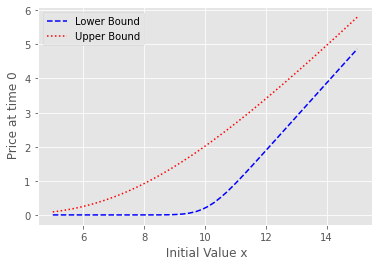

In [8]:
#Frame of interest
start_value_plot = 5
end_value_plot = 15
# Project Values to the grid
x=np.linspace(start_value_plot,end_value_plot,50)
u_low_call = u_lower_interpol_call(x)
u_up_call = u_upper_interpol_call(x)
#Plot everything
plt.plot(x,u_low_call,label="Lower Bound",linestyle = "dashed", color = "blue")
plt.plot(x,u_up_call,label="Upper Bound",linestyle = "dotted", color = "red")
plt.xlabel(" Initial Value x")
plt.ylabel(" Price at time 0")
plt.legend()
plt.grid(True)
plt.show()

Moreover, we illustrate everything time-dependent

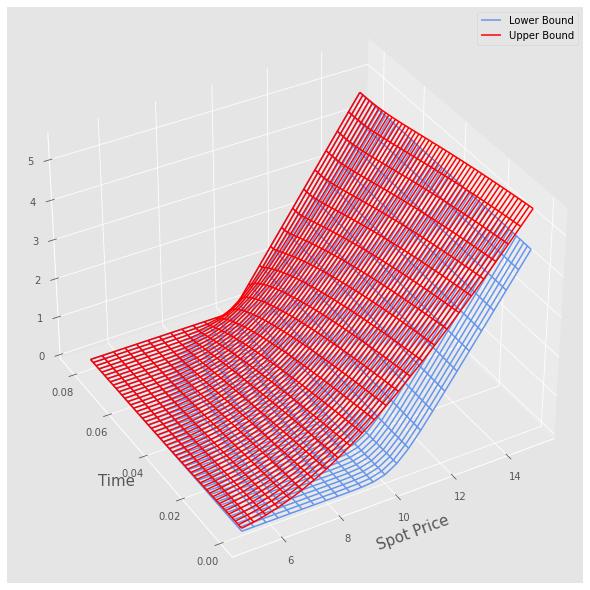

In [9]:
fig = plt.figure(figsize=(12,8))
ax = Axes3D(fig)

ind_start_plot = int(Nr_grid_s*((start_value_plot-start_value)/(end_value-start_value)))
ind_end_plot = int(Nr_grid_s*((end_value_plot-start_value)/(end_value-start_value)))
s = np.linspace(start_value_plot,end_value_plot,ind_end_plot-ind_start_plot)
t = np.linspace(time_from,time_to,Nr_grid_t)

X, Y = np.meshgrid(s, t)
ax.plot_wireframe(X, Y , u_lower_grid_call[:,ind_start_plot:ind_end_plot],color = "cornflowerblue",label="Lower Bound")
ax.plot_wireframe(X, Y , u_upper_grid_call[:,ind_start_plot:ind_end_plot],color = "red", label = "Upper Bound")
ax.view_init(35,  -120)
ax.set_xlabel("Spot Price", fontsize=15)
ax.set_ylabel("Time", fontsize=15)
plt.legend()
plt.show()

## Comparison

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


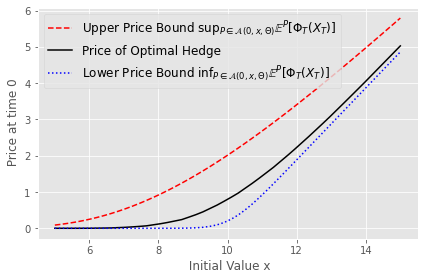

In [20]:
x=np.linspace(start_value_plot,end_value_plot,50)
# Neural Network prices:
hedges_nn_interpol_call=interp1d(np.linspace(5,15,20),hedges_call)
hedges_nn_call = hedges_nn_interpol_call(x)

# Finite Differences:
u_low_call = u_lower_interpol_call(x)
u_up_call = u_upper_interpol_call(x)

#Plotting
plt.plot(x,u_up_call,
         label="Upper Price Bound " +r'$\operatorname{sup}_{P\in \mathcal{A}(0,x,\Theta)}\mathbb{E}^P[\Phi_T(X_T)]$',

         linestyle = "dashed", color = "red")
plt.plot(x,hedges_nn_call,label="Price of Optimal Hedge",linestyle = "solid", color = "black")
plt.plot(x,u_low_call,
         label="Lower Price Bound " +r'$\operatorname{inf}_{P\in \mathcal{A}(0,x,\Theta)}\mathbb{E}^P[\Phi_T(X_T)]$',
         linestyle = "dotted", color = "blue")
plt.xlabel(" Initial Value x")
plt.ylabel(" Price at time 0")
plt.legend(fontsize =12)
plt.grid(True)
plt.tight_layout()
plt.savefig('eps/fig_comparison_prices_call.eps', format='eps')
plt.show()

# Butterfly Option

We apply the same computations to a butterfly option with payoff
$$
(S_{t_n}-8)^++(S_{t_n}-12)^+-2\cdot(S_{t_n}-10)^+
$$

First, we compute the hedging prices

In [11]:
hedges_bf = []

# Define the payoff function
def derivative(path):
    return tf.nn.relu(path[-1]-(12))+tf.nn.relu(path[-1]-(8))-2*tf.nn.relu(path[-1]-10)

# Compute the prices 
for x_0 in np.linspace(5.,15.,20):
    x_0 = x_0.item() # Conversion to python-native float
    p, _ = optimal_hedge(derivative,a_0,a_1,b_0,b_1,gamma,x_0,T,n,
                             depth = 4,nr_neurons = 256,EPOCHS = 500,l_r = 0.005,BATCH_SIZE =256,hedge = "hedge")
    hedges_bf.append(p)

  0%|          | 0/500 [00:00<?, ?it/s]


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



  2%|▏         | 11/500 [00:05<04:20,  1.88it/s]

Iteration:10, Price of Hedge: -0.009189996868371964, Loss: 0.00946026761084795


  4%|▍         | 21/500 [00:11<04:13,  1.89it/s]

Iteration:20, Price of Hedge: -0.002391993533819914, Loss: 0.0007935414323583245


  6%|▌         | 31/500 [00:16<04:09,  1.88it/s]

Iteration:30, Price of Hedge: 0.005040311720222235, Loss: 0.0004288285272195935


  8%|▊         | 41/500 [00:21<04:06,  1.86it/s]

Iteration:40, Price of Hedge: 0.004889501258730888, Loss: 0.00011292693670839071


 10%|█         | 51/500 [00:27<03:56,  1.90it/s]

Iteration:50, Price of Hedge: 0.002628236310556531, Loss: 0.00039050361374393106


 12%|█▏        | 61/500 [00:32<03:59,  1.83it/s]

Iteration:60, Price of Hedge: 0.0015299769584089518, Loss: 0.002056141383945942


 14%|█▍        | 71/500 [00:38<03:50,  1.86it/s]

Iteration:70, Price of Hedge: 0.0034961095079779625, Loss: 0.0041443766094744205


 16%|█▌        | 81/500 [00:43<03:44,  1.87it/s]

Iteration:80, Price of Hedge: 0.004110841080546379, Loss: 0.008270161226391792


 18%|█▊        | 91/500 [00:48<03:38,  1.87it/s]

Iteration:90, Price of Hedge: 0.0022208024747669697, Loss: 0.000278978084679693


 20%|██        | 101/500 [00:54<03:32,  1.88it/s]

Iteration:100, Price of Hedge: 0.002833911217749119, Loss: 0.00025140141951851547


 22%|██▏       | 111/500 [00:59<03:28,  1.86it/s]

Iteration:110, Price of Hedge: 0.00230485200881958, Loss: 0.007244841195642948


 24%|██▍       | 121/500 [01:04<03:23,  1.86it/s]

Iteration:120, Price of Hedge: 0.004367324523627758, Loss: 0.006221262738108635


 26%|██▌       | 131/500 [01:10<03:16,  1.88it/s]

Iteration:130, Price of Hedge: 0.002423469675704837, Loss: 0.0001967759890248999


 28%|██▊       | 141/500 [01:15<03:11,  1.87it/s]

Iteration:140, Price of Hedge: 0.0036658726166933775, Loss: 0.0003378851106390357


 30%|███       | 151/500 [01:20<03:04,  1.89it/s]

Iteration:150, Price of Hedge: 0.0016770729562267661, Loss: 0.00032754905987530947


 32%|███▏      | 161/500 [01:26<03:01,  1.87it/s]

Iteration:160, Price of Hedge: 0.0019432774279266596, Loss: 0.00014633916725870222


 34%|███▍      | 171/500 [01:31<02:55,  1.87it/s]

Iteration:170, Price of Hedge: 0.0005113884108141065, Loss: 7.211042247945443e-05


 36%|███▌      | 181/500 [01:36<02:50,  1.87it/s]

Iteration:180, Price of Hedge: 0.0031111405696719885, Loss: 0.006883704569190741


 38%|███▊      | 191/500 [01:42<02:45,  1.87it/s]

Iteration:190, Price of Hedge: 0.002040904015302658, Loss: 5.0951464800164104e-05


 40%|████      | 201/500 [01:47<02:43,  1.83it/s]

Iteration:200, Price of Hedge: 0.0014587584882974625, Loss: 0.0002864855923689902


 42%|████▏     | 211/500 [01:53<02:35,  1.86it/s]

Iteration:210, Price of Hedge: 0.003883778816089034, Loss: 0.0018573295092210174


 44%|████▍     | 221/500 [01:58<02:27,  1.89it/s]

Iteration:220, Price of Hedge: 0.0008956570527516305, Loss: 0.0017680436139926314


 46%|████▌     | 231/500 [02:03<02:25,  1.85it/s]

Iteration:230, Price of Hedge: 0.002046613022685051, Loss: 0.0009176883613690734


 48%|████▊     | 241/500 [02:09<02:17,  1.88it/s]

Iteration:240, Price of Hedge: 0.003393415128812194, Loss: 0.00015159917529672384


 50%|█████     | 251/500 [02:14<02:13,  1.86it/s]

Iteration:250, Price of Hedge: 0.00312872976064682, Loss: 0.004152875393629074


 52%|█████▏    | 261/500 [02:19<02:07,  1.88it/s]

Iteration:260, Price of Hedge: 0.0028198338113725185, Loss: 0.0033910772763192654


 54%|█████▍    | 271/500 [02:25<02:02,  1.88it/s]

Iteration:270, Price of Hedge: 0.003715191502124071, Loss: 0.0006785744917578995


 56%|█████▌    | 281/500 [02:30<02:00,  1.82it/s]

Iteration:280, Price of Hedge: 0.0039265817031264305, Loss: 0.01064680889248848


 58%|█████▊    | 291/500 [02:36<01:52,  1.85it/s]

Iteration:290, Price of Hedge: 0.0020771303679794073, Loss: 0.00581899331882596


 60%|██████    | 301/500 [02:41<01:46,  1.86it/s]

Iteration:300, Price of Hedge: 0.002288431627675891, Loss: 0.00014807602565269917


 62%|██████▏   | 311/500 [02:46<01:41,  1.87it/s]

Iteration:310, Price of Hedge: 0.0014797684270888567, Loss: 0.00032283610198646784


 64%|██████▍   | 321/500 [02:52<01:35,  1.87it/s]

Iteration:320, Price of Hedge: 0.0028000951278954744, Loss: 0.00021461659343913198


 66%|██████▌   | 331/500 [02:57<01:29,  1.89it/s]

Iteration:330, Price of Hedge: 0.00215361500158906, Loss: 0.0002204324264312163


 68%|██████▊   | 341/500 [03:02<01:24,  1.88it/s]

Iteration:340, Price of Hedge: 0.0014725327491760254, Loss: 0.0011353949084877968


 70%|███████   | 351/500 [03:08<01:18,  1.89it/s]

Iteration:350, Price of Hedge: 0.0038828696124255657, Loss: 0.0005681723123416305


 72%|███████▏  | 361/500 [03:13<01:15,  1.84it/s]

Iteration:360, Price of Hedge: 0.0018819035030901432, Loss: 0.00545066874474287


 74%|███████▍  | 371/500 [03:18<01:09,  1.86it/s]

Iteration:370, Price of Hedge: 0.0044835940934717655, Loss: 0.0009240910294465721


 76%|███████▌  | 381/500 [03:24<01:04,  1.83it/s]

Iteration:380, Price of Hedge: 0.0013319395948201418, Loss: 0.0013465811498463154


 78%|███████▊  | 391/500 [03:29<00:59,  1.84it/s]

Iteration:390, Price of Hedge: 0.0035530575551092625, Loss: 0.0038835546001791954


 80%|████████  | 401/500 [03:35<00:54,  1.83it/s]

Iteration:400, Price of Hedge: 0.0024587097577750683, Loss: 0.000387015548767522


 82%|████████▏ | 411/500 [03:40<00:48,  1.84it/s]

Iteration:410, Price of Hedge: 0.002205999568104744, Loss: 0.00033208722015842795


 84%|████████▍ | 421/500 [03:46<00:42,  1.86it/s]

Iteration:420, Price of Hedge: 0.00040890666423365474, Loss: 4.8353293095715344e-05


 86%|████████▌ | 431/500 [03:51<00:37,  1.86it/s]

Iteration:430, Price of Hedge: 0.0030221554916352034, Loss: 0.000145457946928218


 88%|████████▊ | 441/500 [03:56<00:31,  1.89it/s]

Iteration:440, Price of Hedge: 0.0031395377591252327, Loss: 0.0004083164967596531


 90%|█████████ | 451/500 [04:02<00:26,  1.88it/s]

Iteration:450, Price of Hedge: 0.0010832903208211064, Loss: 0.0002963987644761801


 92%|█████████▏| 461/500 [04:07<00:20,  1.87it/s]

Iteration:460, Price of Hedge: 0.0057202549651265144, Loss: 0.009405083023011684


 94%|█████████▍| 471/500 [04:12<00:15,  1.87it/s]

Iteration:470, Price of Hedge: 0.0003207151312381029, Loss: 6.0072707128711045e-05


 96%|█████████▌| 481/500 [04:18<00:10,  1.86it/s]

Iteration:480, Price of Hedge: 0.001271239947527647, Loss: 9.411550854565576e-05


 98%|█████████▊| 491/500 [04:23<00:04,  1.87it/s]

Iteration:490, Price of Hedge: 0.002842584392055869, Loss: 0.0036799355875700712


  0%|          | 0/500 [00:00<?, ?it/s]


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



  2%|▏         | 11/500 [00:06<04:26,  1.84it/s]

Iteration:10, Price of Hedge: 0.010581230744719505, Loss: 0.019512386992573738


  4%|▍         | 21/500 [00:11<04:15,  1.87it/s]

Iteration:20, Price of Hedge: 0.018906373530626297, Loss: 0.012807666324079037


  6%|▌         | 31/500 [00:16<04:07,  1.89it/s]

Iteration:30, Price of Hedge: 0.008793524466454983, Loss: 0.0028295309748500586


  8%|▊         | 41/500 [00:21<04:02,  1.89it/s]

Iteration:40, Price of Hedge: 0.012329249642789364, Loss: 0.012326156720519066


 10%|█         | 51/500 [00:27<03:59,  1.87it/s]

Iteration:50, Price of Hedge: 0.018385302275419235, Loss: 0.006713973358273506


 12%|█▏        | 61/500 [00:32<03:55,  1.87it/s]

Iteration:60, Price of Hedge: 0.008072460070252419, Loss: 0.00840570405125618


 14%|█▍        | 71/500 [00:38<03:48,  1.88it/s]

Iteration:70, Price of Hedge: 0.01072012074291706, Loss: 0.0066861314699053764


 16%|█▌        | 81/500 [00:43<03:43,  1.87it/s]

Iteration:80, Price of Hedge: 0.013952926732599735, Loss: 0.009890598244965076


 18%|█▊        | 91/500 [00:48<03:40,  1.86it/s]

Iteration:90, Price of Hedge: 0.014118300750851631, Loss: 0.005644830409437418


 20%|██        | 101/500 [00:54<03:35,  1.85it/s]

Iteration:100, Price of Hedge: 0.008163846097886562, Loss: 0.0032671205699443817


 22%|██▏       | 111/500 [00:59<03:27,  1.88it/s]

Iteration:110, Price of Hedge: 0.011638353578746319, Loss: 0.005640784278512001


 24%|██▍       | 121/500 [01:04<03:21,  1.88it/s]

Iteration:120, Price of Hedge: 0.01160192396491766, Loss: 0.005616260226815939


 26%|██▌       | 131/500 [01:10<03:17,  1.87it/s]

Iteration:130, Price of Hedge: 0.015346290543675423, Loss: 0.007434378378093243


 28%|██▊       | 141/500 [01:15<03:12,  1.87it/s]

Iteration:140, Price of Hedge: 0.007310959976166487, Loss: 0.009237837046384811


 30%|███       | 151/500 [01:20<03:07,  1.86it/s]

Iteration:150, Price of Hedge: 0.014403498731553555, Loss: 0.009858647361397743


 32%|███▏      | 161/500 [01:25<02:59,  1.89it/s]

Iteration:160, Price of Hedge: 0.008287527598440647, Loss: 0.0022443050984293222


 34%|███▍      | 171/500 [01:31<02:55,  1.88it/s]

Iteration:170, Price of Hedge: 0.015875890851020813, Loss: 0.014152660965919495


 36%|███▌      | 181/500 [01:36<02:50,  1.87it/s]

Iteration:180, Price of Hedge: 0.01358527597039938, Loss: 0.0031327218748629093


 38%|███▊      | 191/500 [01:41<02:45,  1.87it/s]

Iteration:190, Price of Hedge: 0.007404387928545475, Loss: 0.019010573625564575


 40%|████      | 201/500 [01:47<02:39,  1.88it/s]

Iteration:200, Price of Hedge: 0.011065291240811348, Loss: 0.030485952273011208


 42%|████▏     | 211/500 [01:52<02:33,  1.88it/s]

Iteration:210, Price of Hedge: 0.013623065315186977, Loss: 0.009117573499679565


 44%|████▍     | 221/500 [01:57<02:29,  1.87it/s]

Iteration:220, Price of Hedge: 0.012379036284983158, Loss: 0.0027012438513338566


 46%|████▌     | 231/500 [02:03<02:25,  1.84it/s]

Iteration:230, Price of Hedge: 0.0068900203332304955, Loss: 0.004561777226626873


 48%|████▊     | 241/500 [02:08<02:17,  1.88it/s]

Iteration:240, Price of Hedge: 0.019047971814870834, Loss: 0.015909798443317413


 50%|█████     | 251/500 [02:14<02:13,  1.86it/s]

Iteration:250, Price of Hedge: 0.0034002410247921944, Loss: 0.00402558408677578


 52%|█████▏    | 261/500 [02:19<02:06,  1.88it/s]

Iteration:260, Price of Hedge: 0.010352032259106636, Loss: 0.017438556998968124


 54%|█████▍    | 271/500 [02:24<02:03,  1.86it/s]

Iteration:270, Price of Hedge: 0.02336251549422741, Loss: 0.009030121378600597


 56%|█████▌    | 281/500 [02:30<01:58,  1.85it/s]

Iteration:280, Price of Hedge: 0.00601844722405076, Loss: 0.013033943250775337


 58%|█████▊    | 291/500 [02:35<01:49,  1.91it/s]

Iteration:290, Price of Hedge: 0.01396149955689907, Loss: 0.003799536731094122


 60%|██████    | 301/500 [02:40<01:47,  1.86it/s]

Iteration:300, Price of Hedge: 0.01190593745559454, Loss: 0.006571942940354347


 62%|██████▏   | 311/500 [02:46<01:39,  1.90it/s]

Iteration:310, Price of Hedge: 0.012305045500397682, Loss: 0.021214250475168228


 64%|██████▍   | 321/500 [02:51<01:35,  1.87it/s]

Iteration:320, Price of Hedge: 0.008390091359615326, Loss: 0.004439257085323334


 66%|██████▌   | 331/500 [02:56<01:29,  1.89it/s]

Iteration:330, Price of Hedge: 0.012063668109476566, Loss: 0.014983448199927807


 68%|██████▊   | 341/500 [03:02<01:25,  1.87it/s]

Iteration:340, Price of Hedge: 0.013967526145279408, Loss: 0.006400518584996462


 70%|███████   | 351/500 [03:07<01:18,  1.91it/s]

Iteration:350, Price of Hedge: 0.009163454174995422, Loss: 0.0035543390549719334


 72%|███████▏  | 361/500 [03:12<01:14,  1.86it/s]

Iteration:360, Price of Hedge: 0.01227554865181446, Loss: 0.0009926371276378632


 74%|███████▍  | 371/500 [03:18<01:09,  1.86it/s]

Iteration:370, Price of Hedge: 0.007482356391847134, Loss: 0.0056464397348463535


 76%|███████▌  | 381/500 [03:23<01:02,  1.90it/s]

Iteration:380, Price of Hedge: 0.016243034973740578, Loss: 0.0031907709781080484


 78%|███████▊  | 391/500 [03:28<00:58,  1.88it/s]

Iteration:390, Price of Hedge: 0.012675859034061432, Loss: 0.001471483032219112


 80%|████████  | 401/500 [03:34<00:52,  1.87it/s]

Iteration:400, Price of Hedge: 0.01025654561817646, Loss: 0.014724434353411198


 82%|████████▏ | 411/500 [03:39<00:47,  1.88it/s]

Iteration:410, Price of Hedge: 0.008652101270854473, Loss: 0.003899503033608198


 84%|████████▍ | 421/500 [03:44<00:42,  1.86it/s]

Iteration:420, Price of Hedge: 0.009571394883096218, Loss: 0.0046999407932162285


 86%|████████▌ | 431/500 [03:50<00:37,  1.83it/s]

Iteration:430, Price of Hedge: 0.013710546307265759, Loss: 0.012524617835879326


 88%|████████▊ | 441/500 [03:55<00:31,  1.85it/s]

Iteration:440, Price of Hedge: 0.01148949470371008, Loss: 0.007878614589571953


 90%|█████████ | 451/500 [04:00<00:26,  1.82it/s]

Iteration:450, Price of Hedge: 0.012870042584836483, Loss: 0.010965158231556416


 92%|█████████▏| 461/500 [04:06<00:21,  1.81it/s]

Iteration:460, Price of Hedge: 0.010899881832301617, Loss: 0.009726987220346928


 94%|█████████▍| 471/500 [04:12<00:15,  1.84it/s]

Iteration:470, Price of Hedge: 0.008327718824148178, Loss: 0.013764474540948868


 96%|█████████▌| 481/500 [04:17<00:10,  1.89it/s]

Iteration:480, Price of Hedge: 0.016062581911683083, Loss: 0.008133981376886368


 98%|█████████▊| 491/500 [04:22<00:04,  1.87it/s]

Iteration:490, Price of Hedge: 0.005318995099514723, Loss: 0.005196207202970982


  0%|          | 0/500 [00:00<?, ?it/s]


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



  2%|▏         | 11/500 [00:05<04:16,  1.90it/s]

Iteration:10, Price of Hedge: 0.05370941385626793, Loss: 0.034611672163009644


  4%|▍         | 21/500 [00:11<04:17,  1.86it/s]

Iteration:20, Price of Hedge: 0.05423073470592499, Loss: 0.03059130348265171


  6%|▌         | 31/500 [00:16<04:07,  1.89it/s]

Iteration:30, Price of Hedge: 0.04537215828895569, Loss: 0.007550705689936876


  8%|▊         | 41/500 [00:21<04:03,  1.88it/s]

Iteration:40, Price of Hedge: 0.03631988540291786, Loss: 0.03290826454758644


 10%|█         | 51/500 [00:27<03:59,  1.88it/s]

Iteration:50, Price of Hedge: 0.03482918068766594, Loss: 0.061180245131254196


 12%|█▏        | 61/500 [00:32<03:49,  1.91it/s]

Iteration:60, Price of Hedge: 0.035623569041490555, Loss: 0.032761186361312866


 14%|█▍        | 71/500 [00:37<03:47,  1.89it/s]

Iteration:70, Price of Hedge: 0.03883494809269905, Loss: 0.03070870414376259


 16%|█▌        | 81/500 [00:43<03:41,  1.89it/s]

Iteration:80, Price of Hedge: 0.038881607353687286, Loss: 0.018842870369553566


 18%|█▊        | 91/500 [00:48<03:37,  1.88it/s]

Iteration:90, Price of Hedge: 0.03802412003278732, Loss: 0.011547786183655262


 20%|██        | 101/500 [00:53<03:32,  1.88it/s]

Iteration:100, Price of Hedge: 0.037948399782180786, Loss: 0.009833799675107002


 22%|██▏       | 111/500 [00:58<03:25,  1.89it/s]

Iteration:110, Price of Hedge: 0.03695850074291229, Loss: 0.014577971771359444


 24%|██▍       | 121/500 [01:04<03:20,  1.89it/s]

Iteration:120, Price of Hedge: 0.03720014914870262, Loss: 0.01952734775841236


 26%|██▌       | 131/500 [01:09<03:17,  1.87it/s]

Iteration:130, Price of Hedge: 0.038771096616983414, Loss: 0.012289201840758324


 28%|██▊       | 141/500 [01:15<03:10,  1.89it/s]

Iteration:140, Price of Hedge: 0.03958302363753319, Loss: 0.015880240127444267


 30%|███       | 151/500 [01:20<03:06,  1.88it/s]

Iteration:150, Price of Hedge: 0.03674573823809624, Loss: 0.008968469686806202


 32%|███▏      | 161/500 [01:25<02:59,  1.89it/s]

Iteration:160, Price of Hedge: 0.033203769475221634, Loss: 0.01816992275416851


 34%|███▍      | 171/500 [01:30<02:55,  1.87it/s]

Iteration:170, Price of Hedge: 0.03985157236456871, Loss: 0.01620127260684967


 36%|███▌      | 181/500 [01:36<02:54,  1.83it/s]

Iteration:180, Price of Hedge: 0.044900208711624146, Loss: 0.04626600071787834


 38%|███▊      | 191/500 [01:41<02:45,  1.86it/s]

Iteration:190, Price of Hedge: 0.037957482039928436, Loss: 0.013955583795905113


 40%|████      | 201/500 [01:47<02:41,  1.85it/s]

Iteration:200, Price of Hedge: 0.038972463458776474, Loss: 0.02366475574672222


 42%|████▏     | 211/500 [01:52<02:32,  1.89it/s]

Iteration:210, Price of Hedge: 0.04134591668844223, Loss: 0.011005569249391556


 44%|████▍     | 221/500 [01:57<02:29,  1.86it/s]

Iteration:220, Price of Hedge: 0.037367671728134155, Loss: 0.0148114999756217


 46%|████▌     | 231/500 [02:03<02:24,  1.87it/s]

Iteration:230, Price of Hedge: 0.03910881280899048, Loss: 0.012195589952170849


 48%|████▊     | 241/500 [02:08<02:17,  1.88it/s]

Iteration:240, Price of Hedge: 0.041275739669799805, Loss: 0.023725327104330063


 50%|█████     | 251/500 [02:13<02:15,  1.83it/s]

Iteration:250, Price of Hedge: 0.03663916885852814, Loss: 0.028270721435546875


 52%|█████▏    | 261/500 [02:19<02:08,  1.87it/s]

Iteration:260, Price of Hedge: 0.03465860337018967, Loss: 0.02355961874127388


 54%|█████▍    | 271/500 [02:24<02:02,  1.86it/s]

Iteration:270, Price of Hedge: 0.03935941308736801, Loss: 0.02166321687400341


 56%|█████▌    | 281/500 [02:29<01:56,  1.87it/s]

Iteration:280, Price of Hedge: 0.03951135650277138, Loss: 0.019065886735916138


 58%|█████▊    | 291/500 [02:35<01:50,  1.89it/s]

Iteration:290, Price of Hedge: 0.03497365862131119, Loss: 0.013597847893834114


 60%|██████    | 301/500 [02:40<01:46,  1.88it/s]

Iteration:300, Price of Hedge: 0.03869201987981796, Loss: 0.007624687626957893


 62%|██████▏   | 311/500 [02:46<01:42,  1.85it/s]

Iteration:310, Price of Hedge: 0.03644780069589615, Loss: 0.017038511112332344


 64%|██████▍   | 321/500 [02:51<01:36,  1.86it/s]

Iteration:320, Price of Hedge: 0.032868754118680954, Loss: 0.015761984512209892


 66%|██████▌   | 331/500 [02:56<01:29,  1.88it/s]

Iteration:330, Price of Hedge: 0.036539237946271896, Loss: 0.01814384199678898


 68%|██████▊   | 341/500 [03:02<01:24,  1.87it/s]

Iteration:340, Price of Hedge: 0.03839811310172081, Loss: 0.008350018411874771


 70%|███████   | 351/500 [03:07<01:20,  1.86it/s]

Iteration:350, Price of Hedge: 0.03885472193360329, Loss: 0.010560494847595692


 72%|███████▏  | 361/500 [03:12<01:14,  1.88it/s]

Iteration:360, Price of Hedge: 0.03769785538315773, Loss: 0.007600355893373489


 74%|███████▍  | 371/500 [03:18<01:08,  1.88it/s]

Iteration:370, Price of Hedge: 0.04169805720448494, Loss: 0.019771931692957878


 76%|███████▌  | 381/500 [03:23<01:03,  1.87it/s]

Iteration:380, Price of Hedge: 0.03873641788959503, Loss: 0.02009846270084381


 78%|███████▊  | 391/500 [03:28<00:58,  1.87it/s]

Iteration:390, Price of Hedge: 0.034218404442071915, Loss: 0.026556111872196198


 80%|████████  | 401/500 [03:34<00:52,  1.88it/s]

Iteration:400, Price of Hedge: 0.03758453205227852, Loss: 0.0191650353372097


 82%|████████▏ | 411/500 [03:39<00:48,  1.85it/s]

Iteration:410, Price of Hedge: 0.04126763716340065, Loss: 0.034365635365247726


 84%|████████▍ | 421/500 [03:45<00:42,  1.86it/s]

Iteration:420, Price of Hedge: 0.04275771602988243, Loss: 0.007931186817586422


 86%|████████▌ | 431/500 [03:50<00:37,  1.85it/s]

Iteration:430, Price of Hedge: 0.04083570837974548, Loss: 0.01161339320242405


 88%|████████▊ | 441/500 [03:55<00:31,  1.87it/s]

Iteration:440, Price of Hedge: 0.03699811175465584, Loss: 0.011229800060391426


 90%|█████████ | 451/500 [04:01<00:26,  1.88it/s]

Iteration:450, Price of Hedge: 0.04004860296845436, Loss: 0.02849484607577324


 92%|█████████▏| 461/500 [04:06<00:20,  1.90it/s]

Iteration:460, Price of Hedge: 0.038388535380363464, Loss: 0.01587207242846489


 94%|█████████▍| 471/500 [04:11<00:15,  1.87it/s]

Iteration:470, Price of Hedge: 0.03817061334848404, Loss: 0.010710093192756176


 96%|█████████▌| 481/500 [04:17<00:10,  1.85it/s]

Iteration:480, Price of Hedge: 0.045591652393341064, Loss: 0.007895237766206264


 98%|█████████▊| 491/500 [04:22<00:04,  1.83it/s]

Iteration:490, Price of Hedge: 0.03847325220704079, Loss: 0.02337203361093998


  0%|          | 0/500 [00:00<?, ?it/s]


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



  2%|▏         | 11/500 [00:06<04:26,  1.84it/s]

Iteration:10, Price of Hedge: 0.11364077031612396, Loss: 0.0837344154715538


  4%|▍         | 21/500 [00:11<04:19,  1.84it/s]

Iteration:20, Price of Hedge: 0.10348972678184509, Loss: 0.06547028571367264


  6%|▌         | 31/500 [00:16<04:14,  1.84it/s]

Iteration:30, Price of Hedge: 0.0913536474108696, Loss: 0.04552469775080681


  8%|▊         | 41/500 [00:22<04:03,  1.89it/s]

Iteration:40, Price of Hedge: 0.08970234543085098, Loss: 0.03379020839929581


 10%|█         | 51/500 [00:27<04:02,  1.86it/s]

Iteration:50, Price of Hedge: 0.09451516717672348, Loss: 0.051740795373916626


 12%|█▏        | 61/500 [00:32<03:51,  1.90it/s]

Iteration:60, Price of Hedge: 0.09477756917476654, Loss: 0.05016129091382027


 14%|█▍        | 71/500 [00:38<03:47,  1.88it/s]

Iteration:70, Price of Hedge: 0.09930694848299026, Loss: 0.041921406984329224


 16%|█▌        | 81/500 [00:43<03:44,  1.86it/s]

Iteration:80, Price of Hedge: 0.09886053949594498, Loss: 0.03975512459874153


 18%|█▊        | 91/500 [00:48<03:38,  1.87it/s]

Iteration:90, Price of Hedge: 0.08668600022792816, Loss: 0.03439345955848694


 20%|██        | 101/500 [00:54<03:31,  1.89it/s]

Iteration:100, Price of Hedge: 0.09055217355489731, Loss: 0.0867190733551979


 22%|██▏       | 111/500 [00:59<03:27,  1.88it/s]

Iteration:110, Price of Hedge: 0.10059380531311035, Loss: 0.05614982545375824


 24%|██▍       | 121/500 [01:04<03:22,  1.87it/s]

Iteration:120, Price of Hedge: 0.09654930979013443, Loss: 0.058462973684072495


 26%|██▌       | 131/500 [01:10<03:24,  1.80it/s]

Iteration:130, Price of Hedge: 0.10412051528692245, Loss: 0.06941063702106476


 28%|██▊       | 141/500 [01:15<03:11,  1.87it/s]

Iteration:140, Price of Hedge: 0.10769481211900711, Loss: 0.03919569030404091


 30%|███       | 151/500 [01:20<03:05,  1.88it/s]

Iteration:150, Price of Hedge: 0.0950530543923378, Loss: 0.04439171776175499


 32%|███▏      | 161/500 [01:26<03:07,  1.81it/s]

Iteration:160, Price of Hedge: 0.08273012936115265, Loss: 0.03752296790480614


 34%|███▍      | 171/500 [01:31<02:54,  1.88it/s]

Iteration:170, Price of Hedge: 0.09846492856740952, Loss: 0.04036770761013031


 36%|███▌      | 181/500 [01:36<02:51,  1.86it/s]

Iteration:180, Price of Hedge: 0.09783260524272919, Loss: 0.030919883400201797


 38%|███▊      | 191/500 [01:42<02:46,  1.86it/s]

Iteration:190, Price of Hedge: 0.09168808162212372, Loss: 0.036628060042858124


 40%|████      | 201/500 [01:47<02:41,  1.86it/s]

Iteration:200, Price of Hedge: 0.0921749547123909, Loss: 0.03652535751461983


 42%|████▏     | 211/500 [01:53<02:31,  1.91it/s]

Iteration:210, Price of Hedge: 0.10041205585002899, Loss: 0.03958713635802269


 44%|████▍     | 221/500 [01:58<02:29,  1.87it/s]

Iteration:220, Price of Hedge: 0.09452632814645767, Loss: 0.024194177240133286


 46%|████▌     | 231/500 [02:03<02:22,  1.89it/s]

Iteration:230, Price of Hedge: 0.08546033501625061, Loss: 0.03803764656186104


 48%|████▊     | 241/500 [02:09<02:19,  1.86it/s]

Iteration:240, Price of Hedge: 0.09471765905618668, Loss: 0.039048049598932266


 50%|█████     | 251/500 [02:14<02:15,  1.84it/s]

Iteration:250, Price of Hedge: 0.10048273205757141, Loss: 0.07845140993595123


 52%|█████▏    | 261/500 [02:19<02:08,  1.87it/s]

Iteration:260, Price of Hedge: 0.10559142380952835, Loss: 0.054670095443725586


 54%|█████▍    | 271/500 [02:25<02:02,  1.87it/s]

Iteration:270, Price of Hedge: 0.09795130044221878, Loss: 0.04200194776058197


 56%|█████▌    | 281/500 [02:30<01:55,  1.89it/s]

Iteration:280, Price of Hedge: 0.0948985368013382, Loss: 0.03013750910758972


 58%|█████▊    | 291/500 [02:35<01:51,  1.88it/s]

Iteration:290, Price of Hedge: 0.09908253699541092, Loss: 0.03966560959815979


 60%|██████    | 301/500 [02:41<01:44,  1.91it/s]

Iteration:300, Price of Hedge: 0.10505343973636627, Loss: 0.018882762640714645


 62%|██████▏   | 311/500 [02:46<01:38,  1.92it/s]

Iteration:310, Price of Hedge: 0.09533528238534927, Loss: 0.02089911513030529


 64%|██████▍   | 321/500 [02:51<01:35,  1.88it/s]

Iteration:320, Price of Hedge: 0.08926472067832947, Loss: 0.052533190697431564


 66%|██████▌   | 331/500 [02:56<01:30,  1.88it/s]

Iteration:330, Price of Hedge: 0.09444540739059448, Loss: 0.02753746695816517


 68%|██████▊   | 341/500 [03:02<01:25,  1.85it/s]

Iteration:340, Price of Hedge: 0.09640172123908997, Loss: 0.020774979144334793


 70%|███████   | 351/500 [03:07<01:21,  1.83it/s]

Iteration:350, Price of Hedge: 0.09452499449253082, Loss: 0.021579807624220848


 72%|███████▏  | 361/500 [03:13<01:14,  1.86it/s]

Iteration:360, Price of Hedge: 0.09026594460010529, Loss: 0.02411278896033764


 74%|███████▍  | 371/500 [03:18<01:10,  1.83it/s]

Iteration:370, Price of Hedge: 0.09507786482572556, Loss: 0.03526434674859047


 76%|███████▌  | 381/500 [03:24<01:04,  1.83it/s]

Iteration:380, Price of Hedge: 0.1025962382555008, Loss: 0.03189612925052643


 78%|███████▊  | 391/500 [03:29<00:59,  1.85it/s]

Iteration:390, Price of Hedge: 0.0945105105638504, Loss: 0.046161700040102005


 80%|████████  | 401/500 [03:35<00:53,  1.85it/s]

Iteration:400, Price of Hedge: 0.08476309478282928, Loss: 0.09391715377569199


 82%|████████▏ | 411/500 [03:40<00:48,  1.85it/s]

Iteration:410, Price of Hedge: 0.09297831356525421, Loss: 0.041780419647693634


 84%|████████▍ | 421/500 [03:45<00:41,  1.89it/s]

Iteration:420, Price of Hedge: 0.09529077261686325, Loss: 0.046407993882894516


 86%|████████▌ | 431/500 [03:51<00:37,  1.86it/s]

Iteration:430, Price of Hedge: 0.094944529235363, Loss: 0.04003230482339859


 88%|████████▊ | 441/500 [03:56<00:31,  1.87it/s]

Iteration:440, Price of Hedge: 0.09648767113685608, Loss: 0.04930121451616287


 90%|█████████ | 451/500 [04:01<00:26,  1.87it/s]

Iteration:450, Price of Hedge: 0.08509720861911774, Loss: 0.05106525123119354


 92%|█████████▏| 461/500 [04:07<00:20,  1.88it/s]

Iteration:460, Price of Hedge: 0.09592501074075699, Loss: 0.020961249247193336


 94%|█████████▍| 471/500 [04:12<00:15,  1.87it/s]

Iteration:470, Price of Hedge: 0.09972214698791504, Loss: 0.026483071967959404


 96%|█████████▌| 481/500 [04:17<00:10,  1.86it/s]

Iteration:480, Price of Hedge: 0.09035544842481613, Loss: 0.04483716934919357


 98%|█████████▊| 491/500 [04:23<00:04,  1.86it/s]

Iteration:490, Price of Hedge: 0.08647232502698898, Loss: 0.023991659283638


  0%|          | 0/500 [00:00<?, ?it/s]


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



  2%|▏         | 11/500 [00:05<04:19,  1.88it/s]

Iteration:10, Price of Hedge: 0.17217013239860535, Loss: 0.09262906759977341


  4%|▍         | 21/500 [00:11<04:19,  1.85it/s]

Iteration:20, Price of Hedge: 0.17979098856449127, Loss: 0.10531331598758698


  6%|▌         | 31/500 [00:16<04:15,  1.84it/s]

Iteration:30, Price of Hedge: 0.19249309599399567, Loss: 0.08404388278722763


  8%|▊         | 41/500 [00:22<04:08,  1.84it/s]

Iteration:40, Price of Hedge: 0.19505752623081207, Loss: 0.11029016971588135


 10%|█         | 51/500 [00:27<04:03,  1.84it/s]

Iteration:50, Price of Hedge: 0.19045016169548035, Loss: 0.08757821470499039


 12%|█▏        | 61/500 [00:32<03:59,  1.83it/s]

Iteration:60, Price of Hedge: 0.1836242526769638, Loss: 0.07261833548545837


 14%|█▍        | 71/500 [00:38<03:53,  1.84it/s]

Iteration:70, Price of Hedge: 0.1794540286064148, Loss: 0.09895411133766174


 16%|█▌        | 81/500 [00:43<03:53,  1.80it/s]

Iteration:80, Price of Hedge: 0.1830681562423706, Loss: 0.1080651581287384


 18%|█▊        | 91/500 [00:49<03:45,  1.81it/s]

Iteration:90, Price of Hedge: 0.1829420030117035, Loss: 0.08292210847139359


 20%|██        | 101/500 [00:54<03:34,  1.86it/s]

Iteration:100, Price of Hedge: 0.1842423379421234, Loss: 0.07646869868040085


 22%|██▏       | 111/500 [01:00<03:28,  1.86it/s]

Iteration:110, Price of Hedge: 0.1808205246925354, Loss: 0.09749595820903778


 24%|██▍       | 121/500 [01:05<03:24,  1.86it/s]

Iteration:120, Price of Hedge: 0.18788142502307892, Loss: 0.10395492613315582


 26%|██▌       | 131/500 [01:10<03:16,  1.87it/s]

Iteration:130, Price of Hedge: 0.20001459121704102, Loss: 0.07167216390371323


 28%|██▊       | 141/500 [01:16<03:11,  1.87it/s]

Iteration:140, Price of Hedge: 0.19493404030799866, Loss: 0.06300761550664902


 30%|███       | 151/500 [01:21<03:06,  1.87it/s]

Iteration:150, Price of Hedge: 0.18217861652374268, Loss: 0.09751004725694656


 32%|███▏      | 161/500 [01:26<02:58,  1.90it/s]

Iteration:160, Price of Hedge: 0.1773173213005066, Loss: 0.08040279150009155


 34%|███▍      | 171/500 [01:32<02:53,  1.90it/s]

Iteration:170, Price of Hedge: 0.184642031788826, Loss: 0.10090120881795883


 36%|███▌      | 181/500 [01:37<02:49,  1.89it/s]

Iteration:180, Price of Hedge: 0.1890735626220703, Loss: 0.09885495901107788


 38%|███▊      | 191/500 [01:42<02:43,  1.89it/s]

Iteration:190, Price of Hedge: 0.19466932117938995, Loss: 0.12275227904319763


 40%|████      | 201/500 [01:48<02:38,  1.89it/s]

Iteration:200, Price of Hedge: 0.19186648726463318, Loss: 0.08407004922628403


 42%|████▏     | 211/500 [01:53<02:34,  1.87it/s]

Iteration:210, Price of Hedge: 0.1812492161989212, Loss: 0.05852283164858818


 44%|████▍     | 221/500 [01:58<02:29,  1.87it/s]

Iteration:220, Price of Hedge: 0.17962759733200073, Loss: 0.07538873702287674


 46%|████▌     | 231/500 [02:04<02:22,  1.88it/s]

Iteration:230, Price of Hedge: 0.18652956187725067, Loss: 0.08296600729227066


 48%|████▊     | 241/500 [02:09<02:18,  1.87it/s]

Iteration:240, Price of Hedge: 0.193717360496521, Loss: 0.08146560192108154


 50%|█████     | 251/500 [02:14<02:12,  1.89it/s]

Iteration:250, Price of Hedge: 0.19200044870376587, Loss: 0.06853264570236206


 52%|█████▏    | 261/500 [02:20<02:07,  1.87it/s]

Iteration:260, Price of Hedge: 0.19516105949878693, Loss: 0.05862083286046982


 54%|█████▍    | 271/500 [02:25<02:01,  1.88it/s]

Iteration:270, Price of Hedge: 0.19965995848178864, Loss: 0.11134684085845947


 56%|█████▌    | 281/500 [02:30<01:56,  1.88it/s]

Iteration:280, Price of Hedge: 0.19245712459087372, Loss: 0.04654701054096222


 58%|█████▊    | 291/500 [02:36<01:51,  1.87it/s]

Iteration:290, Price of Hedge: 0.185900017619133, Loss: 0.08779434859752655


 60%|██████    | 301/500 [02:41<01:49,  1.81it/s]

Iteration:300, Price of Hedge: 0.19087356328964233, Loss: 0.14155864715576172


 62%|██████▏   | 311/500 [02:47<01:43,  1.83it/s]

Iteration:310, Price of Hedge: 0.19183050096035004, Loss: 0.07898500561714172


 64%|██████▍   | 321/500 [02:52<01:35,  1.87it/s]

Iteration:320, Price of Hedge: 0.1837770938873291, Loss: 0.08613190799951553


 66%|██████▌   | 331/500 [02:57<01:30,  1.87it/s]

Iteration:330, Price of Hedge: 0.19123953580856323, Loss: 0.06488661468029022


 68%|██████▊   | 341/500 [03:03<01:25,  1.87it/s]

Iteration:340, Price of Hedge: 0.19592124223709106, Loss: 0.07627204060554504


 70%|███████   | 351/500 [03:08<01:20,  1.86it/s]

Iteration:350, Price of Hedge: 0.1905084103345871, Loss: 0.08249267190694809


 72%|███████▏  | 361/500 [03:13<01:14,  1.86it/s]

Iteration:360, Price of Hedge: 0.18263772130012512, Loss: 0.09331648051738739


 74%|███████▍  | 371/500 [03:19<01:09,  1.86it/s]

Iteration:370, Price of Hedge: 0.18622346222400665, Loss: 0.07585910707712173


 76%|███████▌  | 381/500 [03:24<01:03,  1.86it/s]

Iteration:380, Price of Hedge: 0.18928901851177216, Loss: 0.07625298202037811


 78%|███████▊  | 391/500 [03:30<00:58,  1.86it/s]

Iteration:390, Price of Hedge: 0.1899271309375763, Loss: 0.08339431136846542


 80%|████████  | 401/500 [03:35<00:52,  1.89it/s]

Iteration:400, Price of Hedge: 0.183035746216774, Loss: 0.06275369226932526


 82%|████████▏ | 411/500 [03:40<00:47,  1.88it/s]

Iteration:410, Price of Hedge: 0.18766248226165771, Loss: 0.06768891960382462


 84%|████████▍ | 421/500 [03:46<00:42,  1.86it/s]

Iteration:420, Price of Hedge: 0.19595274329185486, Loss: 0.06209900602698326


 86%|████████▌ | 431/500 [03:51<00:36,  1.88it/s]

Iteration:430, Price of Hedge: 0.189957395195961, Loss: 0.12224850803613663


 88%|████████▊ | 441/500 [03:56<00:31,  1.86it/s]

Iteration:440, Price of Hedge: 0.1874466836452484, Loss: 0.09560377895832062


 90%|█████████ | 451/500 [04:02<00:25,  1.90it/s]

Iteration:450, Price of Hedge: 0.18368317186832428, Loss: 0.0957975760102272


 92%|█████████▏| 461/500 [04:07<00:20,  1.86it/s]

Iteration:460, Price of Hedge: 0.18353544175624847, Loss: 0.10126876085996628


 94%|█████████▍| 471/500 [04:12<00:15,  1.88it/s]

Iteration:470, Price of Hedge: 0.18010574579238892, Loss: 0.09281767904758453


 96%|█████████▌| 481/500 [04:18<00:10,  1.88it/s]

Iteration:480, Price of Hedge: 0.18920716643333435, Loss: 0.09397979825735092


 98%|█████████▊| 491/500 [04:23<00:04,  1.89it/s]

Iteration:490, Price of Hedge: 0.19805170595645905, Loss: 0.0689435601234436


  0%|          | 0/500 [00:00<?, ?it/s]


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



  2%|▏         | 11/500 [00:05<04:23,  1.86it/s]

Iteration:10, Price of Hedge: 0.29354622960090637, Loss: 0.1328568309545517


  4%|▍         | 21/500 [00:11<04:12,  1.89it/s]

Iteration:20, Price of Hedge: 0.31602683663368225, Loss: 0.18025563657283783


  6%|▌         | 31/500 [00:16<04:12,  1.85it/s]

Iteration:30, Price of Hedge: 0.3207155466079712, Loss: 0.1191667914390564


  8%|▊         | 41/500 [00:22<04:07,  1.85it/s]

Iteration:40, Price of Hedge: 0.3209971785545349, Loss: 0.1276024878025055


 10%|█         | 51/500 [00:27<03:58,  1.89it/s]

Iteration:50, Price of Hedge: 0.3201649487018585, Loss: 0.19152282178401947


 12%|█▏        | 61/500 [00:32<03:55,  1.87it/s]

Iteration:60, Price of Hedge: 0.3137970268726349, Loss: 0.15210603177547455


 14%|█▍        | 71/500 [00:38<03:51,  1.85it/s]

Iteration:70, Price of Hedge: 0.32163989543914795, Loss: 0.1009761244058609


 16%|█▌        | 81/500 [00:43<03:45,  1.86it/s]

Iteration:80, Price of Hedge: 0.3285880386829376, Loss: 0.1666404902935028


 18%|█▊        | 91/500 [00:49<03:38,  1.87it/s]

Iteration:90, Price of Hedge: 0.31776586174964905, Loss: 0.16527821123600006


 20%|██        | 101/500 [00:54<03:39,  1.82it/s]

Iteration:100, Price of Hedge: 0.3112637400627136, Loss: 0.18507684767246246


 22%|██▏       | 111/500 [01:00<03:34,  1.81it/s]

Iteration:110, Price of Hedge: 0.314189612865448, Loss: 0.22842873632907867


 24%|██▍       | 121/500 [01:05<03:26,  1.83it/s]

Iteration:120, Price of Hedge: 0.30922383069992065, Loss: 0.11616580188274384


 26%|██▌       | 131/500 [01:10<03:20,  1.84it/s]

Iteration:130, Price of Hedge: 0.30237871408462524, Loss: 0.11220593005418777


 28%|██▊       | 141/500 [01:16<03:13,  1.85it/s]

Iteration:140, Price of Hedge: 0.30779051780700684, Loss: 0.14026693999767303


 30%|███       | 151/500 [01:21<03:08,  1.85it/s]

Iteration:150, Price of Hedge: 0.3058561086654663, Loss: 0.14113564789295197


 32%|███▏      | 161/500 [01:27<03:03,  1.85it/s]

Iteration:160, Price of Hedge: 0.31176280975341797, Loss: 0.12908831238746643


 34%|███▍      | 171/500 [01:32<02:54,  1.88it/s]

Iteration:170, Price of Hedge: 0.3205343186855316, Loss: 0.1631081998348236


 36%|███▌      | 181/500 [01:37<02:48,  1.89it/s]

Iteration:180, Price of Hedge: 0.3162381052970886, Loss: 0.11734703183174133


 38%|███▊      | 191/500 [01:43<02:43,  1.89it/s]

Iteration:190, Price of Hedge: 0.3035135269165039, Loss: 0.14989708364009857


 40%|████      | 201/500 [01:48<02:39,  1.88it/s]

Iteration:200, Price of Hedge: 0.30864015221595764, Loss: 0.14286860823631287


 42%|████▏     | 211/500 [01:53<02:35,  1.86it/s]

Iteration:210, Price of Hedge: 0.3112342953681946, Loss: 0.12938684225082397


 44%|████▍     | 221/500 [01:58<02:26,  1.90it/s]

Iteration:220, Price of Hedge: 0.31562885642051697, Loss: 0.11553483456373215


 46%|████▌     | 231/500 [02:04<02:24,  1.86it/s]

Iteration:230, Price of Hedge: 0.3064945638179779, Loss: 0.12637726962566376


 48%|████▊     | 241/500 [02:09<02:16,  1.90it/s]

Iteration:240, Price of Hedge: 0.3209674656391144, Loss: 0.10343600809574127


 50%|█████     | 251/500 [02:15<02:20,  1.77it/s]

Iteration:250, Price of Hedge: 0.3212563991546631, Loss: 0.18508827686309814


 52%|█████▏    | 261/500 [02:20<02:11,  1.82it/s]

Iteration:260, Price of Hedge: 0.32481175661087036, Loss: 0.1235756129026413


 54%|█████▍    | 271/500 [02:25<02:02,  1.86it/s]

Iteration:270, Price of Hedge: 0.312326043844223, Loss: 0.11474259197711945


 56%|█████▌    | 281/500 [02:31<01:56,  1.88it/s]

Iteration:280, Price of Hedge: 0.3149248957633972, Loss: 0.1804494708776474


 58%|█████▊    | 291/500 [02:36<01:52,  1.85it/s]

Iteration:290, Price of Hedge: 0.32509690523147583, Loss: 0.16943815350532532


 60%|██████    | 301/500 [02:42<01:47,  1.85it/s]

Iteration:300, Price of Hedge: 0.308769166469574, Loss: 0.1431088149547577


 62%|██████▏   | 311/500 [02:47<01:40,  1.88it/s]

Iteration:310, Price of Hedge: 0.3020230531692505, Loss: 0.13614827394485474


 64%|██████▍   | 321/500 [02:52<01:35,  1.88it/s]

Iteration:320, Price of Hedge: 0.3085486590862274, Loss: 0.13755729794502258


 66%|██████▌   | 331/500 [02:58<01:29,  1.88it/s]

Iteration:330, Price of Hedge: 0.314768522977829, Loss: 0.14482389390468597


 68%|██████▊   | 341/500 [03:03<01:24,  1.88it/s]

Iteration:340, Price of Hedge: 0.3167046010494232, Loss: 0.11276395618915558


 70%|███████   | 351/500 [03:08<01:19,  1.86it/s]

Iteration:350, Price of Hedge: 0.326346218585968, Loss: 0.1301943063735962


 72%|███████▏  | 361/500 [03:14<01:14,  1.88it/s]

Iteration:360, Price of Hedge: 0.31399616599082947, Loss: 0.14301949739456177


 74%|███████▍  | 371/500 [03:19<01:09,  1.86it/s]

Iteration:370, Price of Hedge: 0.31068775057792664, Loss: 0.11519850790500641


 76%|███████▌  | 381/500 [03:24<01:03,  1.87it/s]

Iteration:380, Price of Hedge: 0.31882965564727783, Loss: 0.113111212849617


 78%|███████▊  | 391/500 [03:30<00:58,  1.86it/s]

Iteration:390, Price of Hedge: 0.3201018273830414, Loss: 0.13751141726970673


 80%|████████  | 401/500 [03:35<00:52,  1.88it/s]

Iteration:400, Price of Hedge: 0.31640422344207764, Loss: 0.14710356295108795


 82%|████████▏ | 411/500 [03:40<00:47,  1.87it/s]

Iteration:410, Price of Hedge: 0.30741196870803833, Loss: 0.08550874888896942


 84%|████████▍ | 421/500 [03:46<00:42,  1.87it/s]

Iteration:420, Price of Hedge: 0.315891832113266, Loss: 0.07278309017419815


 86%|████████▌ | 431/500 [03:51<00:36,  1.91it/s]

Iteration:430, Price of Hedge: 0.3181278109550476, Loss: 0.06642676889896393


 88%|████████▊ | 441/500 [03:56<00:31,  1.87it/s]

Iteration:440, Price of Hedge: 0.3134356141090393, Loss: 0.0795869529247284


 90%|█████████ | 451/500 [04:02<00:26,  1.86it/s]

Iteration:450, Price of Hedge: 0.2913520336151123, Loss: 0.1337154656648636


 92%|█████████▏| 461/500 [04:07<00:20,  1.91it/s]

Iteration:460, Price of Hedge: 0.30423784255981445, Loss: 0.16192114353179932


 94%|█████████▍| 471/500 [04:12<00:15,  1.88it/s]

Iteration:470, Price of Hedge: 0.3239881992340088, Loss: 0.16672064363956451


 96%|█████████▌| 481/500 [04:18<00:10,  1.80it/s]

Iteration:480, Price of Hedge: 0.3172948658466339, Loss: 0.11950872838497162


 98%|█████████▊| 491/500 [04:23<00:04,  1.88it/s]

Iteration:490, Price of Hedge: 0.31767499446868896, Loss: 0.14076478779315948


  0%|          | 0/500 [00:00<?, ?it/s]


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



  2%|▏         | 11/500 [00:05<04:22,  1.87it/s]

Iteration:10, Price of Hedge: 0.46788325905799866, Loss: 0.5369601249694824


  4%|▍         | 21/500 [00:11<04:14,  1.88it/s]

Iteration:20, Price of Hedge: 0.4582173824310303, Loss: 0.33928385376930237


  6%|▌         | 31/500 [00:16<04:13,  1.85it/s]

Iteration:30, Price of Hedge: 0.44672030210494995, Loss: 0.2957020103931427


  8%|▊         | 41/500 [00:21<04:06,  1.86it/s]

Iteration:40, Price of Hedge: 0.4493289887905121, Loss: 0.2671087682247162


 10%|█         | 51/500 [00:27<04:01,  1.86it/s]

Iteration:50, Price of Hedge: 0.4573209881782532, Loss: 0.24169830977916718


 12%|█▏        | 61/500 [00:32<03:55,  1.87it/s]

Iteration:60, Price of Hedge: 0.45996925234794617, Loss: 0.23576170206069946


 14%|█▍        | 71/500 [00:37<03:49,  1.87it/s]

Iteration:70, Price of Hedge: 0.4626041650772095, Loss: 0.2234482616186142


 16%|█▌        | 81/500 [00:43<03:43,  1.88it/s]

Iteration:80, Price of Hedge: 0.46335291862487793, Loss: 0.23127369582653046


 18%|█▊        | 91/500 [00:48<03:40,  1.85it/s]

Iteration:90, Price of Hedge: 0.4564662575721741, Loss: 0.2017749398946762


 20%|██        | 101/500 [00:53<03:32,  1.88it/s]

Iteration:100, Price of Hedge: 0.46146905422210693, Loss: 0.2747916281223297


 22%|██▏       | 111/500 [00:59<03:33,  1.82it/s]

Iteration:110, Price of Hedge: 0.4569414556026459, Loss: 0.24399058520793915


 24%|██▍       | 121/500 [01:04<03:22,  1.88it/s]

Iteration:120, Price of Hedge: 0.44116050004959106, Loss: 0.23784950375556946


 26%|██▌       | 131/500 [01:10<03:18,  1.86it/s]

Iteration:130, Price of Hedge: 0.45313021540641785, Loss: 0.23180459439754486


 28%|██▊       | 141/500 [01:15<03:10,  1.88it/s]

Iteration:140, Price of Hedge: 0.46141886711120605, Loss: 0.24137769639492035


 30%|███       | 151/500 [01:20<03:04,  1.89it/s]

Iteration:150, Price of Hedge: 0.4540834426879883, Loss: 0.20411495864391327


 32%|███▏      | 161/500 [01:26<03:04,  1.84it/s]

Iteration:160, Price of Hedge: 0.43863365054130554, Loss: 0.20126888155937195


 34%|███▍      | 171/500 [01:31<02:59,  1.84it/s]

Iteration:170, Price of Hedge: 0.44321703910827637, Loss: 0.2364923357963562


 36%|███▌      | 181/500 [01:37<02:53,  1.84it/s]

Iteration:180, Price of Hedge: 0.4555872678756714, Loss: 0.19421795010566711


 38%|███▊      | 191/500 [01:42<02:48,  1.83it/s]

Iteration:190, Price of Hedge: 0.46742698550224304, Loss: 0.20441338419914246


 40%|████      | 201/500 [01:48<02:47,  1.78it/s]

Iteration:200, Price of Hedge: 0.45885169506073, Loss: 0.22661903500556946


 42%|████▏     | 211/500 [01:53<02:37,  1.83it/s]

Iteration:210, Price of Hedge: 0.4536343216896057, Loss: 0.22375819087028503


 44%|████▍     | 221/500 [01:58<02:27,  1.89it/s]

Iteration:220, Price of Hedge: 0.46355611085891724, Loss: 0.23808932304382324


 46%|████▌     | 231/500 [02:04<02:23,  1.87it/s]

Iteration:230, Price of Hedge: 0.46687304973602295, Loss: 0.2164628803730011


 48%|████▊     | 241/500 [02:09<02:17,  1.89it/s]

Iteration:240, Price of Hedge: 0.4599946439266205, Loss: 0.20341399312019348


 50%|█████     | 251/500 [02:14<02:11,  1.89it/s]

Iteration:250, Price of Hedge: 0.4452590346336365, Loss: 0.1868773251771927


 52%|█████▏    | 261/500 [02:20<02:07,  1.87it/s]

Iteration:260, Price of Hedge: 0.4608510136604309, Loss: 0.1564212590456009


 54%|█████▍    | 271/500 [02:25<02:02,  1.87it/s]

Iteration:270, Price of Hedge: 0.46781426668167114, Loss: 0.17178736627101898


 56%|█████▌    | 281/500 [02:30<01:56,  1.87it/s]

Iteration:280, Price of Hedge: 0.45446881651878357, Loss: 0.14224570989608765


 58%|█████▊    | 291/500 [02:36<01:51,  1.88it/s]

Iteration:290, Price of Hedge: 0.44352394342422485, Loss: 0.13497310876846313


 60%|██████    | 301/500 [02:41<01:46,  1.88it/s]

Iteration:300, Price of Hedge: 0.4471597671508789, Loss: 0.12262163311243057


 62%|██████▏   | 311/500 [02:46<01:40,  1.88it/s]

Iteration:310, Price of Hedge: 0.4483661651611328, Loss: 0.15264785289764404


 64%|██████▍   | 321/500 [02:52<01:35,  1.87it/s]

Iteration:320, Price of Hedge: 0.45409274101257324, Loss: 0.14913827180862427


 66%|██████▌   | 331/500 [02:57<01:29,  1.88it/s]

Iteration:330, Price of Hedge: 0.454485684633255, Loss: 0.14168977737426758


 68%|██████▊   | 341/500 [03:02<01:24,  1.88it/s]

Iteration:340, Price of Hedge: 0.45355820655822754, Loss: 0.1088663637638092


 70%|███████   | 351/500 [03:08<01:18,  1.90it/s]

Iteration:350, Price of Hedge: 0.45656317472457886, Loss: 0.12133307754993439


 72%|███████▏  | 361/500 [03:13<01:14,  1.88it/s]

Iteration:360, Price of Hedge: 0.4569666385650635, Loss: 0.13096128404140472


 74%|███████▍  | 371/500 [03:18<01:08,  1.87it/s]

Iteration:370, Price of Hedge: 0.45235925912857056, Loss: 0.1194201335310936


 76%|███████▌  | 381/500 [03:24<01:02,  1.89it/s]

Iteration:380, Price of Hedge: 0.4554702639579773, Loss: 0.1305774450302124


 78%|███████▊  | 391/500 [03:29<00:57,  1.88it/s]

Iteration:390, Price of Hedge: 0.4555598199367523, Loss: 0.17388558387756348


 80%|████████  | 401/500 [03:34<00:53,  1.86it/s]

Iteration:400, Price of Hedge: 0.4570215344429016, Loss: 0.11970733106136322


 82%|████████▏ | 411/500 [03:40<00:46,  1.90it/s]

Iteration:410, Price of Hedge: 0.45687493681907654, Loss: 0.12859126925468445


 84%|████████▍ | 421/500 [03:45<00:42,  1.87it/s]

Iteration:420, Price of Hedge: 0.4544389545917511, Loss: 0.12268727272748947


 86%|████████▌ | 431/500 [03:50<00:37,  1.85it/s]

Iteration:430, Price of Hedge: 0.46230366826057434, Loss: 0.10501691699028015


 88%|████████▊ | 441/500 [03:56<00:31,  1.88it/s]

Iteration:440, Price of Hedge: 0.4597368538379669, Loss: 0.11092682182788849


 90%|█████████ | 451/500 [04:01<00:25,  1.89it/s]

Iteration:450, Price of Hedge: 0.45989400148391724, Loss: 0.08125174790620804


 92%|█████████▏| 461/500 [04:06<00:20,  1.87it/s]

Iteration:460, Price of Hedge: 0.4576231837272644, Loss: 0.14892712235450745


 94%|█████████▍| 471/500 [04:12<00:15,  1.88it/s]

Iteration:470, Price of Hedge: 0.45250895619392395, Loss: 0.15748834609985352


 96%|█████████▌| 481/500 [04:17<00:10,  1.83it/s]

Iteration:480, Price of Hedge: 0.4561363458633423, Loss: 0.10908941179513931


 98%|█████████▊| 491/500 [04:23<00:04,  1.87it/s]

Iteration:490, Price of Hedge: 0.4594298005104065, Loss: 0.09732888638973236


  0%|          | 0/500 [00:00<?, ?it/s]


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



  2%|▏         | 11/500 [00:05<04:21,  1.87it/s]

Iteration:10, Price of Hedge: 0.5655539035797119, Loss: 0.32327163219451904


  4%|▍         | 21/500 [00:11<04:18,  1.85it/s]

Iteration:20, Price of Hedge: 0.5693182945251465, Loss: 0.34120985865592957


  6%|▌         | 31/500 [00:16<04:08,  1.89it/s]

Iteration:30, Price of Hedge: 0.5776531100273132, Loss: 0.33895251154899597


  8%|▊         | 41/500 [00:21<04:04,  1.88it/s]

Iteration:40, Price of Hedge: 0.5883376598358154, Loss: 0.29868412017822266


 10%|█         | 51/500 [00:27<04:01,  1.86it/s]

Iteration:50, Price of Hedge: 0.5874327421188354, Loss: 0.26610538363456726


 12%|█▏        | 61/500 [00:32<03:52,  1.89it/s]

Iteration:60, Price of Hedge: 0.5845147371292114, Loss: 0.32702621817588806


 14%|█▍        | 71/500 [00:37<03:47,  1.88it/s]

Iteration:70, Price of Hedge: 0.5784497857093811, Loss: 0.2697106897830963


 16%|█▌        | 81/500 [00:43<03:42,  1.88it/s]

Iteration:80, Price of Hedge: 0.5810341238975525, Loss: 0.30763480067253113


 18%|█▊        | 91/500 [00:48<03:36,  1.89it/s]

Iteration:90, Price of Hedge: 0.5865614414215088, Loss: 0.26669830083847046


 20%|██        | 101/500 [00:53<03:30,  1.90it/s]

Iteration:100, Price of Hedge: 0.5874592661857605, Loss: 0.2580888867378235


 22%|██▏       | 111/500 [00:59<03:29,  1.85it/s]

Iteration:110, Price of Hedge: 0.5761743783950806, Loss: 0.23188209533691406


 24%|██▍       | 121/500 [01:04<03:23,  1.86it/s]

Iteration:120, Price of Hedge: 0.5755027532577515, Loss: 0.21552425622940063


 26%|██▌       | 131/500 [01:10<03:22,  1.82it/s]

Iteration:130, Price of Hedge: 0.576330304145813, Loss: 0.31673553586006165


 28%|██▊       | 141/500 [01:15<03:18,  1.81it/s]

Iteration:140, Price of Hedge: 0.5777386426925659, Loss: 0.28773435950279236


 30%|███       | 151/500 [01:21<03:21,  1.73it/s]

Iteration:150, Price of Hedge: 0.5947974920272827, Loss: 0.2206118106842041


 32%|███▏      | 161/500 [01:26<03:06,  1.82it/s]

Iteration:160, Price of Hedge: 0.598947286605835, Loss: 0.19213807582855225


 34%|███▍      | 171/500 [01:32<02:57,  1.85it/s]

Iteration:170, Price of Hedge: 0.5882723331451416, Loss: 0.18220190703868866


 36%|███▌      | 181/500 [01:37<02:52,  1.85it/s]

Iteration:180, Price of Hedge: 0.5821843147277832, Loss: 0.1525951325893402


 38%|███▊      | 191/500 [01:43<02:42,  1.90it/s]

Iteration:190, Price of Hedge: 0.5830875635147095, Loss: 0.14603343605995178


 40%|████      | 201/500 [01:48<02:40,  1.86it/s]

Iteration:200, Price of Hedge: 0.5758805274963379, Loss: 0.22925318777561188


 42%|████▏     | 211/500 [01:53<02:33,  1.89it/s]

Iteration:210, Price of Hedge: 0.5797956585884094, Loss: 0.16634374856948853


 44%|████▍     | 221/500 [01:59<02:31,  1.84it/s]

Iteration:220, Price of Hedge: 0.58439040184021, Loss: 0.1921725571155548


 46%|████▌     | 231/500 [02:04<02:26,  1.84it/s]

Iteration:230, Price of Hedge: 0.581684947013855, Loss: 0.15955442190170288


 48%|████▊     | 241/500 [02:10<02:21,  1.83it/s]

Iteration:240, Price of Hedge: 0.5874100923538208, Loss: 0.22144770622253418


 50%|█████     | 251/500 [02:15<02:14,  1.84it/s]

Iteration:250, Price of Hedge: 0.5883034467697144, Loss: 0.1948581337928772


 52%|█████▏    | 261/500 [02:20<02:10,  1.84it/s]

Iteration:260, Price of Hedge: 0.5913183093070984, Loss: 0.24216026067733765


 54%|█████▍    | 271/500 [02:26<02:02,  1.86it/s]

Iteration:270, Price of Hedge: 0.5881173610687256, Loss: 0.160732239484787


 56%|█████▌    | 281/500 [02:31<01:54,  1.91it/s]

Iteration:280, Price of Hedge: 0.5805185437202454, Loss: 0.18208666145801544


 58%|█████▊    | 291/500 [02:36<01:50,  1.90it/s]

Iteration:290, Price of Hedge: 0.5869348049163818, Loss: 0.14097659289836884


 60%|██████    | 301/500 [02:42<01:45,  1.89it/s]

Iteration:300, Price of Hedge: 0.5977320671081543, Loss: 0.16024163365364075


 62%|██████▏   | 311/500 [02:47<01:39,  1.90it/s]

Iteration:310, Price of Hedge: 0.5835118293762207, Loss: 0.17311295866966248


 64%|██████▍   | 321/500 [02:52<01:34,  1.89it/s]

Iteration:320, Price of Hedge: 0.5762466192245483, Loss: 0.19871065020561218


 66%|██████▌   | 331/500 [02:58<01:29,  1.88it/s]

Iteration:330, Price of Hedge: 0.5807046294212341, Loss: 0.18902385234832764


 68%|██████▊   | 341/500 [03:03<01:27,  1.82it/s]

Iteration:340, Price of Hedge: 0.5843530297279358, Loss: 0.1461789906024933


 70%|███████   | 351/500 [03:08<01:19,  1.89it/s]

Iteration:350, Price of Hedge: 0.593291699886322, Loss: 0.1306578367948532


 72%|███████▏  | 361/500 [03:14<01:13,  1.89it/s]

Iteration:360, Price of Hedge: 0.599500834941864, Loss: 0.2082000970840454


 74%|███████▍  | 371/500 [03:19<01:08,  1.88it/s]

Iteration:370, Price of Hedge: 0.5842472314834595, Loss: 0.20992231369018555


 76%|███████▌  | 381/500 [03:24<01:04,  1.84it/s]

Iteration:380, Price of Hedge: 0.5807885527610779, Loss: 0.15492555499076843


 78%|███████▊  | 391/500 [03:30<00:58,  1.85it/s]

Iteration:390, Price of Hedge: 0.5834860801696777, Loss: 0.18476048111915588


 80%|████████  | 401/500 [03:35<00:52,  1.88it/s]

Iteration:400, Price of Hedge: 0.5836301445960999, Loss: 0.1579422801733017


 82%|████████▏ | 411/500 [03:41<00:47,  1.88it/s]

Iteration:410, Price of Hedge: 0.5874791741371155, Loss: 0.13633215427398682


 84%|████████▍ | 421/500 [03:46<00:41,  1.89it/s]

Iteration:420, Price of Hedge: 0.5874805450439453, Loss: 0.14908163249492645


 86%|████████▌ | 431/500 [03:51<00:36,  1.87it/s]

Iteration:430, Price of Hedge: 0.5769818425178528, Loss: 0.27871066331863403


 88%|████████▊ | 441/500 [03:56<00:30,  1.90it/s]

Iteration:440, Price of Hedge: 0.5812129378318787, Loss: 0.16517260670661926


 90%|█████████ | 451/500 [04:02<00:26,  1.88it/s]

Iteration:450, Price of Hedge: 0.5860352516174316, Loss: 0.1382068544626236


 92%|█████████▏| 461/500 [04:07<00:20,  1.86it/s]

Iteration:460, Price of Hedge: 0.5891609191894531, Loss: 0.1350613832473755


 94%|█████████▍| 471/500 [04:12<00:15,  1.87it/s]

Iteration:470, Price of Hedge: 0.5873997211456299, Loss: 0.1702156662940979


 96%|█████████▌| 481/500 [04:18<00:10,  1.87it/s]

Iteration:480, Price of Hedge: 0.5798586010932922, Loss: 0.12367965281009674


 98%|█████████▊| 491/500 [04:23<00:04,  1.88it/s]

Iteration:490, Price of Hedge: 0.5895244479179382, Loss: 0.1466939002275467


  0%|          | 0/500 [00:00<?, ?it/s]


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



  2%|▏         | 11/500 [00:05<04:21,  1.87it/s]

Iteration:10, Price of Hedge: 0.6725323796272278, Loss: 0.43231192231178284


  4%|▍         | 21/500 [00:11<04:16,  1.87it/s]

Iteration:20, Price of Hedge: 0.6701593399047852, Loss: 0.44646304845809937


  6%|▌         | 31/500 [00:16<04:07,  1.90it/s]

Iteration:30, Price of Hedge: 0.6782006025314331, Loss: 0.4052087664604187


  8%|▊         | 41/500 [00:21<04:03,  1.89it/s]

Iteration:40, Price of Hedge: 0.6866775751113892, Loss: 0.4363586902618408


 10%|█         | 51/500 [00:27<03:58,  1.88it/s]

Iteration:50, Price of Hedge: 0.6910319924354553, Loss: 0.4187394380569458


 12%|█▏        | 61/500 [00:32<03:53,  1.88it/s]

Iteration:60, Price of Hedge: 0.6983370184898376, Loss: 0.41713136434555054


 14%|█▍        | 71/500 [00:37<03:46,  1.89it/s]

Iteration:70, Price of Hedge: 0.6976052522659302, Loss: 0.3615168333053589


 16%|█▌        | 81/500 [00:43<03:44,  1.87it/s]

Iteration:80, Price of Hedge: 0.6962683796882629, Loss: 0.35209766030311584


 18%|█▊        | 91/500 [00:48<03:40,  1.86it/s]

Iteration:90, Price of Hedge: 0.689361572265625, Loss: 0.31642571091651917


 20%|██        | 101/500 [00:53<03:35,  1.85it/s]

Iteration:100, Price of Hedge: 0.6861419081687927, Loss: 0.3132522702217102


 22%|██▏       | 111/500 [00:59<03:34,  1.81it/s]

Iteration:110, Price of Hedge: 0.6891744136810303, Loss: 0.29413896799087524


 24%|██▍       | 121/500 [01:04<03:22,  1.87it/s]

Iteration:120, Price of Hedge: 0.6984615325927734, Loss: 0.24012352526187897


 26%|██▌       | 131/500 [01:09<03:14,  1.90it/s]

Iteration:130, Price of Hedge: 0.6952071189880371, Loss: 0.3058818578720093


 28%|██▊       | 141/500 [01:15<03:10,  1.88it/s]

Iteration:140, Price of Hedge: 0.6783372759819031, Loss: 0.3142572343349457


 30%|███       | 151/500 [01:20<03:06,  1.87it/s]

Iteration:150, Price of Hedge: 0.6698898077011108, Loss: 0.2988355755805969


 32%|███▏      | 161/500 [01:25<02:58,  1.90it/s]

Iteration:160, Price of Hedge: 0.6727299094200134, Loss: 0.24227595329284668


 34%|███▍      | 171/500 [01:31<02:56,  1.87it/s]

Iteration:170, Price of Hedge: 0.6793199777603149, Loss: 0.39142051339149475


 36%|███▌      | 181/500 [01:36<02:48,  1.90it/s]

Iteration:180, Price of Hedge: 0.6797661781311035, Loss: 0.3304070830345154


 38%|███▊      | 191/500 [01:41<02:42,  1.90it/s]

Iteration:190, Price of Hedge: 0.6771861910820007, Loss: 0.2506619691848755


 40%|████      | 201/500 [01:47<02:36,  1.91it/s]

Iteration:200, Price of Hedge: 0.6740961670875549, Loss: 0.2667495608329773


 42%|████▏     | 211/500 [01:52<02:35,  1.86it/s]

Iteration:210, Price of Hedge: 0.6815324425697327, Loss: 0.30292800068855286


 44%|████▍     | 221/500 [01:57<02:27,  1.89it/s]

Iteration:220, Price of Hedge: 0.6894380450248718, Loss: 0.27192288637161255


 46%|████▌     | 231/500 [02:03<02:22,  1.89it/s]

Iteration:230, Price of Hedge: 0.6909275650978088, Loss: 0.28215473890304565


 48%|████▊     | 241/500 [02:08<02:19,  1.85it/s]

Iteration:240, Price of Hedge: 0.6923385262489319, Loss: 0.38819628953933716


 50%|█████     | 251/500 [02:13<02:13,  1.86it/s]

Iteration:250, Price of Hedge: 0.6881804466247559, Loss: 0.3365531265735626


 52%|█████▏    | 261/500 [02:19<02:06,  1.89it/s]

Iteration:260, Price of Hedge: 0.6906594634056091, Loss: 0.25862473249435425


 54%|█████▍    | 271/500 [02:24<02:00,  1.90it/s]

Iteration:270, Price of Hedge: 0.6928445100784302, Loss: 0.22707438468933105


 56%|█████▌    | 281/500 [02:29<01:58,  1.85it/s]

Iteration:280, Price of Hedge: 0.6893250346183777, Loss: 0.257858544588089


 58%|█████▊    | 291/500 [02:35<01:53,  1.85it/s]

Iteration:290, Price of Hedge: 0.6832700967788696, Loss: 0.22060763835906982


 60%|██████    | 301/500 [02:40<01:47,  1.84it/s]

Iteration:300, Price of Hedge: 0.6871408820152283, Loss: 0.35366490483283997


 62%|██████▏   | 311/500 [02:46<01:42,  1.85it/s]

Iteration:310, Price of Hedge: 0.6965325474739075, Loss: 0.2480740249156952


 64%|██████▍   | 321/500 [02:51<01:35,  1.87it/s]

Iteration:320, Price of Hedge: 0.6896852850914001, Loss: 0.2683224380016327


 66%|██████▌   | 331/500 [02:56<01:33,  1.80it/s]

Iteration:330, Price of Hedge: 0.6798507571220398, Loss: 0.2654057443141937


 68%|██████▊   | 341/500 [03:02<01:26,  1.84it/s]

Iteration:340, Price of Hedge: 0.6687228083610535, Loss: 0.229378342628479


 70%|███████   | 351/500 [03:07<01:19,  1.86it/s]

Iteration:350, Price of Hedge: 0.6746431589126587, Loss: 0.1841946542263031


 72%|███████▏  | 361/500 [03:12<01:13,  1.89it/s]

Iteration:360, Price of Hedge: 0.6790676116943359, Loss: 0.29456454515457153


 74%|███████▍  | 371/500 [03:18<01:08,  1.89it/s]

Iteration:370, Price of Hedge: 0.6827050447463989, Loss: 0.19856144487857819


 76%|███████▌  | 381/500 [03:23<01:02,  1.91it/s]

Iteration:380, Price of Hedge: 0.6913920044898987, Loss: 0.2480098307132721


 78%|███████▊  | 391/500 [03:28<00:57,  1.89it/s]

Iteration:390, Price of Hedge: 0.684284508228302, Loss: 0.23723682761192322


 80%|████████  | 401/500 [03:34<00:52,  1.87it/s]

Iteration:400, Price of Hedge: 0.6829387545585632, Loss: 0.27088192105293274


 82%|████████▏ | 411/500 [03:39<00:47,  1.88it/s]

Iteration:410, Price of Hedge: 0.6870437860488892, Loss: 0.2225753366947174


 84%|████████▍ | 421/500 [03:44<00:41,  1.89it/s]

Iteration:420, Price of Hedge: 0.6804932355880737, Loss: 0.3821778893470764


 86%|████████▌ | 431/500 [03:50<00:36,  1.89it/s]

Iteration:430, Price of Hedge: 0.6785716414451599, Loss: 0.23661279678344727


 88%|████████▊ | 441/500 [03:55<00:31,  1.89it/s]

Iteration:440, Price of Hedge: 0.6878514885902405, Loss: 0.245302215218544


 90%|█████████ | 451/500 [04:00<00:25,  1.90it/s]

Iteration:450, Price of Hedge: 0.6883659362792969, Loss: 0.20837253332138062


 92%|█████████▏| 461/500 [04:06<00:20,  1.91it/s]

Iteration:460, Price of Hedge: 0.6903852224349976, Loss: 0.22056004405021667


 94%|█████████▍| 471/500 [04:11<00:15,  1.90it/s]

Iteration:470, Price of Hedge: 0.683542788028717, Loss: 0.5960442423820496


 96%|█████████▌| 481/500 [04:16<00:10,  1.89it/s]

Iteration:480, Price of Hedge: 0.6781155467033386, Loss: 0.4555933475494385


 98%|█████████▊| 491/500 [04:21<00:04,  1.88it/s]

Iteration:490, Price of Hedge: 0.6818202137947083, Loss: 0.2963919937610626


  0%|          | 0/500 [00:00<?, ?it/s]


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



  2%|▏         | 11/500 [00:05<04:19,  1.88it/s]

Iteration:10, Price of Hedge: 0.694603443145752, Loss: 0.5519362092018127


  4%|▍         | 21/500 [00:11<04:13,  1.89it/s]

Iteration:20, Price of Hedge: 0.707287073135376, Loss: 0.47985419631004333


  6%|▌         | 31/500 [00:16<04:07,  1.89it/s]

Iteration:30, Price of Hedge: 0.7182272672653198, Loss: 0.4703502655029297


  8%|▊         | 41/500 [00:21<04:03,  1.89it/s]

Iteration:40, Price of Hedge: 0.7265925407409668, Loss: 0.4769565761089325


 10%|█         | 51/500 [00:27<04:05,  1.83it/s]

Iteration:50, Price of Hedge: 0.7382257580757141, Loss: 0.4648226201534271


 12%|█▏        | 61/500 [00:32<04:00,  1.83it/s]

Iteration:60, Price of Hedge: 0.7521144151687622, Loss: 0.4220150411128998


 14%|█▍        | 71/500 [00:37<03:51,  1.85it/s]

Iteration:70, Price of Hedge: 0.750386655330658, Loss: 0.4226945638656616


 16%|█▌        | 81/500 [00:43<03:43,  1.87it/s]

Iteration:80, Price of Hedge: 0.7352683544158936, Loss: 0.3643062710762024


 18%|█▊        | 91/500 [00:48<03:47,  1.80it/s]

Iteration:90, Price of Hedge: 0.7357946038246155, Loss: 0.37390878796577454


 20%|██        | 101/500 [00:54<03:34,  1.86it/s]

Iteration:100, Price of Hedge: 0.7412387728691101, Loss: 0.3590249717235565


 22%|██▏       | 111/500 [00:59<03:27,  1.88it/s]

Iteration:110, Price of Hedge: 0.7397447228431702, Loss: 0.32622987031936646


 24%|██▍       | 121/500 [01:04<03:19,  1.90it/s]

Iteration:120, Price of Hedge: 0.7327451705932617, Loss: 0.26977118849754333


 26%|██▌       | 131/500 [01:09<03:15,  1.89it/s]

Iteration:130, Price of Hedge: 0.7323911786079407, Loss: 0.27672070264816284


 28%|██▊       | 141/500 [01:15<03:09,  1.89it/s]

Iteration:140, Price of Hedge: 0.7270777821540833, Loss: 0.2893032133579254


 30%|███       | 151/500 [01:20<03:04,  1.89it/s]

Iteration:150, Price of Hedge: 0.7214016914367676, Loss: 0.23002780973911285


 32%|███▏      | 161/500 [01:25<03:00,  1.88it/s]

Iteration:160, Price of Hedge: 0.7281472086906433, Loss: 0.21872162818908691


 34%|███▍      | 171/500 [01:31<02:54,  1.89it/s]

Iteration:170, Price of Hedge: 0.7400644421577454, Loss: 0.254635751247406


 36%|███▌      | 181/500 [01:36<02:48,  1.89it/s]

Iteration:180, Price of Hedge: 0.7426677346229553, Loss: 0.27367764711380005


 38%|███▊      | 191/500 [01:41<02:45,  1.87it/s]

Iteration:190, Price of Hedge: 0.7379027009010315, Loss: 0.4831022024154663


 40%|████      | 201/500 [01:47<02:37,  1.89it/s]

Iteration:200, Price of Hedge: 0.7353771924972534, Loss: 0.3893149793148041


 42%|████▏     | 211/500 [01:52<02:32,  1.90it/s]

Iteration:210, Price of Hedge: 0.7405024170875549, Loss: 0.365516722202301


 44%|████▍     | 221/500 [01:57<02:28,  1.88it/s]

Iteration:220, Price of Hedge: 0.7458867430686951, Loss: 0.28645259141921997


 46%|████▌     | 231/500 [02:02<02:23,  1.87it/s]

Iteration:230, Price of Hedge: 0.7454496622085571, Loss: 0.2540609836578369


 48%|████▊     | 241/500 [02:08<02:17,  1.88it/s]

Iteration:240, Price of Hedge: 0.7317145466804504, Loss: 0.21294961869716644


 50%|█████     | 251/500 [02:13<02:13,  1.87it/s]

Iteration:250, Price of Hedge: 0.7314046025276184, Loss: 0.2373998463153839


 52%|█████▏    | 261/500 [02:18<02:07,  1.88it/s]

Iteration:260, Price of Hedge: 0.7499158382415771, Loss: 0.23338662087917328


 54%|█████▍    | 271/500 [02:24<02:03,  1.86it/s]

Iteration:270, Price of Hedge: 0.7579510807991028, Loss: 0.23689578473567963


 56%|█████▌    | 281/500 [02:29<02:01,  1.80it/s]

Iteration:280, Price of Hedge: 0.7479622960090637, Loss: 0.24657833576202393


 58%|█████▊    | 291/500 [02:35<01:51,  1.88it/s]

Iteration:290, Price of Hedge: 0.7401702404022217, Loss: 0.3082539737224579


 60%|██████    | 301/500 [02:40<01:45,  1.89it/s]

Iteration:300, Price of Hedge: 0.7444545030593872, Loss: 0.23189114034175873


 62%|██████▏   | 311/500 [02:45<01:39,  1.90it/s]

Iteration:310, Price of Hedge: 0.7422059178352356, Loss: 0.14569222927093506


 64%|██████▍   | 321/500 [02:51<01:36,  1.86it/s]

Iteration:320, Price of Hedge: 0.7491185069084167, Loss: 0.2322651445865631


 66%|██████▌   | 331/500 [02:56<01:30,  1.86it/s]

Iteration:330, Price of Hedge: 0.7473745346069336, Loss: 0.17993584275245667


 68%|██████▊   | 341/500 [03:01<01:25,  1.86it/s]

Iteration:340, Price of Hedge: 0.7369852662086487, Loss: 0.21570894122123718


 70%|███████   | 351/500 [03:07<01:21,  1.83it/s]

Iteration:350, Price of Hedge: 0.7252290844917297, Loss: 0.18332718312740326


 72%|███████▏  | 361/500 [03:12<01:15,  1.84it/s]

Iteration:360, Price of Hedge: 0.7299836874008179, Loss: 0.17170313000679016


 74%|███████▍  | 371/500 [03:18<01:10,  1.83it/s]

Iteration:370, Price of Hedge: 0.7464949488639832, Loss: 0.2188320755958557


 76%|███████▌  | 381/500 [03:23<01:04,  1.84it/s]

Iteration:380, Price of Hedge: 0.7546409964561462, Loss: 0.1856965720653534


 78%|███████▊  | 391/500 [03:29<00:59,  1.84it/s]

Iteration:390, Price of Hedge: 0.7462978959083557, Loss: 0.19552646577358246


 80%|████████  | 401/500 [03:34<00:52,  1.87it/s]

Iteration:400, Price of Hedge: 0.7377898693084717, Loss: 0.15307515859603882


 82%|████████▏ | 411/500 [03:39<00:46,  1.90it/s]

Iteration:410, Price of Hedge: 0.7272449135780334, Loss: 0.17971254885196686


 84%|████████▍ | 421/500 [03:45<00:42,  1.86it/s]

Iteration:420, Price of Hedge: 0.7330498099327087, Loss: 0.18241912126541138


 86%|████████▌ | 431/500 [03:50<00:36,  1.88it/s]

Iteration:430, Price of Hedge: 0.7414331436157227, Loss: 0.1458842158317566


 88%|████████▊ | 441/500 [03:55<00:31,  1.88it/s]

Iteration:440, Price of Hedge: 0.7398182153701782, Loss: 0.16660180687904358


 90%|█████████ | 451/500 [04:01<00:26,  1.88it/s]

Iteration:450, Price of Hedge: 0.7410990595817566, Loss: 0.16434893012046814


 92%|█████████▏| 461/500 [04:06<00:20,  1.88it/s]

Iteration:460, Price of Hedge: 0.7332203388214111, Loss: 0.13984890282154083


 94%|█████████▍| 471/500 [04:11<00:15,  1.87it/s]

Iteration:470, Price of Hedge: 0.7373731136322021, Loss: 0.17042306065559387


 96%|█████████▌| 481/500 [04:17<00:10,  1.86it/s]

Iteration:480, Price of Hedge: 0.7463148236274719, Loss: 0.16588899493217468


 98%|█████████▊| 491/500 [04:22<00:04,  1.87it/s]

Iteration:490, Price of Hedge: 0.7438597679138184, Loss: 0.15846839547157288


  0%|          | 0/500 [00:00<?, ?it/s]


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



  2%|▏         | 11/500 [00:06<04:20,  1.87it/s]

Iteration:10, Price of Hedge: 0.731157660484314, Loss: 0.4475405812263489


  4%|▍         | 21/500 [00:11<04:18,  1.85it/s]

Iteration:20, Price of Hedge: 0.7365421652793884, Loss: 0.4475533962249756


  6%|▌         | 31/500 [00:16<04:13,  1.85it/s]

Iteration:30, Price of Hedge: 0.7421209812164307, Loss: 0.43575507402420044


  8%|▊         | 41/500 [00:22<04:05,  1.87it/s]

Iteration:40, Price of Hedge: 0.7470617890357971, Loss: 0.4140937626361847


 10%|█         | 51/500 [00:27<03:58,  1.88it/s]

Iteration:50, Price of Hedge: 0.7554221749305725, Loss: 0.40584519505500793


 12%|█▏        | 61/500 [00:32<03:51,  1.90it/s]

Iteration:60, Price of Hedge: 0.7588721513748169, Loss: 0.4196782112121582


 14%|█▍        | 71/500 [00:38<03:50,  1.86it/s]

Iteration:70, Price of Hedge: 0.7608279585838318, Loss: 0.3935234248638153


 16%|█▌        | 81/500 [00:43<03:44,  1.87it/s]

Iteration:80, Price of Hedge: 0.7631607055664062, Loss: 0.3909085988998413


 18%|█▊        | 91/500 [00:48<03:37,  1.88it/s]

Iteration:90, Price of Hedge: 0.7673813700675964, Loss: 0.36065250635147095


 20%|██        | 101/500 [00:54<03:31,  1.89it/s]

Iteration:100, Price of Hedge: 0.7586585283279419, Loss: 0.3784152865409851


 22%|██▏       | 111/500 [00:59<03:27,  1.87it/s]

Iteration:110, Price of Hedge: 0.7500014305114746, Loss: 0.3723744750022888


 24%|██▍       | 121/500 [01:04<03:21,  1.88it/s]

Iteration:120, Price of Hedge: 0.7482655644416809, Loss: 0.3919371962547302


 26%|██▌       | 131/500 [01:10<03:24,  1.81it/s]

Iteration:130, Price of Hedge: 0.7494763731956482, Loss: 0.3474631607532501


 28%|██▊       | 141/500 [01:15<03:10,  1.89it/s]

Iteration:140, Price of Hedge: 0.7459080219268799, Loss: 0.4192890524864197


 30%|███       | 151/500 [01:20<03:06,  1.87it/s]

Iteration:150, Price of Hedge: 0.7481223344802856, Loss: 0.36872315406799316


 32%|███▏      | 161/500 [01:26<02:59,  1.89it/s]

Iteration:160, Price of Hedge: 0.7520637512207031, Loss: 0.3423263430595398


 34%|███▍      | 171/500 [01:31<02:54,  1.88it/s]

Iteration:170, Price of Hedge: 0.7510634660720825, Loss: 0.29330018162727356


 36%|███▌      | 181/500 [01:36<02:51,  1.86it/s]

Iteration:180, Price of Hedge: 0.7356681823730469, Loss: 0.3300110399723053


 38%|███▊      | 191/500 [01:42<02:45,  1.87it/s]

Iteration:190, Price of Hedge: 0.7183047533035278, Loss: 0.2874506413936615


 40%|████      | 201/500 [01:47<02:37,  1.89it/s]

Iteration:200, Price of Hedge: 0.7259764671325684, Loss: 0.3268279433250427


 42%|████▏     | 211/500 [01:52<02:34,  1.87it/s]

Iteration:210, Price of Hedge: 0.7460310459136963, Loss: 0.2855057418346405


 44%|████▍     | 221/500 [01:58<02:31,  1.84it/s]

Iteration:220, Price of Hedge: 0.7554616332054138, Loss: 0.2983967065811157


 46%|████▌     | 231/500 [02:03<02:31,  1.78it/s]

Iteration:230, Price of Hedge: 0.7552559971809387, Loss: 0.2858676612377167


 48%|████▊     | 241/500 [02:09<02:21,  1.82it/s]

Iteration:240, Price of Hedge: 0.7440494298934937, Loss: 0.26011860370635986


 50%|█████     | 251/500 [02:14<02:15,  1.83it/s]

Iteration:250, Price of Hedge: 0.7410142421722412, Loss: 0.3101675808429718


 52%|█████▏    | 261/500 [02:20<02:10,  1.83it/s]

Iteration:260, Price of Hedge: 0.7467522025108337, Loss: 0.28656190633773804


 54%|█████▍    | 271/500 [02:25<02:02,  1.86it/s]

Iteration:270, Price of Hedge: 0.7463145852088928, Loss: 0.2533726990222931


 56%|█████▌    | 281/500 [02:30<01:55,  1.90it/s]

Iteration:280, Price of Hedge: 0.7489205598831177, Loss: 0.19289395213127136


 58%|█████▊    | 291/500 [02:36<01:50,  1.89it/s]

Iteration:290, Price of Hedge: 0.7462801933288574, Loss: 0.23929071426391602


 60%|██████    | 301/500 [02:41<01:47,  1.85it/s]

Iteration:300, Price of Hedge: 0.7427484393119812, Loss: 0.23095282912254333


 62%|██████▏   | 311/500 [02:46<01:41,  1.86it/s]

Iteration:310, Price of Hedge: 0.7547343373298645, Loss: 0.21460801362991333


 64%|██████▍   | 321/500 [02:52<01:37,  1.83it/s]

Iteration:320, Price of Hedge: 0.7562772035598755, Loss: 0.15574899315834045


 66%|██████▌   | 331/500 [02:57<01:31,  1.85it/s]

Iteration:330, Price of Hedge: 0.7468054294586182, Loss: 0.1689872294664383


 68%|██████▊   | 341/500 [03:03<01:25,  1.87it/s]

Iteration:340, Price of Hedge: 0.7460227012634277, Loss: 0.26545625925064087


 70%|███████   | 351/500 [03:08<01:19,  1.88it/s]

Iteration:350, Price of Hedge: 0.7450603246688843, Loss: 0.3082590699195862


 72%|███████▏  | 361/500 [03:13<01:13,  1.89it/s]

Iteration:360, Price of Hedge: 0.7418628931045532, Loss: 0.2947421073913574


 74%|███████▍  | 371/500 [03:19<01:09,  1.87it/s]

Iteration:370, Price of Hedge: 0.7385820150375366, Loss: 0.19231528043746948


 76%|███████▌  | 381/500 [03:24<01:03,  1.87it/s]

Iteration:380, Price of Hedge: 0.7477759718894958, Loss: 0.147339329123497


 78%|███████▊  | 391/500 [03:29<00:57,  1.89it/s]

Iteration:390, Price of Hedge: 0.7538627982139587, Loss: 0.19900347292423248


 80%|████████  | 401/500 [03:35<00:53,  1.85it/s]

Iteration:400, Price of Hedge: 0.7513241171836853, Loss: 0.17403672635555267


 82%|████████▏ | 411/500 [03:40<00:48,  1.83it/s]

Iteration:410, Price of Hedge: 0.7502028346061707, Loss: 0.18156513571739197


 84%|████████▍ | 421/500 [03:45<00:43,  1.84it/s]

Iteration:420, Price of Hedge: 0.7462476491928101, Loss: 0.19111329317092896


 86%|████████▌ | 431/500 [03:51<00:37,  1.83it/s]

Iteration:430, Price of Hedge: 0.7450234293937683, Loss: 0.19446027278900146


 88%|████████▊ | 441/500 [03:56<00:31,  1.85it/s]

Iteration:440, Price of Hedge: 0.7437160015106201, Loss: 0.22657828032970428


 90%|█████████ | 451/500 [04:02<00:26,  1.84it/s]

Iteration:450, Price of Hedge: 0.7388393878936768, Loss: 0.2712225019931793


 92%|█████████▏| 461/500 [04:07<00:21,  1.84it/s]

Iteration:460, Price of Hedge: 0.7409375309944153, Loss: 0.18138545751571655


 94%|█████████▍| 471/500 [04:13<00:15,  1.87it/s]

Iteration:470, Price of Hedge: 0.7390482425689697, Loss: 0.1574026197195053


 96%|█████████▌| 481/500 [04:18<00:10,  1.89it/s]

Iteration:480, Price of Hedge: 0.7386523485183716, Loss: 0.18131890892982483


 98%|█████████▊| 491/500 [04:23<00:04,  1.84it/s]

Iteration:490, Price of Hedge: 0.750353991985321, Loss: 0.17183949053287506


  0%|          | 0/500 [00:00<?, ?it/s]


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



  2%|▏         | 11/500 [00:05<04:22,  1.87it/s]

Iteration:10, Price of Hedge: 0.685044527053833, Loss: 0.4065563976764679


  4%|▍         | 21/500 [00:11<04:17,  1.86it/s]

Iteration:20, Price of Hedge: 0.7056739330291748, Loss: 0.609695553779602


  6%|▌         | 31/500 [00:16<04:10,  1.87it/s]

Iteration:30, Price of Hedge: 0.7093368768692017, Loss: 0.4806995987892151


  8%|▊         | 41/500 [00:21<04:04,  1.87it/s]

Iteration:40, Price of Hedge: 0.7100639939308167, Loss: 0.4382280111312866


 10%|█         | 51/500 [00:27<04:00,  1.87it/s]

Iteration:50, Price of Hedge: 0.7110965251922607, Loss: 0.3662707805633545


 12%|█▏        | 61/500 [00:32<03:53,  1.88it/s]

Iteration:60, Price of Hedge: 0.7078244090080261, Loss: 0.3349907696247101


 14%|█▍        | 71/500 [00:38<03:49,  1.87it/s]

Iteration:70, Price of Hedge: 0.713089644908905, Loss: 0.40039926767349243


 16%|█▌        | 81/500 [00:43<03:41,  1.89it/s]

Iteration:80, Price of Hedge: 0.709984302520752, Loss: 0.3995155394077301


 18%|█▊        | 91/500 [00:48<03:36,  1.89it/s]

Iteration:90, Price of Hedge: 0.7055835127830505, Loss: 0.40809065103530884


 20%|██        | 101/500 [00:53<03:31,  1.89it/s]

Iteration:100, Price of Hedge: 0.7098792195320129, Loss: 0.3971390724182129


 22%|██▏       | 111/500 [00:59<03:29,  1.86it/s]

Iteration:110, Price of Hedge: 0.7163271307945251, Loss: 0.4065561890602112


 24%|██▍       | 121/500 [01:04<03:22,  1.87it/s]

Iteration:120, Price of Hedge: 0.7172014713287354, Loss: 0.34805548191070557


 26%|██▌       | 131/500 [01:09<03:18,  1.86it/s]

Iteration:130, Price of Hedge: 0.7165665030479431, Loss: 0.3770097494125366


 28%|██▊       | 141/500 [01:15<03:12,  1.86it/s]

Iteration:140, Price of Hedge: 0.7041564583778381, Loss: 0.3645763397216797


 30%|███       | 151/500 [01:20<03:03,  1.90it/s]

Iteration:150, Price of Hedge: 0.6972439289093018, Loss: 0.4028800427913666


 32%|███▏      | 161/500 [01:25<03:01,  1.87it/s]

Iteration:160, Price of Hedge: 0.7003206014633179, Loss: 0.3625328838825226


 34%|███▍      | 171/500 [01:31<02:57,  1.86it/s]

Iteration:170, Price of Hedge: 0.7186933755874634, Loss: 0.3517378866672516


 36%|███▌      | 181/500 [01:36<02:57,  1.80it/s]

Iteration:180, Price of Hedge: 0.7274066209793091, Loss: 0.45274817943573


 38%|███▊      | 191/500 [01:42<02:46,  1.86it/s]

Iteration:190, Price of Hedge: 0.730461835861206, Loss: 0.38848644495010376


 40%|████      | 201/500 [01:47<02:40,  1.87it/s]

Iteration:200, Price of Hedge: 0.732114315032959, Loss: 0.3676128387451172


 42%|████▏     | 211/500 [01:52<02:36,  1.85it/s]

Iteration:210, Price of Hedge: 0.7223175764083862, Loss: 0.39724984765052795


 44%|████▍     | 221/500 [01:58<02:29,  1.87it/s]

Iteration:220, Price of Hedge: 0.7060174345970154, Loss: 0.36126646399497986


 46%|████▌     | 231/500 [02:03<02:23,  1.87it/s]

Iteration:230, Price of Hedge: 0.7104879021644592, Loss: 0.40743371844291687


 48%|████▊     | 241/500 [02:08<02:17,  1.89it/s]

Iteration:240, Price of Hedge: 0.7210901975631714, Loss: 0.3719724416732788


 50%|█████     | 251/500 [02:14<02:13,  1.86it/s]

Iteration:250, Price of Hedge: 0.7213866114616394, Loss: 0.36362749338150024


 52%|█████▏    | 261/500 [02:19<02:08,  1.86it/s]

Iteration:260, Price of Hedge: 0.7085027098655701, Loss: 0.37252363562583923


 54%|█████▍    | 271/500 [02:24<02:00,  1.90it/s]

Iteration:270, Price of Hedge: 0.6979360580444336, Loss: 0.41493603587150574


 56%|█████▌    | 281/500 [02:30<01:56,  1.87it/s]

Iteration:280, Price of Hedge: 0.6992022395133972, Loss: 0.38374561071395874


 58%|█████▊    | 291/500 [02:35<01:52,  1.85it/s]

Iteration:290, Price of Hedge: 0.7061399221420288, Loss: 0.43602505326271057


 60%|██████    | 301/500 [02:40<01:46,  1.87it/s]

Iteration:300, Price of Hedge: 0.7191718220710754, Loss: 0.3527136743068695


 62%|██████▏   | 311/500 [02:46<01:41,  1.86it/s]

Iteration:310, Price of Hedge: 0.6995216012001038, Loss: 0.37217843532562256


 64%|██████▍   | 321/500 [02:51<01:35,  1.88it/s]

Iteration:320, Price of Hedge: 0.7040300369262695, Loss: 0.3688191771507263


 66%|██████▌   | 331/500 [02:56<01:29,  1.89it/s]

Iteration:330, Price of Hedge: 0.7228831052780151, Loss: 0.4627496004104614


 68%|██████▊   | 341/500 [03:02<01:24,  1.87it/s]

Iteration:340, Price of Hedge: 0.7354118824005127, Loss: 0.3599853515625


 70%|███████   | 351/500 [03:07<01:19,  1.88it/s]

Iteration:350, Price of Hedge: 0.7227185964584351, Loss: 0.31263986229896545


 72%|███████▏  | 361/500 [03:12<01:13,  1.89it/s]

Iteration:360, Price of Hedge: 0.7170518636703491, Loss: 0.30573832988739014


 74%|███████▍  | 371/500 [03:18<01:07,  1.92it/s]

Iteration:370, Price of Hedge: 0.710974395275116, Loss: 0.29398584365844727


 76%|███████▌  | 381/500 [03:23<01:04,  1.85it/s]

Iteration:380, Price of Hedge: 0.710053563117981, Loss: 0.41344311833381653


 78%|███████▊  | 391/500 [03:28<00:56,  1.92it/s]

Iteration:390, Price of Hedge: 0.7137816548347473, Loss: 0.2675451934337616


 80%|████████  | 401/500 [03:34<00:53,  1.85it/s]

Iteration:400, Price of Hedge: 0.7154772281646729, Loss: 0.31575748324394226


 82%|████████▏ | 411/500 [03:39<00:48,  1.85it/s]

Iteration:410, Price of Hedge: 0.7085891962051392, Loss: 0.3103315830230713


 84%|████████▍ | 421/500 [03:44<00:41,  1.89it/s]

Iteration:420, Price of Hedge: 0.7159715294837952, Loss: 0.30615368485450745


 86%|████████▌ | 431/500 [03:50<00:37,  1.86it/s]

Iteration:430, Price of Hedge: 0.718177855014801, Loss: 0.25095900893211365


 88%|████████▊ | 441/500 [03:55<00:31,  1.85it/s]

Iteration:440, Price of Hedge: 0.7097544074058533, Loss: 0.19764675199985504


 90%|█████████ | 451/500 [04:00<00:26,  1.88it/s]

Iteration:450, Price of Hedge: 0.71290123462677, Loss: 0.21863655745983124


 92%|█████████▏| 461/500 [04:06<00:20,  1.86it/s]

Iteration:460, Price of Hedge: 0.7129131555557251, Loss: 0.21121348440647125


 94%|█████████▍| 471/500 [04:11<00:15,  1.83it/s]

Iteration:470, Price of Hedge: 0.7132737636566162, Loss: 0.2165498286485672


 96%|█████████▌| 481/500 [04:17<00:10,  1.84it/s]

Iteration:480, Price of Hedge: 0.7130309343338013, Loss: 0.20392650365829468


 98%|█████████▊| 491/500 [04:22<00:04,  1.85it/s]

Iteration:490, Price of Hedge: 0.7101059556007385, Loss: 0.2187410295009613


  0%|          | 0/500 [00:00<?, ?it/s]


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



  2%|▏         | 11/500 [00:05<04:24,  1.85it/s]

Iteration:10, Price of Hedge: 0.6411550641059875, Loss: 0.6520500183105469


  4%|▍         | 21/500 [00:11<04:17,  1.86it/s]

Iteration:20, Price of Hedge: 0.6511969566345215, Loss: 0.33559921383857727


  6%|▌         | 31/500 [00:16<04:11,  1.86it/s]

Iteration:30, Price of Hedge: 0.6519340872764587, Loss: 0.3384438157081604


  8%|▊         | 41/500 [00:22<04:06,  1.86it/s]

Iteration:40, Price of Hedge: 0.6482744812965393, Loss: 0.3547367453575134


 10%|█         | 51/500 [00:27<04:00,  1.87it/s]

Iteration:50, Price of Hedge: 0.6453035473823547, Loss: 0.36248070001602173


 12%|█▏        | 61/500 [00:32<03:53,  1.88it/s]

Iteration:60, Price of Hedge: 0.6404975652694702, Loss: 0.403727650642395


 14%|█▍        | 71/500 [00:38<03:47,  1.88it/s]

Iteration:70, Price of Hedge: 0.6452295780181885, Loss: 0.39054566621780396


 16%|█▌        | 81/500 [00:43<03:44,  1.86it/s]

Iteration:80, Price of Hedge: 0.6443212628364563, Loss: 0.3900263011455536


 18%|█▊        | 91/500 [00:48<03:38,  1.87it/s]

Iteration:90, Price of Hedge: 0.6390634775161743, Loss: 0.3117372989654541


 20%|██        | 101/500 [00:54<03:30,  1.90it/s]

Iteration:100, Price of Hedge: 0.638704240322113, Loss: 0.3336963653564453


 22%|██▏       | 111/500 [00:59<03:29,  1.86it/s]

Iteration:110, Price of Hedge: 0.6464579105377197, Loss: 0.36800408363342285


 24%|██▍       | 121/500 [01:04<03:22,  1.87it/s]

Iteration:120, Price of Hedge: 0.6461434960365295, Loss: 0.309806227684021


 26%|██▌       | 131/500 [01:10<03:20,  1.84it/s]

Iteration:130, Price of Hedge: 0.6432556509971619, Loss: 0.4064250886440277


 28%|██▊       | 141/500 [01:15<03:13,  1.86it/s]

Iteration:140, Price of Hedge: 0.6418942213058472, Loss: 0.3798558712005615


 30%|███       | 151/500 [01:21<03:08,  1.85it/s]

Iteration:150, Price of Hedge: 0.6554127931594849, Loss: 0.3920692503452301


 32%|███▏      | 161/500 [01:26<03:02,  1.86it/s]

Iteration:160, Price of Hedge: 0.665211021900177, Loss: 0.32920870184898376


 34%|███▍      | 171/500 [01:31<02:54,  1.88it/s]

Iteration:170, Price of Hedge: 0.658875584602356, Loss: 0.38136956095695496


 36%|███▌      | 181/500 [01:37<02:52,  1.85it/s]

Iteration:180, Price of Hedge: 0.661891758441925, Loss: 0.3940717279911041


 38%|███▊      | 191/500 [01:42<02:44,  1.88it/s]

Iteration:190, Price of Hedge: 0.6632331609725952, Loss: 0.38061895966529846


 40%|████      | 201/500 [01:47<02:38,  1.89it/s]

Iteration:200, Price of Hedge: 0.6593589782714844, Loss: 0.33987048268318176


 42%|████▏     | 211/500 [01:53<02:36,  1.85it/s]

Iteration:210, Price of Hedge: 0.6497246623039246, Loss: 0.3354635536670685


 44%|████▍     | 221/500 [01:58<02:28,  1.88it/s]

Iteration:220, Price of Hedge: 0.6498830318450928, Loss: 0.30522778630256653


 46%|████▌     | 231/500 [02:03<02:23,  1.88it/s]

Iteration:230, Price of Hedge: 0.6507012248039246, Loss: 0.3990798592567444


 48%|████▊     | 241/500 [02:09<02:17,  1.88it/s]

Iteration:240, Price of Hedge: 0.6503178477287292, Loss: 0.3457754850387573


 50%|█████     | 251/500 [02:14<02:13,  1.87it/s]

Iteration:250, Price of Hedge: 0.6447961330413818, Loss: 0.3706199526786804


 52%|█████▏    | 261/500 [02:19<02:07,  1.87it/s]

Iteration:260, Price of Hedge: 0.6419667601585388, Loss: 0.36626723408699036


 54%|█████▍    | 271/500 [02:25<02:03,  1.86it/s]

Iteration:270, Price of Hedge: 0.6524931788444519, Loss: 0.35859307646751404


 56%|█████▌    | 281/500 [02:30<01:56,  1.88it/s]

Iteration:280, Price of Hedge: 0.6648184061050415, Loss: 0.3507124185562134


 58%|█████▊    | 291/500 [02:35<01:51,  1.88it/s]

Iteration:290, Price of Hedge: 0.656003475189209, Loss: 0.3789195418357849


 60%|██████    | 301/500 [02:41<01:47,  1.84it/s]

Iteration:300, Price of Hedge: 0.6421502828598022, Loss: 0.3148166835308075


 62%|██████▏   | 311/500 [02:46<01:41,  1.86it/s]

Iteration:310, Price of Hedge: 0.6480077505111694, Loss: 0.3870026469230652


 64%|██████▍   | 321/500 [02:52<01:35,  1.87it/s]

Iteration:320, Price of Hedge: 0.6494994759559631, Loss: 0.3858909010887146


 66%|██████▌   | 331/500 [02:57<01:29,  1.89it/s]

Iteration:330, Price of Hedge: 0.6509596109390259, Loss: 0.33860695362091064


 68%|██████▊   | 341/500 [03:02<01:25,  1.86it/s]

Iteration:340, Price of Hedge: 0.6547508835792542, Loss: 0.3664742112159729


 70%|███████   | 351/500 [03:08<01:24,  1.77it/s]

Iteration:350, Price of Hedge: 0.6559746265411377, Loss: 0.3576357364654541


 72%|███████▏  | 361/500 [03:13<01:14,  1.85it/s]

Iteration:360, Price of Hedge: 0.6477471590042114, Loss: 0.34912848472595215


 74%|███████▍  | 371/500 [03:19<01:09,  1.86it/s]

Iteration:370, Price of Hedge: 0.6484038829803467, Loss: 0.37790822982788086


 76%|███████▌  | 381/500 [03:24<01:03,  1.87it/s]

Iteration:380, Price of Hedge: 0.6484588384628296, Loss: 0.29518240690231323


 78%|███████▊  | 391/500 [03:29<00:58,  1.85it/s]

Iteration:390, Price of Hedge: 0.6562032699584961, Loss: 0.4339589476585388


 80%|████████  | 401/500 [03:35<00:52,  1.87it/s]

Iteration:400, Price of Hedge: 0.6557358503341675, Loss: 0.32110729813575745


 82%|████████▏ | 411/500 [03:40<00:47,  1.86it/s]

Iteration:410, Price of Hedge: 0.6549456119537354, Loss: 0.33102959394454956


 84%|████████▍ | 421/500 [03:45<00:42,  1.87it/s]

Iteration:420, Price of Hedge: 0.6554781794548035, Loss: 0.35082516074180603


 86%|████████▌ | 431/500 [03:51<00:36,  1.87it/s]

Iteration:430, Price of Hedge: 0.659108579158783, Loss: 0.3356086015701294


 88%|████████▊ | 441/500 [03:56<00:31,  1.87it/s]

Iteration:440, Price of Hedge: 0.657420814037323, Loss: 0.3513201177120209


 90%|█████████ | 451/500 [04:01<00:26,  1.87it/s]

Iteration:450, Price of Hedge: 0.6527863144874573, Loss: 0.28182893991470337


 92%|█████████▏| 461/500 [04:07<00:20,  1.88it/s]

Iteration:460, Price of Hedge: 0.6445823311805725, Loss: 0.3061390817165375


 94%|█████████▍| 471/500 [04:12<00:15,  1.87it/s]

Iteration:470, Price of Hedge: 0.6448408365249634, Loss: 0.3619789779186249


 96%|█████████▌| 481/500 [04:17<00:10,  1.86it/s]

Iteration:480, Price of Hedge: 0.6515294909477234, Loss: 0.2963838577270508


 98%|█████████▊| 491/500 [04:23<00:04,  1.86it/s]

Iteration:490, Price of Hedge: 0.6436465382575989, Loss: 0.27651602029800415


  0%|          | 0/500 [00:00<?, ?it/s]


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



  2%|▏         | 11/500 [00:05<04:20,  1.88it/s]

Iteration:10, Price of Hedge: 0.5466517210006714, Loss: 0.41700315475463867


  4%|▍         | 21/500 [00:11<04:20,  1.84it/s]

Iteration:20, Price of Hedge: 0.5456775426864624, Loss: 0.3175148665904999


  6%|▌         | 31/500 [00:16<04:14,  1.84it/s]

Iteration:30, Price of Hedge: 0.5509834289550781, Loss: 0.3498767912387848


  8%|▊         | 41/500 [00:22<04:08,  1.85it/s]

Iteration:40, Price of Hedge: 0.5592657327651978, Loss: 0.26081886887550354


 10%|█         | 51/500 [00:27<04:00,  1.87it/s]

Iteration:50, Price of Hedge: 0.5599887371063232, Loss: 0.3336776793003082


 12%|█▏        | 61/500 [00:32<03:57,  1.85it/s]

Iteration:60, Price of Hedge: 0.5581642985343933, Loss: 0.3079483211040497


 14%|█▍        | 71/500 [00:38<03:55,  1.82it/s]

Iteration:70, Price of Hedge: 0.5570448040962219, Loss: 0.31983768939971924


 16%|█▌        | 81/500 [00:43<03:46,  1.85it/s]

Iteration:80, Price of Hedge: 0.5580165982246399, Loss: 0.31362438201904297


 18%|█▊        | 91/500 [00:49<03:37,  1.88it/s]

Iteration:90, Price of Hedge: 0.5659515857696533, Loss: 0.3485499620437622


 20%|██        | 101/500 [00:54<03:33,  1.87it/s]

Iteration:100, Price of Hedge: 0.5785712003707886, Loss: 0.29620179533958435


 22%|██▏       | 111/500 [00:59<03:28,  1.87it/s]

Iteration:110, Price of Hedge: 0.5876902937889099, Loss: 0.30828750133514404


 24%|██▍       | 121/500 [01:05<03:23,  1.87it/s]

Iteration:120, Price of Hedge: 0.582636833190918, Loss: 0.30963099002838135


 26%|██▌       | 131/500 [01:10<03:17,  1.87it/s]

Iteration:130, Price of Hedge: 0.5706599950790405, Loss: 0.3312336504459381


 28%|██▊       | 141/500 [01:15<03:11,  1.87it/s]

Iteration:140, Price of Hedge: 0.5689824223518372, Loss: 0.26728689670562744


 30%|███       | 151/500 [01:21<03:06,  1.87it/s]

Iteration:150, Price of Hedge: 0.5702826976776123, Loss: 0.2957899272441864


 32%|███▏      | 161/500 [01:26<02:59,  1.88it/s]

Iteration:160, Price of Hedge: 0.5708879232406616, Loss: 0.2730873227119446


 34%|███▍      | 171/500 [01:31<02:55,  1.87it/s]

Iteration:170, Price of Hedge: 0.5658888816833496, Loss: 0.3410226106643677


 36%|███▌      | 181/500 [01:37<02:51,  1.86it/s]

Iteration:180, Price of Hedge: 0.5604434609413147, Loss: 0.3096204400062561


 38%|███▊      | 191/500 [01:42<02:43,  1.89it/s]

Iteration:190, Price of Hedge: 0.559279203414917, Loss: 0.25807464122772217


 40%|████      | 201/500 [01:47<02:40,  1.87it/s]

Iteration:200, Price of Hedge: 0.5608505010604858, Loss: 0.3143111765384674


 42%|████▏     | 211/500 [01:53<02:35,  1.86it/s]

Iteration:210, Price of Hedge: 0.5629196166992188, Loss: 0.310612291097641


 44%|████▍     | 221/500 [01:58<02:28,  1.88it/s]

Iteration:220, Price of Hedge: 0.5660951733589172, Loss: 0.3500203490257263


 46%|████▌     | 231/500 [02:04<02:23,  1.87it/s]

Iteration:230, Price of Hedge: 0.5683259963989258, Loss: 0.3198542296886444


 48%|████▊     | 241/500 [02:09<02:19,  1.86it/s]

Iteration:240, Price of Hedge: 0.5675797462463379, Loss: 0.31631946563720703


 50%|█████     | 251/500 [02:14<02:12,  1.88it/s]

Iteration:250, Price of Hedge: 0.5633675456047058, Loss: 0.36113712191581726


 52%|█████▏    | 261/500 [02:20<02:07,  1.87it/s]

Iteration:260, Price of Hedge: 0.5617231130599976, Loss: 0.3211207985877991


 54%|█████▍    | 271/500 [02:25<02:01,  1.89it/s]

Iteration:270, Price of Hedge: 0.567274808883667, Loss: 0.30462855100631714


 56%|█████▌    | 281/500 [02:30<01:57,  1.86it/s]

Iteration:280, Price of Hedge: 0.567488968372345, Loss: 0.29353439807891846


 58%|█████▊    | 291/500 [02:36<01:50,  1.89it/s]

Iteration:290, Price of Hedge: 0.5717340111732483, Loss: 0.30339744687080383


 60%|██████    | 301/500 [02:41<01:48,  1.84it/s]

Iteration:300, Price of Hedge: 0.5671020746231079, Loss: 0.29180020093917847


 62%|██████▏   | 311/500 [02:47<01:41,  1.87it/s]

Iteration:310, Price of Hedge: 0.5630711317062378, Loss: 0.2621004283428192


 64%|██████▍   | 321/500 [02:52<01:34,  1.89it/s]

Iteration:320, Price of Hedge: 0.5558645725250244, Loss: 0.2757706642150879


 66%|██████▌   | 331/500 [02:57<01:31,  1.85it/s]

Iteration:330, Price of Hedge: 0.5580910444259644, Loss: 0.28095823526382446


 68%|██████▊   | 341/500 [03:03<01:24,  1.89it/s]

Iteration:340, Price of Hedge: 0.5628508925437927, Loss: 0.2656981647014618


 70%|███████   | 351/500 [03:08<01:18,  1.89it/s]

Iteration:350, Price of Hedge: 0.5615174174308777, Loss: 0.3170452415943146


 72%|███████▏  | 361/500 [03:13<01:14,  1.87it/s]

Iteration:360, Price of Hedge: 0.5609056353569031, Loss: 0.28348827362060547


 74%|███████▍  | 371/500 [03:19<01:09,  1.86it/s]

Iteration:370, Price of Hedge: 0.5652542114257812, Loss: 0.22417041659355164


 76%|███████▌  | 381/500 [03:24<01:03,  1.88it/s]

Iteration:380, Price of Hedge: 0.5649956464767456, Loss: 0.27049413323402405


 78%|███████▊  | 391/500 [03:29<00:58,  1.87it/s]

Iteration:390, Price of Hedge: 0.562574028968811, Loss: 0.21847331523895264


 80%|████████  | 401/500 [03:35<00:52,  1.88it/s]

Iteration:400, Price of Hedge: 0.5634857416152954, Loss: 0.1800270527601242


 82%|████████▏ | 411/500 [03:40<00:47,  1.87it/s]

Iteration:410, Price of Hedge: 0.5623555779457092, Loss: 0.1832864135503769


 84%|████████▍ | 421/500 [03:45<00:42,  1.88it/s]

Iteration:420, Price of Hedge: 0.5606986284255981, Loss: 0.2447073757648468


 86%|████████▌ | 431/500 [03:51<00:36,  1.87it/s]

Iteration:430, Price of Hedge: 0.5677631497383118, Loss: 0.18468588590621948


 88%|████████▊ | 441/500 [03:56<00:31,  1.86it/s]

Iteration:440, Price of Hedge: 0.5639739036560059, Loss: 0.17091014981269836


 90%|█████████ | 451/500 [04:01<00:26,  1.88it/s]

Iteration:450, Price of Hedge: 0.5624290108680725, Loss: 0.15465424954891205


 92%|█████████▏| 461/500 [04:07<00:20,  1.86it/s]

Iteration:460, Price of Hedge: 0.5636299848556519, Loss: 0.1614048182964325


 94%|█████████▍| 471/500 [04:12<00:15,  1.86it/s]

Iteration:470, Price of Hedge: 0.5654065012931824, Loss: 0.1621532142162323


 96%|█████████▌| 481/500 [04:17<00:09,  1.90it/s]

Iteration:480, Price of Hedge: 0.569164514541626, Loss: 0.19568698108196259


 98%|█████████▊| 491/500 [04:23<00:04,  1.90it/s]

Iteration:490, Price of Hedge: 0.5727049708366394, Loss: 0.18419916927814484


  0%|          | 0/500 [00:00<?, ?it/s]


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



  2%|▏         | 11/500 [00:05<04:20,  1.87it/s]

Iteration:10, Price of Hedge: 0.4625338613986969, Loss: 0.41665732860565186


  4%|▍         | 21/500 [00:11<04:28,  1.78it/s]

Iteration:20, Price of Hedge: 0.4809163212776184, Loss: 0.25956645607948303


  6%|▌         | 31/500 [00:16<04:12,  1.86it/s]

Iteration:30, Price of Hedge: 0.48153409361839294, Loss: 0.27773037552833557


  8%|▊         | 41/500 [00:22<04:06,  1.86it/s]

Iteration:40, Price of Hedge: 0.4726354479789734, Loss: 0.35843759775161743


 10%|█         | 51/500 [00:27<04:04,  1.84it/s]

Iteration:50, Price of Hedge: 0.47843804955482483, Loss: 0.301311194896698


 12%|█▏        | 61/500 [00:32<03:57,  1.84it/s]

Iteration:60, Price of Hedge: 0.4882410764694214, Loss: 0.3595120906829834


 14%|█▍        | 71/500 [00:38<03:50,  1.86it/s]

Iteration:70, Price of Hedge: 0.49396270513534546, Loss: 0.24398761987686157


 16%|█▌        | 81/500 [00:43<03:47,  1.84it/s]

Iteration:80, Price of Hedge: 0.49591735005378723, Loss: 0.24170836806297302


 18%|█▊        | 91/500 [00:49<03:42,  1.83it/s]

Iteration:90, Price of Hedge: 0.4938267171382904, Loss: 0.274453341960907


 20%|██        | 101/500 [00:54<03:38,  1.83it/s]

Iteration:100, Price of Hedge: 0.4875358045101166, Loss: 0.257622092962265


 22%|██▏       | 111/500 [01:00<03:31,  1.84it/s]

Iteration:110, Price of Hedge: 0.4745950400829315, Loss: 0.25356367230415344


 24%|██▍       | 121/500 [01:05<03:25,  1.85it/s]

Iteration:120, Price of Hedge: 0.46937990188598633, Loss: 0.26402878761291504


 26%|██▌       | 131/500 [01:10<03:17,  1.87it/s]

Iteration:130, Price of Hedge: 0.4711633026599884, Loss: 0.2998013198375702


 28%|██▊       | 141/500 [01:16<03:11,  1.88it/s]

Iteration:140, Price of Hedge: 0.47999632358551025, Loss: 0.29054033756256104


 30%|███       | 151/500 [01:21<03:03,  1.90it/s]

Iteration:150, Price of Hedge: 0.48300179839134216, Loss: 0.25819656252861023


 32%|███▏      | 161/500 [01:26<03:00,  1.88it/s]

Iteration:160, Price of Hedge: 0.48873481154441833, Loss: 0.2505680322647095


 34%|███▍      | 171/500 [01:32<02:52,  1.91it/s]

Iteration:170, Price of Hedge: 0.49239999055862427, Loss: 0.2774685323238373


 36%|███▌      | 181/500 [01:37<02:50,  1.87it/s]

Iteration:180, Price of Hedge: 0.4840402901172638, Loss: 0.31570667028427124


 38%|███▊      | 191/500 [01:42<02:44,  1.88it/s]

Iteration:190, Price of Hedge: 0.4926232099533081, Loss: 0.24952799081802368


 40%|████      | 201/500 [01:48<02:39,  1.88it/s]

Iteration:200, Price of Hedge: 0.4969923794269562, Loss: 0.26352524757385254


 42%|████▏     | 211/500 [01:53<02:31,  1.91it/s]

Iteration:210, Price of Hedge: 0.48870834708213806, Loss: 0.25520947575569153


 44%|████▍     | 221/500 [01:58<02:27,  1.89it/s]

Iteration:220, Price of Hedge: 0.48410195112228394, Loss: 0.23733974993228912


 46%|████▌     | 231/500 [02:04<02:23,  1.87it/s]

Iteration:230, Price of Hedge: 0.4788130819797516, Loss: 0.23719865083694458


 48%|████▊     | 241/500 [02:09<02:17,  1.88it/s]

Iteration:240, Price of Hedge: 0.4732978045940399, Loss: 0.23831535875797272


 50%|█████     | 251/500 [02:14<02:16,  1.83it/s]

Iteration:250, Price of Hedge: 0.47579097747802734, Loss: 0.225690096616745


 52%|█████▏    | 261/500 [02:20<02:09,  1.84it/s]

Iteration:260, Price of Hedge: 0.4827125668525696, Loss: 0.23785024881362915


 54%|█████▍    | 271/500 [02:25<02:02,  1.87it/s]

Iteration:270, Price of Hedge: 0.49732890725135803, Loss: 0.26000306010246277


 56%|█████▌    | 281/500 [02:31<01:56,  1.87it/s]

Iteration:280, Price of Hedge: 0.4941384792327881, Loss: 0.24004891514778137


 58%|█████▊    | 291/500 [02:36<01:51,  1.88it/s]

Iteration:290, Price of Hedge: 0.47759321331977844, Loss: 0.20960134267807007


 60%|██████    | 301/500 [02:41<01:45,  1.88it/s]

Iteration:300, Price of Hedge: 0.47215506434440613, Loss: 0.23297783732414246


 62%|██████▏   | 311/500 [02:47<01:40,  1.87it/s]

Iteration:310, Price of Hedge: 0.4764900207519531, Loss: 0.256452351808548


 64%|██████▍   | 321/500 [02:52<01:35,  1.88it/s]

Iteration:320, Price of Hedge: 0.4875634014606476, Loss: 0.301530659198761


 66%|██████▌   | 331/500 [02:57<01:30,  1.86it/s]

Iteration:330, Price of Hedge: 0.47666946053504944, Loss: 0.2570072114467621


 68%|██████▊   | 341/500 [03:03<01:25,  1.86it/s]

Iteration:340, Price of Hedge: 0.476854532957077, Loss: 0.25698959827423096


 70%|███████   | 351/500 [03:08<01:19,  1.88it/s]

Iteration:350, Price of Hedge: 0.4983575940132141, Loss: 0.2374623417854309


 72%|███████▏  | 361/500 [03:13<01:13,  1.89it/s]

Iteration:360, Price of Hedge: 0.501026451587677, Loss: 0.2620110809803009


 74%|███████▍  | 371/500 [03:19<01:10,  1.84it/s]

Iteration:370, Price of Hedge: 0.478201687335968, Loss: 0.20367908477783203


 76%|███████▌  | 381/500 [03:24<01:03,  1.89it/s]

Iteration:380, Price of Hedge: 0.46241551637649536, Loss: 0.2191307544708252


 78%|███████▊  | 391/500 [03:29<00:58,  1.87it/s]

Iteration:390, Price of Hedge: 0.48189958930015564, Loss: 0.21602696180343628


 80%|████████  | 401/500 [03:35<00:53,  1.83it/s]

Iteration:400, Price of Hedge: 0.5011398196220398, Loss: 0.20275956392288208


 82%|████████▏ | 411/500 [03:40<00:47,  1.88it/s]

Iteration:410, Price of Hedge: 0.4912717640399933, Loss: 0.22078795731067657


 84%|████████▍ | 421/500 [03:45<00:42,  1.87it/s]

Iteration:420, Price of Hedge: 0.48332759737968445, Loss: 0.20328238606452942


 86%|████████▌ | 431/500 [03:51<00:37,  1.85it/s]

Iteration:430, Price of Hedge: 0.4828893542289734, Loss: 0.20147567987442017


 88%|████████▊ | 441/500 [03:56<00:31,  1.85it/s]

Iteration:440, Price of Hedge: 0.4924895763397217, Loss: 0.21596759557724


 90%|█████████ | 451/500 [04:01<00:26,  1.88it/s]

Iteration:450, Price of Hedge: 0.4930271506309509, Loss: 0.20068952441215515


 92%|█████████▏| 461/500 [04:07<00:20,  1.89it/s]

Iteration:460, Price of Hedge: 0.4819149971008301, Loss: 0.15537750720977783


 94%|█████████▍| 471/500 [04:12<00:16,  1.81it/s]

Iteration:470, Price of Hedge: 0.48543521761894226, Loss: 0.14488795399665833


 96%|█████████▌| 481/500 [04:17<00:10,  1.87it/s]

Iteration:480, Price of Hedge: 0.4923390746116638, Loss: 0.21049940586090088


 98%|█████████▊| 491/500 [04:23<00:04,  1.89it/s]

Iteration:490, Price of Hedge: 0.49543312191963196, Loss: 0.21143986284732819


  0%|          | 0/500 [00:00<?, ?it/s]


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



  2%|▏         | 11/500 [00:05<04:18,  1.89it/s]

Iteration:10, Price of Hedge: 0.3561995029449463, Loss: 0.29626578092575073


  4%|▍         | 21/500 [00:11<04:15,  1.88it/s]

Iteration:20, Price of Hedge: 0.35530489683151245, Loss: 0.23360303044319153


  6%|▌         | 31/500 [00:16<04:09,  1.88it/s]

Iteration:30, Price of Hedge: 0.357744038105011, Loss: 0.30635321140289307


  8%|▊         | 41/500 [00:21<04:04,  1.88it/s]

Iteration:40, Price of Hedge: 0.36395740509033203, Loss: 0.2572789192199707


 10%|█         | 51/500 [00:27<04:01,  1.86it/s]

Iteration:50, Price of Hedge: 0.3691491186618805, Loss: 0.2909538149833679


 12%|█▏        | 61/500 [00:32<03:52,  1.89it/s]

Iteration:60, Price of Hedge: 0.37668395042419434, Loss: 0.23364192247390747


 14%|█▍        | 71/500 [00:37<03:47,  1.88it/s]

Iteration:70, Price of Hedge: 0.3840036690235138, Loss: 0.2867906987667084


 16%|█▌        | 81/500 [00:43<03:45,  1.86it/s]

Iteration:80, Price of Hedge: 0.38957005739212036, Loss: 0.22838906943798065


 18%|█▊        | 91/500 [00:48<03:37,  1.88it/s]

Iteration:90, Price of Hedge: 0.395521879196167, Loss: 0.22600431740283966


 20%|██        | 101/500 [00:53<03:33,  1.87it/s]

Iteration:100, Price of Hedge: 0.4004617929458618, Loss: 0.2331501990556717


 22%|██▏       | 111/500 [00:59<03:30,  1.85it/s]

Iteration:110, Price of Hedge: 0.4037725031375885, Loss: 0.2373010516166687


 24%|██▍       | 121/500 [01:04<03:19,  1.90it/s]

Iteration:120, Price of Hedge: 0.40404149889945984, Loss: 0.241178959608078


 26%|██▌       | 131/500 [01:09<03:17,  1.86it/s]

Iteration:130, Price of Hedge: 0.4017816185951233, Loss: 0.2013394981622696


 28%|██▊       | 141/500 [01:15<03:12,  1.87it/s]

Iteration:140, Price of Hedge: 0.40060538053512573, Loss: 0.2173963040113449


 30%|███       | 151/500 [01:20<03:04,  1.89it/s]

Iteration:150, Price of Hedge: 0.39814600348472595, Loss: 0.21213214099407196


 32%|███▏      | 161/500 [01:25<03:04,  1.84it/s]

Iteration:160, Price of Hedge: 0.3971880376338959, Loss: 0.20623594522476196


 34%|███▍      | 171/500 [01:31<02:55,  1.87it/s]

Iteration:170, Price of Hedge: 0.39771759510040283, Loss: 0.26206254959106445


 36%|███▌      | 181/500 [01:36<02:50,  1.87it/s]

Iteration:180, Price of Hedge: 0.39901965856552124, Loss: 0.1633729785680771


 38%|███▊      | 191/500 [01:41<02:45,  1.87it/s]

Iteration:190, Price of Hedge: 0.3984498977661133, Loss: 0.18099507689476013


 40%|████      | 201/500 [01:47<02:46,  1.79it/s]

Iteration:200, Price of Hedge: 0.4004826843738556, Loss: 0.2481233924627304


 42%|████▏     | 211/500 [01:52<02:35,  1.86it/s]

Iteration:210, Price of Hedge: 0.39813393354415894, Loss: 0.18744176626205444


 44%|████▍     | 221/500 [01:58<02:29,  1.86it/s]

Iteration:220, Price of Hedge: 0.39698806405067444, Loss: 0.21743133664131165


 46%|████▌     | 231/500 [02:03<02:24,  1.86it/s]

Iteration:230, Price of Hedge: 0.3960583209991455, Loss: 0.2331293821334839


 48%|████▊     | 241/500 [02:08<02:17,  1.88it/s]

Iteration:240, Price of Hedge: 0.3971153795719147, Loss: 0.19176268577575684


 50%|█████     | 251/500 [02:14<02:12,  1.89it/s]

Iteration:250, Price of Hedge: 0.39964213967323303, Loss: 0.17684295773506165


 52%|█████▏    | 261/500 [02:19<02:07,  1.87it/s]

Iteration:260, Price of Hedge: 0.3994840681552887, Loss: 0.13700474798679352


 54%|█████▍    | 271/500 [02:24<02:01,  1.89it/s]

Iteration:270, Price of Hedge: 0.39871668815612793, Loss: 0.24049249291419983


 56%|█████▌    | 281/500 [02:30<01:57,  1.86it/s]

Iteration:280, Price of Hedge: 0.3961300551891327, Loss: 0.1856316328048706


 58%|█████▊    | 291/500 [02:35<01:51,  1.87it/s]

Iteration:290, Price of Hedge: 0.39500218629837036, Loss: 0.19086727499961853


 60%|██████    | 301/500 [02:40<01:46,  1.87it/s]

Iteration:300, Price of Hedge: 0.3966865837574005, Loss: 0.17293110489845276


 62%|██████▏   | 311/500 [02:46<01:40,  1.88it/s]

Iteration:310, Price of Hedge: 0.3970750570297241, Loss: 0.20235379040241241


 64%|██████▍   | 321/500 [02:51<01:35,  1.88it/s]

Iteration:320, Price of Hedge: 0.39925748109817505, Loss: 0.21017277240753174


 66%|██████▌   | 331/500 [02:56<01:30,  1.87it/s]

Iteration:330, Price of Hedge: 0.4005067050457001, Loss: 0.18874101340770721


 68%|██████▊   | 341/500 [03:02<01:24,  1.87it/s]

Iteration:340, Price of Hedge: 0.3992917537689209, Loss: 0.21385496854782104


 70%|███████   | 351/500 [03:07<01:19,  1.87it/s]

Iteration:350, Price of Hedge: 0.3981301486492157, Loss: 0.16999751329421997


 72%|███████▏  | 361/500 [03:12<01:14,  1.87it/s]

Iteration:360, Price of Hedge: 0.40089643001556396, Loss: 0.19174647331237793


 74%|███████▍  | 371/500 [03:18<01:08,  1.87it/s]

Iteration:370, Price of Hedge: 0.40541982650756836, Loss: 0.1868188977241516


 76%|███████▌  | 381/500 [03:23<01:03,  1.88it/s]

Iteration:380, Price of Hedge: 0.4057878851890564, Loss: 0.2075921893119812


 78%|███████▊  | 391/500 [03:28<00:57,  1.91it/s]

Iteration:390, Price of Hedge: 0.40026193857192993, Loss: 0.19105565547943115


 80%|████████  | 401/500 [03:34<00:51,  1.91it/s]

Iteration:400, Price of Hedge: 0.3967363238334656, Loss: 0.1692354381084442


 82%|████████▏ | 411/500 [03:39<00:47,  1.88it/s]

Iteration:410, Price of Hedge: 0.3902498483657837, Loss: 0.2344394326210022


 84%|████████▍ | 421/500 [03:44<00:43,  1.83it/s]

Iteration:420, Price of Hedge: 0.3922262489795685, Loss: 0.16001708805561066


 86%|████████▌ | 431/500 [03:50<00:37,  1.84it/s]

Iteration:430, Price of Hedge: 0.39449018239974976, Loss: 0.16852864623069763


 88%|████████▊ | 441/500 [03:55<00:31,  1.86it/s]

Iteration:440, Price of Hedge: 0.3997574746608734, Loss: 0.1869925707578659


 90%|█████████ | 451/500 [04:01<00:26,  1.84it/s]

Iteration:450, Price of Hedge: 0.39875882863998413, Loss: 0.1330568939447403


 92%|█████████▏| 461/500 [04:06<00:20,  1.89it/s]

Iteration:460, Price of Hedge: 0.3987317979335785, Loss: 0.14870716631412506


 94%|█████████▍| 471/500 [04:11<00:15,  1.89it/s]

Iteration:470, Price of Hedge: 0.4007713496685028, Loss: 0.17841435968875885


 96%|█████████▌| 481/500 [04:17<00:10,  1.88it/s]

Iteration:480, Price of Hedge: 0.4014508128166199, Loss: 0.2115473598241806


 98%|█████████▊| 491/500 [04:22<00:04,  1.88it/s]

Iteration:490, Price of Hedge: 0.4035780131816864, Loss: 0.20158585906028748


  0%|          | 0/500 [00:00<?, ?it/s]


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



  2%|▏         | 11/500 [00:05<04:20,  1.88it/s]

Iteration:10, Price of Hedge: 0.3339751958847046, Loss: 0.470853716135025


  4%|▍         | 21/500 [00:11<04:15,  1.88it/s]

Iteration:20, Price of Hedge: 0.3331001102924347, Loss: 0.24338993430137634


  6%|▌         | 31/500 [00:16<04:09,  1.88it/s]

Iteration:30, Price of Hedge: 0.3207379877567291, Loss: 0.21843776106834412


  8%|▊         | 41/500 [00:21<04:01,  1.90it/s]

Iteration:40, Price of Hedge: 0.3160739243030548, Loss: 0.20299695432186127


 10%|█         | 51/500 [00:27<03:59,  1.88it/s]

Iteration:50, Price of Hedge: 0.3147590160369873, Loss: 0.22992512583732605


 12%|█▏        | 61/500 [00:32<03:56,  1.86it/s]

Iteration:60, Price of Hedge: 0.32393988966941833, Loss: 0.2693459391593933


 14%|█▍        | 71/500 [00:37<03:46,  1.90it/s]

Iteration:70, Price of Hedge: 0.3217148780822754, Loss: 0.30868011713027954


 16%|█▌        | 81/500 [00:43<03:43,  1.88it/s]

Iteration:80, Price of Hedge: 0.32400423288345337, Loss: 0.1965944468975067


 18%|█▊        | 91/500 [00:48<03:39,  1.87it/s]

Iteration:90, Price of Hedge: 0.3231250047683716, Loss: 0.2448095977306366


 20%|██        | 101/500 [00:53<03:33,  1.87it/s]

Iteration:100, Price of Hedge: 0.3301009237766266, Loss: 0.20206408202648163


 22%|██▏       | 111/500 [00:59<03:24,  1.90it/s]

Iteration:110, Price of Hedge: 0.33263084292411804, Loss: 0.21756026148796082


 24%|██▍       | 121/500 [01:04<03:23,  1.86it/s]

Iteration:120, Price of Hedge: 0.32442814111709595, Loss: 0.1857748031616211


 26%|██▌       | 131/500 [01:09<03:18,  1.86it/s]

Iteration:130, Price of Hedge: 0.32749876379966736, Loss: 0.20484516024589539


 28%|██▊       | 141/500 [01:15<03:10,  1.88it/s]

Iteration:140, Price of Hedge: 0.32680580019950867, Loss: 0.19275394082069397


 30%|███       | 151/500 [01:20<03:12,  1.82it/s]

Iteration:150, Price of Hedge: 0.3152680993080139, Loss: 0.1862906962633133


 32%|███▏      | 161/500 [01:26<03:03,  1.85it/s]

Iteration:160, Price of Hedge: 0.3119692802429199, Loss: 0.19281898438930511


 34%|███▍      | 171/500 [01:31<02:56,  1.86it/s]

Iteration:170, Price of Hedge: 0.32430073618888855, Loss: 0.17591805756092072


 36%|███▌      | 181/500 [01:36<02:48,  1.89it/s]

Iteration:180, Price of Hedge: 0.31685489416122437, Loss: 0.1874162256717682


 38%|███▊      | 191/500 [01:42<02:43,  1.89it/s]

Iteration:190, Price of Hedge: 0.314636766910553, Loss: 0.1640164703130722


 40%|████      | 201/500 [01:47<02:42,  1.84it/s]

Iteration:200, Price of Hedge: 0.30214762687683105, Loss: 0.19883735477924347


 42%|████▏     | 211/500 [01:53<02:36,  1.84it/s]

Iteration:210, Price of Hedge: 0.3070235252380371, Loss: 0.16898073256015778


 44%|████▍     | 221/500 [01:58<02:31,  1.84it/s]

Iteration:220, Price of Hedge: 0.31523770093917847, Loss: 0.17514146864414215


 46%|████▌     | 231/500 [02:04<02:26,  1.84it/s]

Iteration:230, Price of Hedge: 0.32485151290893555, Loss: 0.20008134841918945


 48%|████▊     | 241/500 [02:09<02:21,  1.83it/s]

Iteration:240, Price of Hedge: 0.33784225583076477, Loss: 0.21245722472667694


 50%|█████     | 251/500 [02:14<02:13,  1.87it/s]

Iteration:250, Price of Hedge: 0.3428705930709839, Loss: 0.1700737178325653


 52%|█████▏    | 261/500 [02:20<02:06,  1.89it/s]

Iteration:260, Price of Hedge: 0.33181309700012207, Loss: 0.135532945394516


 54%|█████▍    | 271/500 [02:25<02:01,  1.88it/s]

Iteration:270, Price of Hedge: 0.31412604451179504, Loss: 0.15941733121871948


 56%|█████▌    | 281/500 [02:30<01:57,  1.86it/s]

Iteration:280, Price of Hedge: 0.30716320872306824, Loss: 0.17653371393680573


 58%|█████▊    | 291/500 [02:36<01:52,  1.86it/s]

Iteration:290, Price of Hedge: 0.31370458006858826, Loss: 0.17275935411453247


 60%|██████    | 301/500 [02:41<01:46,  1.87it/s]

Iteration:300, Price of Hedge: 0.32455703616142273, Loss: 0.1782807856798172


 62%|██████▏   | 311/500 [02:46<01:39,  1.90it/s]

Iteration:310, Price of Hedge: 0.3313811719417572, Loss: 0.15166032314300537


 64%|██████▍   | 321/500 [02:52<01:35,  1.87it/s]

Iteration:320, Price of Hedge: 0.33148258924484253, Loss: 0.16634342074394226


 66%|██████▌   | 331/500 [02:57<01:30,  1.88it/s]

Iteration:330, Price of Hedge: 0.3210771977901459, Loss: 0.15383532643318176


 68%|██████▊   | 341/500 [03:02<01:24,  1.87it/s]

Iteration:340, Price of Hedge: 0.3092348277568817, Loss: 0.21471163630485535


 70%|███████   | 351/500 [03:08<01:19,  1.87it/s]

Iteration:350, Price of Hedge: 0.31886404752731323, Loss: 0.17815881967544556


 72%|███████▏  | 361/500 [03:13<01:13,  1.89it/s]

Iteration:360, Price of Hedge: 0.3264870047569275, Loss: 0.16331838071346283


 74%|███████▍  | 371/500 [03:18<01:09,  1.86it/s]

Iteration:370, Price of Hedge: 0.3217140734195709, Loss: 0.17429649829864502


 76%|███████▌  | 381/500 [03:24<01:03,  1.87it/s]

Iteration:380, Price of Hedge: 0.31089577078819275, Loss: 0.15320122241973877


 78%|███████▊  | 391/500 [03:29<00:59,  1.84it/s]

Iteration:390, Price of Hedge: 0.3096344769001007, Loss: 0.1228320375084877


 80%|████████  | 401/500 [03:35<00:52,  1.90it/s]

Iteration:400, Price of Hedge: 0.31811103224754333, Loss: 0.14743418991565704


 82%|████████▏ | 411/500 [03:40<00:47,  1.88it/s]

Iteration:410, Price of Hedge: 0.31895583868026733, Loss: 0.11982985585927963


 84%|████████▍ | 421/500 [03:45<00:41,  1.88it/s]

Iteration:420, Price of Hedge: 0.3259240388870239, Loss: 0.15396222472190857


 86%|████████▌ | 431/500 [03:51<00:36,  1.87it/s]

Iteration:430, Price of Hedge: 0.3274635672569275, Loss: 0.2080773562192917


 88%|████████▊ | 441/500 [03:56<00:31,  1.86it/s]

Iteration:440, Price of Hedge: 0.32492953538894653, Loss: 0.14993858337402344


 90%|█████████ | 451/500 [04:01<00:26,  1.88it/s]

Iteration:450, Price of Hedge: 0.32625678181648254, Loss: 0.14813865721225739


 92%|█████████▏| 461/500 [04:07<00:20,  1.89it/s]

Iteration:460, Price of Hedge: 0.32628145813941956, Loss: 0.13953420519828796


 94%|█████████▍| 471/500 [04:12<00:15,  1.89it/s]

Iteration:470, Price of Hedge: 0.3207152783870697, Loss: 0.15205353498458862


 96%|█████████▌| 481/500 [04:17<00:10,  1.85it/s]

Iteration:480, Price of Hedge: 0.31696778535842896, Loss: 0.20115388929843903


 98%|█████████▊| 491/500 [04:23<00:04,  1.87it/s]

Iteration:490, Price of Hedge: 0.31976211071014404, Loss: 0.17140822112560272


  0%|          | 0/500 [00:00<?, ?it/s]


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



  2%|▏         | 11/500 [00:05<04:23,  1.86it/s]

Iteration:10, Price of Hedge: 0.26188796758651733, Loss: 0.3076058328151703


  4%|▍         | 21/500 [00:11<04:14,  1.88it/s]

Iteration:20, Price of Hedge: 0.2570793628692627, Loss: 0.3599770665168762


  6%|▌         | 31/500 [00:16<04:11,  1.86it/s]

Iteration:30, Price of Hedge: 0.25381872057914734, Loss: 0.22888991236686707


  8%|▊         | 41/500 [00:21<04:04,  1.87it/s]

Iteration:40, Price of Hedge: 0.25448378920555115, Loss: 0.26313668489456177


 10%|█         | 51/500 [00:27<03:59,  1.87it/s]

Iteration:50, Price of Hedge: 0.2560085952281952, Loss: 0.19419176876544952


 12%|█▏        | 61/500 [00:32<03:57,  1.85it/s]

Iteration:60, Price of Hedge: 0.25738605856895447, Loss: 0.18573614954948425


 14%|█▍        | 71/500 [00:38<03:52,  1.84it/s]

Iteration:70, Price of Hedge: 0.259708434343338, Loss: 0.2125406563282013


 16%|█▌        | 81/500 [00:43<03:52,  1.80it/s]

Iteration:80, Price of Hedge: 0.2584506571292877, Loss: 0.1759049892425537


 18%|█▊        | 91/500 [00:49<03:43,  1.83it/s]

Iteration:90, Price of Hedge: 0.25981810688972473, Loss: 0.17329037189483643


 20%|██        | 101/500 [00:54<03:40,  1.81it/s]

Iteration:100, Price of Hedge: 0.2615596354007721, Loss: 0.18090030550956726


 22%|██▏       | 111/500 [01:00<03:32,  1.83it/s]

Iteration:110, Price of Hedge: 0.2579476833343506, Loss: 0.167282372713089


 24%|██▍       | 121/500 [01:05<03:28,  1.82it/s]

Iteration:120, Price of Hedge: 0.2491801679134369, Loss: 0.18281982839107513


 26%|██▌       | 131/500 [01:10<03:18,  1.86it/s]

Iteration:130, Price of Hedge: 0.24849174916744232, Loss: 0.1574820727109909


 28%|██▊       | 141/500 [01:16<03:11,  1.88it/s]

Iteration:140, Price of Hedge: 0.25617870688438416, Loss: 0.17186354100704193


 30%|███       | 151/500 [01:21<03:08,  1.85it/s]

Iteration:150, Price of Hedge: 0.26390010118484497, Loss: 0.18684588372707367


 32%|███▏      | 161/500 [01:26<02:59,  1.89it/s]

Iteration:160, Price of Hedge: 0.267774760723114, Loss: 0.20256224274635315


 34%|███▍      | 171/500 [01:32<02:55,  1.88it/s]

Iteration:170, Price of Hedge: 0.27091580629348755, Loss: 0.11861386895179749


 36%|███▌      | 181/500 [01:37<02:52,  1.85it/s]

Iteration:180, Price of Hedge: 0.2663244605064392, Loss: 0.14237232506275177


 38%|███▊      | 191/500 [01:42<02:45,  1.87it/s]

Iteration:190, Price of Hedge: 0.25960755348205566, Loss: 0.16437861323356628


 40%|████      | 201/500 [01:48<02:40,  1.86it/s]

Iteration:200, Price of Hedge: 0.25446903705596924, Loss: 0.13383981585502625


 42%|████▏     | 211/500 [01:53<02:33,  1.88it/s]

Iteration:210, Price of Hedge: 0.2503739595413208, Loss: 0.12197894603013992


 44%|████▍     | 221/500 [01:58<02:27,  1.89it/s]

Iteration:220, Price of Hedge: 0.24976083636283875, Loss: 0.1625116467475891


 46%|████▌     | 231/500 [02:04<02:24,  1.86it/s]

Iteration:230, Price of Hedge: 0.25059860944747925, Loss: 0.1285785585641861


 48%|████▊     | 241/500 [02:09<02:17,  1.89it/s]

Iteration:240, Price of Hedge: 0.2522231638431549, Loss: 0.14621756970882416


 50%|█████     | 251/500 [02:14<02:14,  1.85it/s]

Iteration:250, Price of Hedge: 0.2555939257144928, Loss: 0.1260852813720703


 52%|█████▏    | 261/500 [02:20<02:10,  1.84it/s]

Iteration:260, Price of Hedge: 0.25893357396125793, Loss: 0.13054630160331726


 54%|█████▍    | 271/500 [02:25<02:08,  1.78it/s]

Iteration:270, Price of Hedge: 0.2574803829193115, Loss: 0.1294099986553192


 56%|█████▌    | 281/500 [02:31<01:59,  1.83it/s]

Iteration:280, Price of Hedge: 0.25224894285202026, Loss: 0.11810906231403351


 58%|█████▊    | 291/500 [02:36<01:53,  1.84it/s]

Iteration:290, Price of Hedge: 0.24864932894706726, Loss: 0.12709613144397736


 60%|██████    | 301/500 [02:42<01:49,  1.82it/s]

Iteration:300, Price of Hedge: 0.24675962328910828, Loss: 0.15610767900943756


 62%|██████▏   | 311/500 [02:47<01:40,  1.89it/s]

Iteration:310, Price of Hedge: 0.25134000182151794, Loss: 0.12588773667812347


 64%|██████▍   | 321/500 [02:53<01:38,  1.82it/s]

Iteration:320, Price of Hedge: 0.25943663716316223, Loss: 0.12641596794128418


 66%|██████▌   | 331/500 [02:58<01:32,  1.83it/s]

Iteration:330, Price of Hedge: 0.2653600871562958, Loss: 0.1254345327615738


 68%|██████▊   | 341/500 [03:04<01:25,  1.86it/s]

Iteration:340, Price of Hedge: 0.2597559690475464, Loss: 0.15739160776138306


 70%|███████   | 351/500 [03:09<01:20,  1.86it/s]

Iteration:350, Price of Hedge: 0.2532876133918762, Loss: 0.11750403791666031


 72%|███████▏  | 361/500 [03:14<01:14,  1.87it/s]

Iteration:360, Price of Hedge: 0.25034278631210327, Loss: 0.1188727617263794


 74%|███████▍  | 371/500 [03:20<01:09,  1.86it/s]

Iteration:370, Price of Hedge: 0.2520982325077057, Loss: 0.16974399983882904


 76%|███████▌  | 381/500 [03:25<01:03,  1.87it/s]

Iteration:380, Price of Hedge: 0.2514355480670929, Loss: 0.12943121790885925


 78%|███████▊  | 391/500 [03:30<00:58,  1.87it/s]

Iteration:390, Price of Hedge: 0.2523635923862457, Loss: 0.12392345070838928


 80%|████████  | 401/500 [03:36<00:53,  1.85it/s]

Iteration:400, Price of Hedge: 0.25615546107292175, Loss: 0.13973316550254822


 82%|████████▏ | 411/500 [03:41<00:47,  1.89it/s]

Iteration:410, Price of Hedge: 0.2584678530693054, Loss: 0.16893677413463593


 84%|████████▍ | 421/500 [03:46<00:42,  1.86it/s]

Iteration:420, Price of Hedge: 0.2646620273590088, Loss: 0.1345149725675583


 86%|████████▌ | 431/500 [03:52<00:36,  1.90it/s]

Iteration:430, Price of Hedge: 0.26199644804000854, Loss: 0.13992969691753387


 88%|████████▊ | 441/500 [03:57<00:31,  1.88it/s]

Iteration:440, Price of Hedge: 0.2537407875061035, Loss: 0.11124757677316666


 90%|█████████ | 451/500 [04:02<00:26,  1.86it/s]

Iteration:450, Price of Hedge: 0.2567977011203766, Loss: 0.12152597308158875


 92%|█████████▏| 461/500 [04:08<00:20,  1.87it/s]

Iteration:460, Price of Hedge: 0.2501998841762543, Loss: 0.1555224061012268


 94%|█████████▍| 471/500 [04:13<00:15,  1.89it/s]

Iteration:470, Price of Hedge: 0.2536426782608032, Loss: 0.11036956310272217


 96%|█████████▌| 481/500 [04:18<00:10,  1.87it/s]

Iteration:480, Price of Hedge: 0.25903189182281494, Loss: 0.15285930037498474


 98%|█████████▊| 491/500 [04:24<00:04,  1.90it/s]

Iteration:490, Price of Hedge: 0.26085609197616577, Loss: 0.11372014135122299


  0%|          | 0/500 [00:00<?, ?it/s]


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



  2%|▏         | 11/500 [00:05<04:22,  1.86it/s]

Iteration:10, Price of Hedge: 0.1932532787322998, Loss: 0.4014852046966553


  4%|▍         | 21/500 [00:11<04:18,  1.86it/s]

Iteration:20, Price of Hedge: 0.18919706344604492, Loss: 0.17432516813278198


  6%|▌         | 31/500 [00:16<04:07,  1.90it/s]

Iteration:30, Price of Hedge: 0.1941775381565094, Loss: 0.1766267716884613


  8%|▊         | 41/500 [00:22<04:16,  1.79it/s]

Iteration:40, Price of Hedge: 0.1995147466659546, Loss: 0.1715719848871231


 10%|█         | 51/500 [00:27<04:02,  1.85it/s]

Iteration:50, Price of Hedge: 0.20498058199882507, Loss: 0.13419927656650543


 12%|█▏        | 61/500 [00:32<03:55,  1.86it/s]

Iteration:60, Price of Hedge: 0.21026429533958435, Loss: 0.16071631014347076


 14%|█▍        | 71/500 [00:38<03:50,  1.86it/s]

Iteration:70, Price of Hedge: 0.20989997684955597, Loss: 0.12828581035137177


 16%|█▌        | 81/500 [00:43<03:46,  1.85it/s]

Iteration:80, Price of Hedge: 0.20719780027866364, Loss: 0.1476089060306549


 18%|█▊        | 91/500 [00:49<03:40,  1.86it/s]

Iteration:90, Price of Hedge: 0.20244525372982025, Loss: 0.15982046723365784


 20%|██        | 101/500 [00:54<03:35,  1.85it/s]

Iteration:100, Price of Hedge: 0.20041720569133759, Loss: 0.12413039058446884


 22%|██▏       | 111/500 [00:59<03:28,  1.86it/s]

Iteration:110, Price of Hedge: 0.19785530865192413, Loss: 0.1246076375246048


 24%|██▍       | 121/500 [01:05<03:22,  1.87it/s]

Iteration:120, Price of Hedge: 0.1951097995042801, Loss: 0.1124366819858551


 26%|██▌       | 131/500 [01:10<03:20,  1.84it/s]

Iteration:130, Price of Hedge: 0.19941267371177673, Loss: 0.10666036605834961


 28%|██▊       | 141/500 [01:15<03:10,  1.88it/s]

Iteration:140, Price of Hedge: 0.20603224635124207, Loss: 0.16391199827194214


 30%|███       | 151/500 [01:21<03:06,  1.87it/s]

Iteration:150, Price of Hedge: 0.20492000877857208, Loss: 0.1278197318315506


 32%|███▏      | 161/500 [01:26<03:00,  1.88it/s]

Iteration:160, Price of Hedge: 0.20158712565898895, Loss: 0.12926259636878967


 34%|███▍      | 171/500 [01:31<02:55,  1.87it/s]

Iteration:170, Price of Hedge: 0.20306342840194702, Loss: 0.13788646459579468


 36%|███▌      | 181/500 [01:37<02:52,  1.85it/s]

Iteration:180, Price of Hedge: 0.20644117891788483, Loss: 0.09977763146162033


 38%|███▊      | 191/500 [01:42<02:44,  1.88it/s]

Iteration:190, Price of Hedge: 0.20498338341712952, Loss: 0.10648197680711746


 40%|████      | 201/500 [01:47<02:39,  1.88it/s]

Iteration:200, Price of Hedge: 0.19741646945476532, Loss: 0.093844935297966


 42%|████▏     | 211/500 [01:53<02:35,  1.86it/s]

Iteration:210, Price of Hedge: 0.19786667823791504, Loss: 0.1226765438914299


 44%|████▍     | 221/500 [01:58<02:28,  1.88it/s]

Iteration:220, Price of Hedge: 0.20593251287937164, Loss: 0.08423833549022675


 46%|████▌     | 231/500 [02:03<02:24,  1.86it/s]

Iteration:230, Price of Hedge: 0.20812559127807617, Loss: 0.14106816053390503


 48%|████▊     | 241/500 [02:09<02:19,  1.85it/s]

Iteration:240, Price of Hedge: 0.21097475290298462, Loss: 0.20820316672325134


 50%|█████     | 251/500 [02:14<02:13,  1.87it/s]

Iteration:250, Price of Hedge: 0.19513340294361115, Loss: 0.17218449711799622


 52%|█████▏    | 261/500 [02:20<02:09,  1.85it/s]

Iteration:260, Price of Hedge: 0.18740685284137726, Loss: 0.1444522738456726


 54%|█████▍    | 271/500 [02:25<02:07,  1.79it/s]

Iteration:270, Price of Hedge: 0.2022211104631424, Loss: 0.13131652772426605


 56%|█████▌    | 281/500 [02:30<01:54,  1.91it/s]

Iteration:280, Price of Hedge: 0.2028408944606781, Loss: 0.1160208061337471


 58%|█████▊    | 291/500 [02:36<01:52,  1.86it/s]

Iteration:290, Price of Hedge: 0.20236101746559143, Loss: 0.11333207041025162


 60%|██████    | 301/500 [02:41<01:46,  1.87it/s]

Iteration:300, Price of Hedge: 0.20378565788269043, Loss: 0.1169658824801445


 62%|██████▏   | 311/500 [02:47<01:41,  1.87it/s]

Iteration:310, Price of Hedge: 0.20528918504714966, Loss: 0.0967039167881012


 64%|██████▍   | 321/500 [02:52<01:37,  1.83it/s]

Iteration:320, Price of Hedge: 0.20141854882240295, Loss: 0.09808520972728729


 66%|██████▌   | 331/500 [02:57<01:32,  1.83it/s]

Iteration:330, Price of Hedge: 0.20278257131576538, Loss: 0.08619463443756104


 68%|██████▊   | 341/500 [03:03<01:26,  1.83it/s]

Iteration:340, Price of Hedge: 0.20417867600917816, Loss: 0.10800142586231232


 70%|███████   | 351/500 [03:08<01:21,  1.83it/s]

Iteration:350, Price of Hedge: 0.20813846588134766, Loss: 0.10219369828701019


 72%|███████▏  | 361/500 [03:14<01:15,  1.85it/s]

Iteration:360, Price of Hedge: 0.20289933681488037, Loss: 0.12704434990882874


 74%|███████▍  | 371/500 [03:19<01:08,  1.89it/s]

Iteration:370, Price of Hedge: 0.20076125860214233, Loss: 0.09465651959180832


 76%|███████▌  | 381/500 [03:25<01:03,  1.87it/s]

Iteration:380, Price of Hedge: 0.19550980627536774, Loss: 0.11958053708076477


 78%|███████▊  | 391/500 [03:30<00:58,  1.87it/s]

Iteration:390, Price of Hedge: 0.19855596125125885, Loss: 0.11698507517576218


 80%|████████  | 401/500 [03:35<00:53,  1.84it/s]

Iteration:400, Price of Hedge: 0.1960652768611908, Loss: 0.08590154349803925


 82%|████████▏ | 411/500 [03:41<00:48,  1.85it/s]

Iteration:410, Price of Hedge: 0.1892232596874237, Loss: 0.10254275798797607


 84%|████████▍ | 421/500 [03:46<00:42,  1.88it/s]

Iteration:420, Price of Hedge: 0.19109784066677094, Loss: 0.10224197804927826


 86%|████████▌ | 431/500 [03:51<00:36,  1.87it/s]

Iteration:430, Price of Hedge: 0.19929121434688568, Loss: 0.12474040687084198


 88%|████████▊ | 441/500 [03:57<00:31,  1.86it/s]

Iteration:440, Price of Hedge: 0.20478954911231995, Loss: 0.12070365250110626


 90%|█████████ | 451/500 [04:02<00:26,  1.88it/s]

Iteration:450, Price of Hedge: 0.20132970809936523, Loss: 0.10835287719964981


 92%|█████████▏| 461/500 [04:07<00:21,  1.85it/s]

Iteration:460, Price of Hedge: 0.20343205332756042, Loss: 0.10882825404405594


 94%|█████████▍| 471/500 [04:13<00:15,  1.88it/s]

Iteration:470, Price of Hedge: 0.20914964377880096, Loss: 0.09321123361587524


 96%|█████████▌| 481/500 [04:18<00:10,  1.88it/s]

Iteration:480, Price of Hedge: 0.20663778483867645, Loss: 0.08411650359630585


 98%|█████████▊| 491/500 [04:24<00:05,  1.79it/s]

Iteration:490, Price of Hedge: 0.1960667073726654, Loss: 0.1158328652381897


  0%|          | 0/500 [00:00<?, ?it/s]


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



  2%|▏         | 11/500 [00:05<04:20,  1.88it/s]

Iteration:10, Price of Hedge: 0.16302821040153503, Loss: 0.1519928276538849


  4%|▍         | 21/500 [00:11<04:15,  1.88it/s]

Iteration:20, Price of Hedge: 0.17128697037696838, Loss: 0.11659915745258331


  6%|▌         | 31/500 [00:16<04:11,  1.86it/s]

Iteration:30, Price of Hedge: 0.16042308509349823, Loss: 0.1442261040210724


  8%|▊         | 41/500 [00:21<04:06,  1.86it/s]

Iteration:40, Price of Hedge: 0.15513944625854492, Loss: 0.1441701054573059


 10%|█         | 51/500 [00:27<04:01,  1.86it/s]

Iteration:50, Price of Hedge: 0.1541805863380432, Loss: 0.13593627512454987


 12%|█▏        | 61/500 [00:32<03:48,  1.92it/s]

Iteration:60, Price of Hedge: 0.16075356304645538, Loss: 0.13175301253795624


 14%|█▍        | 71/500 [00:37<03:46,  1.89it/s]

Iteration:70, Price of Hedge: 0.16561061143875122, Loss: 0.14467830955982208


 16%|█▌        | 81/500 [00:43<03:41,  1.89it/s]

Iteration:80, Price of Hedge: 0.15582682192325592, Loss: 0.1395680457353592


 18%|█▊        | 91/500 [00:48<03:37,  1.88it/s]

Iteration:90, Price of Hedge: 0.15170162916183472, Loss: 0.12905021011829376


 20%|██        | 101/500 [00:53<03:30,  1.89it/s]

Iteration:100, Price of Hedge: 0.15564164519309998, Loss: 0.09684761613607407


 22%|██▏       | 111/500 [00:59<03:29,  1.85it/s]

Iteration:110, Price of Hedge: 0.1571783423423767, Loss: 0.13429516553878784


 24%|██▍       | 121/500 [01:04<03:23,  1.86it/s]

Iteration:120, Price of Hedge: 0.15924543142318726, Loss: 0.08107854425907135


 26%|██▌       | 131/500 [01:09<03:18,  1.86it/s]

Iteration:130, Price of Hedge: 0.1533394604921341, Loss: 0.12108555436134338


 28%|██▊       | 141/500 [01:15<03:09,  1.89it/s]

Iteration:140, Price of Hedge: 0.16022799909114838, Loss: 0.13465788960456848


 30%|███       | 151/500 [01:20<03:07,  1.86it/s]

Iteration:150, Price of Hedge: 0.1705167144536972, Loss: 0.11202498525381088


 32%|███▏      | 161/500 [01:25<03:00,  1.88it/s]

Iteration:160, Price of Hedge: 0.16750767827033997, Loss: 0.10146556794643402


 34%|███▍      | 171/500 [01:31<02:56,  1.86it/s]

Iteration:170, Price of Hedge: 0.1622418612241745, Loss: 0.10065966099500656


 36%|███▌      | 181/500 [01:36<02:52,  1.85it/s]

Iteration:180, Price of Hedge: 0.1642037332057953, Loss: 0.08483405411243439


 38%|███▊      | 191/500 [01:42<02:44,  1.88it/s]

Iteration:190, Price of Hedge: 0.1533900946378708, Loss: 0.1315772384405136


 40%|████      | 201/500 [01:47<02:40,  1.87it/s]

Iteration:200, Price of Hedge: 0.15467526018619537, Loss: 0.07867664843797684


 42%|████▏     | 211/500 [01:52<02:37,  1.83it/s]

Iteration:210, Price of Hedge: 0.16129039227962494, Loss: 0.09780369699001312


 44%|████▍     | 221/500 [01:58<02:31,  1.85it/s]

Iteration:220, Price of Hedge: 0.1544097363948822, Loss: 0.10360363125801086


 46%|████▌     | 231/500 [02:03<02:28,  1.81it/s]

Iteration:230, Price of Hedge: 0.1495993286371231, Loss: 0.12298841029405594


 48%|████▊     | 241/500 [02:09<02:19,  1.86it/s]

Iteration:240, Price of Hedge: 0.15778151154518127, Loss: 0.09102026373147964


 50%|█████     | 251/500 [02:14<02:15,  1.84it/s]

Iteration:250, Price of Hedge: 0.16389621794223785, Loss: 0.08219265937805176


 52%|█████▏    | 261/500 [02:19<02:07,  1.87it/s]

Iteration:260, Price of Hedge: 0.16192618012428284, Loss: 0.1040695533156395


 54%|█████▍    | 271/500 [02:25<02:02,  1.87it/s]

Iteration:270, Price of Hedge: 0.15940247476100922, Loss: 0.07243063300848007


 56%|█████▌    | 281/500 [02:30<01:56,  1.89it/s]

Iteration:280, Price of Hedge: 0.1477261483669281, Loss: 0.10035916417837143


 58%|█████▊    | 291/500 [02:35<01:53,  1.83it/s]

Iteration:290, Price of Hedge: 0.15777944028377533, Loss: 0.08872156590223312


 60%|██████    | 301/500 [02:41<01:45,  1.88it/s]

Iteration:300, Price of Hedge: 0.16145461797714233, Loss: 0.09500448405742645


 62%|██████▏   | 311/500 [02:46<01:41,  1.87it/s]

Iteration:310, Price of Hedge: 0.16366128623485565, Loss: 0.10509509593248367


 64%|██████▍   | 321/500 [02:51<01:35,  1.87it/s]

Iteration:320, Price of Hedge: 0.15970106422901154, Loss: 0.08968482911586761


 66%|██████▌   | 331/500 [02:57<01:28,  1.91it/s]

Iteration:330, Price of Hedge: 0.14997121691703796, Loss: 0.11212696135044098


 68%|██████▊   | 341/500 [03:02<01:25,  1.86it/s]

Iteration:340, Price of Hedge: 0.1595667153596878, Loss: 0.08858879655599594


 70%|███████   | 351/500 [03:07<01:19,  1.88it/s]

Iteration:350, Price of Hedge: 0.16496703028678894, Loss: 0.10533458739519119


 72%|███████▏  | 361/500 [03:13<01:13,  1.90it/s]

Iteration:360, Price of Hedge: 0.14447493851184845, Loss: 0.08223047852516174


 74%|███████▍  | 371/500 [03:18<01:10,  1.83it/s]

Iteration:370, Price of Hedge: 0.14241045713424683, Loss: 0.09470442682504654


 76%|███████▌  | 381/500 [03:23<01:04,  1.84it/s]

Iteration:380, Price of Hedge: 0.1611117422580719, Loss: 0.09219124168157578


 78%|███████▊  | 391/500 [03:29<00:59,  1.84it/s]

Iteration:390, Price of Hedge: 0.1768818199634552, Loss: 0.11216215789318085


 80%|████████  | 401/500 [03:34<00:54,  1.83it/s]

Iteration:400, Price of Hedge: 0.1667863130569458, Loss: 0.1242525577545166


 82%|████████▏ | 411/500 [03:40<00:48,  1.83it/s]

Iteration:410, Price of Hedge: 0.15118832886219025, Loss: 0.09455397725105286


 84%|████████▍ | 421/500 [03:45<00:43,  1.84it/s]

Iteration:420, Price of Hedge: 0.14601080119609833, Loss: 0.09584598243236542


 86%|████████▌ | 431/500 [03:51<00:37,  1.85it/s]

Iteration:430, Price of Hedge: 0.15637615323066711, Loss: 0.09947961568832397


 88%|████████▊ | 441/500 [03:56<00:32,  1.82it/s]

Iteration:440, Price of Hedge: 0.16394896805286407, Loss: 0.1141740009188652


 90%|█████████ | 451/500 [04:02<00:26,  1.84it/s]

Iteration:450, Price of Hedge: 0.16275860369205475, Loss: 0.12100595235824585


 92%|█████████▏| 461/500 [04:07<00:20,  1.87it/s]

Iteration:460, Price of Hedge: 0.16045473515987396, Loss: 0.10671388357877731


 94%|█████████▍| 471/500 [04:12<00:15,  1.89it/s]

Iteration:470, Price of Hedge: 0.15570132434368134, Loss: 0.07034317404031754


 96%|█████████▌| 481/500 [04:18<00:10,  1.88it/s]

Iteration:480, Price of Hedge: 0.15402589738368988, Loss: 0.10524234920740128


 98%|█████████▊| 491/500 [04:23<00:04,  1.85it/s]

Iteration:490, Price of Hedge: 0.15237490832805634, Loss: 0.09470009803771973


100%|██████████| 500/500 [04:28<00:00,  1.86it/s]


Then we compute 

In [12]:
Nr_grid_s = 50
Nr_grid_t = 1000
# Choose a larger grid (than 5,15) for stability
start_value = 0
end_value = 20
time_from = 0.
time_to = T

def payoff_bf(x):
    return (x-12)*((x-12)>0)+(x-8)*((x-8)>0)-2*(x-10)*((x-10)>0)


# Lower Bound
u_lower_bf,u_lower_grid_bf = nonlinear_pde(a_0[0],a_0[1],
                                      a_1[0],a_1[1],
                                      b_0[0],b_0[1],
                                      b_1[0],b_1[1],
                                      gamma[0],gamma[1],
                                      payoff_bf,
                                      start_value_from =start_value,
                                      start_value_to =end_value,
                                      Nr_grid_s = Nr_grid_s,
                                      Nr_grid_t = Nr_grid_t, 
                                      time_from = time_from, 
                                      time_to = time_to,
                                      minimize = True)
# Interpolate the result
u_lower_interpol_bf=interp1d(np.linspace(start_value,end_value,Nr_grid_s),u_lower_bf)
# Upper Bound
u_upper_bf,u_upper_grid_bf = nonlinear_pde(a_0[0],a_0[1],
                                      a_1[0],a_1[1],
                                      b_0[0],b_0[1],
                                      b_1[0],b_1[1],
                                      gamma[0],gamma[1],
                                      payoff_bf,
                                      start_value_from =start_value,
                                      start_value_to =end_value,
                                      Nr_grid_s = Nr_grid_s,
                                      Nr_grid_t = Nr_grid_t, 
                                      time_from = time_from, 
                                      time_to = time_to,
                                      minimize = False)
# Interpolate the result
u_upper_interpol_bf=interp1d(np.linspace(start_value,end_value,Nr_grid_s),u_upper_bf)

100%|██████████| 999/999 [00:02<00:00, 478.07it/s]


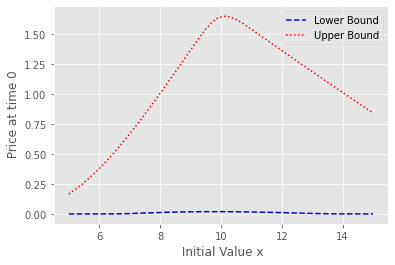

In [13]:
#Frame of interest
start_value_plot = 5
end_value_plot = 15
# Project Values to the grid
x=np.linspace(start_value_plot,end_value_plot,50)
u_low_bf = u_lower_interpol_bf(x)
u_up_bf = u_upper_interpol_bf(x)
#Plot everything
plt.plot(x,u_low_bf,label="Lower Bound",linestyle = "dashed", color = "blue")
plt.plot(x,u_up_bf,label="Upper Bound",linestyle = "dotted", color = "red")
plt.xlabel(" Initial Value x")
plt.ylabel(" Price at time 0")
plt.legend()
plt.grid(True)
plt.show()

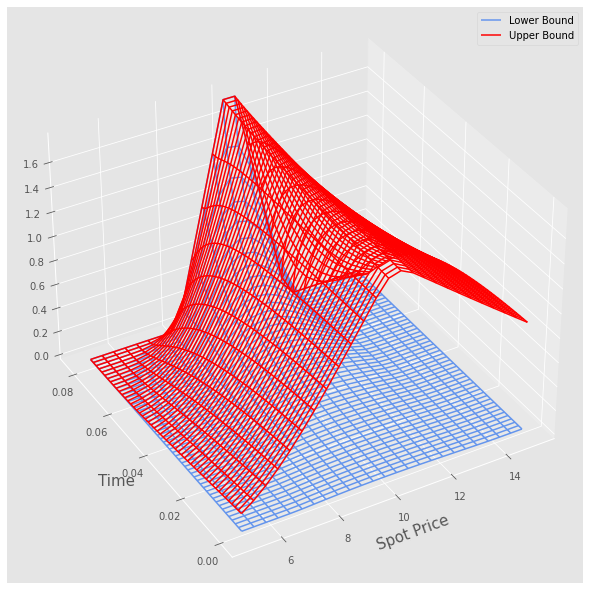

In [14]:
fig = plt.figure(figsize=(12,8))
ax = Axes3D(fig)

ind_start_plot = int(Nr_grid_s*((start_value_plot-start_value)/(end_value-start_value)))
ind_end_plot = int(Nr_grid_s*((end_value_plot-start_value)/(end_value-start_value)))
s = np.linspace(start_value_plot,end_value_plot,ind_end_plot-ind_start_plot)
t = np.linspace(time_from,time_to,Nr_grid_t)

X, Y = np.meshgrid(s, t)
ax.plot_wireframe(X, Y , u_lower_grid_bf[:,ind_start_plot:ind_end_plot],color = "cornflowerblue",label="Lower Bound")
ax.plot_wireframe(X, Y , u_upper_grid_bf[:,ind_start_plot:ind_end_plot],color = "red", label = "Upper Bound")
ax.view_init(35,  -120)
ax.set_xlabel("Spot Price", fontsize=15)
ax.set_ylabel("Time", fontsize=15)
plt.legend()
plt.show()

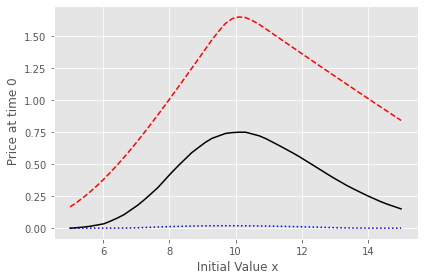

In [16]:
x=np.linspace(start_value_plot,end_value_plot,50)
# Neural Network prices:
hedges_nn_interpol_bf=interp1d(np.linspace(5,15,20),hedges_bf)
hedges_nn_bf = hedges_nn_interpol_bf(x)

# Finite Differences:
u_low_bf = u_lower_interpol_bf(x)
u_up_bf = u_upper_interpol_bf(x)

#Plotting
plt.plot(x,u_low_bf,
         label="Lower Price Bound " +r'$\operatorname{inf}_{P\in \mathcal{A}(0,x,\Theta)}\mathbb{E}^P[\psi(X_T)]$',
         linestyle = "dotted", color = "blue")
plt.plot(x,u_up_bf,
         label="Upper Price Bound " +r'$\operatorname{sup}_{P\in \mathcal{A}(0,x,\Theta)}\mathbb{E}^P[\psi(X_T)]$',

         linestyle = "dashed", color = "red")
plt.plot(x,hedges_nn_bf,label="Price of Optimal Hedge",linestyle = "solid", color = "black")
plt.xlabel(" Initial Value x")
plt.ylabel(" Price at time 0")
#plt.legend(fontsize =12)
plt.grid(True)
plt.tight_layout()
plt.savefig('eps/fig_comparison_prices_butterfly.eps', format='eps')
plt.show()